## Est. of growing stock, biomass and RN content use UAV survey

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../03_input_data/input_CHM_&_spectral_data_site2020.xlsx'
df = pd.read_excel(site_data, sheet_name='input')
df.head()

,Site #,S_m2,WGS84 N,WGS 84 E,Origin,Dominant_specias,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,ln_Sr_wood,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,500.343869,51.435741,30.107979,n,Birch,920,6.824,10300,9.240,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,99.932806,51.434093,30.108523,a,Pine,3600,8.189,15100,9.622,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,99.932806,51.434163,30.109196,a,Pine,4360,8.380,14600,9.589,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,500.343869,51.434217,30.110484,a,Pine,3420,8.137,12700,9.449,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,249.965218,51.434056,30.111980,a,Pine,2200,7.696,12100,9.401,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth', 'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2', 'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2', '%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'r_MIN', 'b_STD', 'contr_r_STD', 'corr_r_Q25', 'corr_r_MIN'])
            
# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
0,6.824,9.240,1912,784,-0.731,2.576,2.33,0.445070,13,35.145074,360.273487,0.488754,0.072792
1,8.189,9.622,2005,818,0.585,2.915,2.47,12.465903,24,36.135511,323.958625,0.501683,0.098347
2,8.380,9.589,2001,818,0.779,2.882,2.44,13.028298,18,35.938764,299.438354,0.540056,0.187811
3,8.137,9.449,2040,833,0.517,2.724,2.55,2.128231,15,35.908361,319.773395,0.480991,0.020686
4,7.696,9.401,1758,717,0.224,2.826,2.14,12.171553,8,38.062522,353.104284,0.505257,0.106549


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   r_MIN          103 non-null    int64  
 9   b_STD          103 non-null    float64
 10  contr_r_STD    103 non-null    float64
 11  corr_r_Q25     103 non-null    float64
 12  corr_r_MIN     103 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 10.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["ln_Cs_wood", "ln_Sr_wood"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_Cs_wood                                                 \
                      count       mean       std     min      25%      50%   
Dominant_specias                                                             
Alder                   4.0   7.305000  1.427622   5.886   6.6765   7.0235   
Aspen                   1.0  11.367000       NaN  11.367  11.3670  11.3670   
Birch                  23.0   7.304652  1.533182   4.533   6.3365   7.2150   
Oak                     3.0   7.430333  1.260072   6.040   6.8970   7.7540   
Pine                   71.0   6.901690  1.650166   3.526   6.3790   6.9470   
Spruce                  1.0   5.176000       NaN   5.176   5.1760   5.1760   

                                  ln_Sr_wood                               \
                      75%     max      count       mean       std     min   
Dominant_specias                                                            
Alder              7.6520   9.287        4.0   7.206000  0.650057   6.265   
Aspen             11.3670  11.367        1.0  11.090000       NaN  11.090   
Birch              8.0320  10.332       23.0   9.345478  1.626360   7.139   
Oak                8.1255   8.497        3.0   7.483667  0.815040   6.565   
Pine               7.6960  10.469       71.0   8.542592  1.359020   6.075   
Spruce             5.1760   5.176        1.0   7.783000       NaN   7.783   

                                                     
                      25%      50%      75%     max  
Dominant_specias                                     
Alder              7.0255   7.4545   7.6350   7.650  
Aspen             11.0900  11.0900  11.0900  11.090  
Birch              8.4000   8.9910   9.9365  13.864  
Oak                7.1655   7.7660   7.9430   8.120  
Pine               7.6450   8.4720   9.3710  12.687  
Spruce             7.7830   7.7830   7.7830   7.783

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,r_MIN,b_STD,contr_r_STD,corr_r_Q25,corr_r_MIN
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.252563,2.464709,3.570291,3.368496,11.378641,35.164575,327.115078,0.393571,0.073579
std,1.64946,1.472424,4988.505540,2019.773384,1.104610,0.904675,6.089170,4.845054,9.139568,5.338700,167.617957,0.151801,0.056017
min,3.52600,6.075000,423.000000,98.000000,-3.033000,0.391000,0.480000,-0.018586,2.000000,20.570709,0.091058,0.033797,-0.062450
25%,6.31900,7.664000,635.500000,199.500000,-0.727500,1.803000,0.710000,0.482279,5.000000,31.746440,283.887328,0.407228,0.027204
50%,6.95700,8.472000,1145.000000,362.000000,-0.025000,2.603000,1.290000,0.642883,8.000000,36.135511,353.034542,0.449670,0.063714
75%,7.91350,9.421000,2423.500000,966.000000,0.516500,3.159000,2.960000,3.921804,15.000000,39.139044,448.017711,0.476635,0.110983
max,11.36700,13.864000,25173.000000,10477.000000,1.652000,4.659000,36.590000,17.862923,56.000000,45.825416,652.546648,0.555648,0.241284


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_Cs_wood"
indep_variables = ['AEDR_mean']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     ln_Cs_wood  ln_Sr_wood  Cs_2021_kBq_m  Sr_2021_kBq_m  ln_Tag_Cs  \
0         6.824       9.240           1912            784     -0.731   
1         8.189       9.622           2005            818      0.585   
2         8.380       9.589           2001            818      0.779   
3         8.137       9.449           2040            833      0.517   
4         7.696       9.401           1758            717      0.224   
..          ...         ...            ...            ...        ...   
98        8.071       8.434           2548           1012      0.228   
99        7.993      10.042           2267            908      0.266   
100       8.343      10.488           2441            975      0.543   
101       3.638       6.399            632            269     -2.811   
102       4.787       6.877            676            292     -1.728   

     ln_Tag_Sr  AEDR_mean  mf_chm_MIN  r_MIN      b_STD  contr_r_STD  \
0        2.576       2.33    0.445070     13  35.145074   360.2

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,AEDR_mean
0,2.33
1,2.47
2,2.44
3,2.55
4,2.14


In [11]:
# Columns in "y" data collections
y.head()

,ln_Cs_wood
0,6.824
1,8.189
2,8.380
3,8.137
4,7.696


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.20580136415120265, 0.0920948344583411, 0.16861562223625448]
    Mean: 0.018
    Std: 0.162

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.56827563 1.40215733 1.52041172]
    Mean: 1.497
    Std: 0.070

 --------------------
Mean absolute error (MAE): 

    Scores: [1.1715196232387, 1.1261743048499613, 1.079309082704432]
    Mean: 1.126
    Std: 0.038

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.7920311241988536                   # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.30176831353190914                  # gamma
print('Gamma: ' + str(p2))

p3 = 0.17633380636047594                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 2            # max_depth
print('Max_depth: ' + str(p4))

p5 = 58           # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.3576401266843401                   # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.7920311241988536
Gamma: 0.30176831353190914
Learning_rate: 0.17633380636047594
Max_depth: 2
N_estimators: 58
Subsample: 0.3576401266843401


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    diff_with_mean = []
    exp_diff_with_mean = []
    
    for i in range(n_sample):
        interm = y_test2[i][0] - y_mean_sample
        diff_with_mean.append(interm**2)

    RSS = np.sum((y_test2 - y_pred2)**2)
    TSS = (np.sum(diff_with_mean))
    R_square = 1 - (RSS / TSS)
    
    for i in range(n_sample):
        exp_interm = exp_y_test2[i][0] - exp_y_mean_sample
        exp_diff_with_mean.append(exp_interm**2)

    exp_RSS = np.sum((exp_y_test2 - exp_y_pred2)**2)
    exp_TSS = np.sum(exp_diff_with_mean)
    
    exp_R_square = 1 - (exp_RSS / exp_TSS)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:5.63955	validation_1-rmse:5.88732
[1]	validation_0-rmse:4.73026	validation_1-rmse:4.98721
[2]	validation_0-rmse:3.99319	validation_1-rmse:4.27833
[3]	validation_0-rmse:3.34659	validation_1-rmse:3.65342
[4]	validation_0-rmse:2.82445	validation_1-rmse:3.13539
[5]	validation_0-rmse:2.42878	validation_1-rmse:2.77717
[6]	validation_0-rmse:2.13029	validation_1-rmse:2.48003
[7]	validation_0-rmse:1.84157	validation_1-rmse:2.19917


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.65455	validation_1-rmse:2.00581
[9]	validation_0-rmse:1.50581	validation_1-rmse:1.81832
[10]	validation_0-rmse:1.37324	validation_1-rmse:1.70811
[11]	validation_0-rmse:1.29703	validation_1-rmse:1.61092
[12]	validation_0-rmse:1.21683	validation_1-rmse:1.52879
[13]	validation_0-rmse:1.14744	validation_1-rmse:1.44883
[14]	validation_0-rmse:1.11546	validation_1-rmse:1.45111
[15]	validation_0-rmse:1.08736	validation_1-rmse:1.40014
[16]	validation_0-rmse:1.05433	validation_1-rmse:1.36764
[17]	validation_0-rmse:1.03503	validation_1-rmse:1.32631
[18]	validation_0-rmse:1.00676	validation_1-rmse:1.30396
[19]	validation_0-rmse:0.98479	validation_1-rmse:1.26633
[20]	validation_0-rmse:0.97267	validation_1-rmse:1.24696
[21]	validation_0-rmse:0.96695	validation_1-rmse:1.24321
[22]	validation_0-rmse:0.95391	validation_1-rmse:1.21843
[23]	validation_0-rmse:0.94642	validation_1-rmse:1.21069
[24]	validation_0-rmse:0.94186	validation_1-rmse:1.21294
[25]	validation_0-rmse:0.94266	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.72783	validation_1-rmse:5.52168
[2]	validation_0-rmse:4.01450	validation_1-rmse:4.75497
[3]	validation_0-rmse:3.38913	validation_1-rmse:4.08778
[4]	validation_0-rmse:2.90717	validation_1-rmse:3.55012
[5]	validation_0-rmse:2.52819	validation_1-rmse:3.14342
[6]	validation_0-rmse:2.22139	validation_1-rmse:2.79461
[7]	validation_0-rmse:1.91034	validation_1-rmse:2.41820
[8]	validation_0-rmse:1.68246	validation_1-rmse:2.13609
[9]	validation_0-rmse:1.54769	validation_1-rmse:1.97483
[10]	validation_0-rmse:1.42332	validation_1-rmse:1.81259
[11]	validation_0-rmse:1.32071	validation_1-rmse:1.68174
[12]	validation_0-rmse:1.23050	validation_1-rmse:1.55162
[13]	validation_0-rmse:1.16498	validation_1-rmse:1.46338
[14]	validation_0-rmse:1.14447	validation_1-rmse:1.42195
[15]	validation_0-rmse:1.09982	validation_1-rmse:1.34794
[16]	validation_0-rmse:1.06207	validation_1-rmse:1.29124
[17]	validation_0-rmse:1.02073	validation_1-rmse:1.24556
[18]	validation_0-rmse:1.01932	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.53113	validation_1-rmse:6.14009
[1]	validation_0-rmse:4.61058	validation_1-rmse:5.21291
[2]	validation_0-rmse:3.94100	validation_1-rmse:4.48741
[3]	validation_0-rmse:3.40238	validation_1-rmse:3.87465
[4]	validation_0-rmse:2.87680	validation_1-rmse:3.30226
[5]	validation_0-rmse:2.47257	validation_1-rmse:2.86774
[6]	validation_0-rmse:2.17826	validation_1-rmse:2.55867
[7]	validation_0-rmse:1.94198	validation_1-rmse:2.28523
[8]	validation_0-rmse:1.69093	validation_1-rmse:1.98673
[9]	validation_0-rmse:1.60351	validation_1-rmse:1.86006
[10]	validation_0-rmse:1.43328	validation_1-rmse:1.63138
[11]	validation_0-rmse:1.35448	validation_1-rmse:1.51732
[12]	validation_0-rmse:1.27383	validation_1-rmse:1.41962
[13]	validation_0-rmse:1.21450	validation_1-rmse:1.32841
[14]	validation_0-rmse:1.16998	validation_1-rmse:1.25223
[15]	validation_0-rmse:1.12899	validation_1-rmse:1.17321
[16]	validation_0-rmse:1.10140	validation_1-rmse:1.11904
[17]	validation_0-rmse:1.07209	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.79559	validation_1-rmse:5.27531
[1]	validation_0-rmse:4.85136	validation_1-rmse:4.32244
[2]	validation_0-rmse:4.10667	validation_1-rmse:3.67405
[3]	validation_0-rmse:3.52039	validation_1-rmse:3.11136
[4]	validation_0-rmse:3.01341	validation_1-rmse:2.69171
[5]	validation_0-rmse:2.57574	validation_1-rmse:2.29709
[6]	validation_0-rmse:2.28330	validation_1-rmse:2.06507
[7]	validation_0-rmse:1.97191	validation_1-rmse:1.81067
[8]	validation_0-rmse:1.72750	validation_1-rmse:1.62931
[9]	validation_0-rmse:1.53932	validation_1-rmse:1.53501
[10]	validation_0-rmse:1.39729	validation_1-rmse:1.43303
[11]	validation_0-rmse:1.28684	validation_1-rmse:1.38228
[12]	validation_0-rmse:1.19866	validation_1-rmse:1.34739
[13]	validation_0-rmse:1.13189	validation_1-rmse:1.35894
[14]	validation_0-rmse:1.05303	validation_1-rmse:1.30084
[15]	validation_0-rmse:1.00293	validation_1-rmse:1.25903
[16]	validation_0-rmse:0.97080	validation_1-rmse:1.28914
[17]	validation_0-rmse:0.94074	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.54976	validation_1-rmse:5.99211
[1]	validation_0-rmse:4.70761	validation_1-rmse:5.09835
[2]	validation_0-rmse:4.04499	validation_1-rmse:4.38504
[3]	validation_0-rmse:3.48665	validation_1-rmse:3.80006
[4]	validation_0-rmse:2.93577	validation_1-rmse:3.18267
[5]	validation_0-rmse:2.55779	validation_1-rmse:2.77110
[6]	validation_0-rmse:2.21772	validation_1-rmse:2.42377
[7]	validation_0-rmse:1.97820	validation_1-rmse:2.15500
[8]	validation_0-rmse:1.74873	validation_1-rmse:1.92138


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.62389	validation_1-rmse:1.80486
[10]	validation_0-rmse:1.47531	validation_1-rmse:1.65006
[11]	validation_0-rmse:1.37310	validation_1-rmse:1.55083
[12]	validation_0-rmse:1.26903	validation_1-rmse:1.43312
[13]	validation_0-rmse:1.18104	validation_1-rmse:1.35651
[14]	validation_0-rmse:1.12640	validation_1-rmse:1.30673
[15]	validation_0-rmse:1.07973	validation_1-rmse:1.26625
[16]	validation_0-rmse:1.05284	validation_1-rmse:1.25449
[17]	validation_0-rmse:1.02433	validation_1-rmse:1.21599
[18]	validation_0-rmse:0.99129	validation_1-rmse:1.19244
[19]	validation_0-rmse:0.97112	validation_1-rmse:1.20233
[20]	validation_0-rmse:0.95496	validation_1-rmse:1.19940
[21]	validation_0-rmse:0.94241	validation_1-rmse:1.17908
[22]	validation_0-rmse:0.94384	validation_1-rmse:1.17906
[23]	validation_0-rmse:0.93754	validation_1-rmse:1.17990
[24]	validation_0-rmse:0.93336	validation_1-rmse:1.19132
[25]	validation_0-rmse:0.92891	validation_1-rmse:1.22067
[26]	validation_0-rmse:0.92338	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.08025	validation_1-rmse:3.84567
[3]	validation_0-rmse:3.49240	validation_1-rmse:3.23392
[4]	validation_0-rmse:3.00333	validation_1-rmse:2.74978
[5]	validation_0-rmse:2.57404	validation_1-rmse:2.34363
[6]	validation_0-rmse:2.23042	validation_1-rmse:2.03316
[7]	validation_0-rmse:1.97699	validation_1-rmse:1.77946
[8]	validation_0-rmse:1.73336	validation_1-rmse:1.56563
[9]	validation_0-rmse:1.57362	validation_1-rmse:1.41955
[10]	validation_0-rmse:1.45104	validation_1-rmse:1.30334
[11]	validation_0-rmse:1.33918	validation_1-rmse:1.24990
[12]	validation_0-rmse:1.22542	validation_1-rmse:1.17877
[13]	validation_0-rmse:1.15460	validation_1-rmse:1.13959
[14]	validation_0-rmse:1.09574	validation_1-rmse:1.09359
[15]	validation_0-rmse:1.06937	validation_1-rmse:1.07977
[16]	validation_0-rmse:1.05967	validation_1-rmse:1.03628
[17]	validation_0-rmse:1.05218	validation_1-rmse:1.02149
[18]	validation_0-rmse:1.04285	validation_1-rmse:1.02650
[19]	validation_0-rmse:1.02394	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.63479	validation_1-rmse:5.29321
[2]	validation_0-rmse:3.88797	validation_1-rmse:4.51495
[3]	validation_0-rmse:3.36859	validation_1-rmse:3.94482
[4]	validation_0-rmse:2.96063	validation_1-rmse:3.45971
[5]	validation_0-rmse:2.52745	validation_1-rmse:2.99672
[6]	validation_0-rmse:2.21373	validation_1-rmse:2.67244
[7]	validation_0-rmse:1.96453	validation_1-rmse:2.32560
[8]	validation_0-rmse:1.75504	validation_1-rmse:2.04268
[9]	validation_0-rmse:1.61336	validation_1-rmse:1.88894
[10]	validation_0-rmse:1.48491	validation_1-rmse:1.73265
[11]	validation_0-rmse:1.38878	validation_1-rmse:1.59813
[12]	validation_0-rmse:1.30599	validation_1-rmse:1.44667
[13]	validation_0-rmse:1.23176	validation_1-rmse:1.36474
[14]	validation_0-rmse:1.18488	validation_1-rmse:1.30779
[15]	validation_0-rmse:1.16598	validation_1-rmse:1.25932
[16]	validation_0-rmse:1.13393	validation_1-rmse:1.20979
[17]	validation_0-rmse:1.09516	validation_1-rmse:1.14872
[18]	validation_0-rmse:1.06729	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.41951	validation_1-rmse:3.78455
[4]	validation_0-rmse:2.95096	validation_1-rmse:3.32527
[5]	validation_0-rmse:2.48079	validation_1-rmse:2.88017
[6]	validation_0-rmse:2.16213	validation_1-rmse:2.50984
[7]	validation_0-rmse:1.88739	validation_1-rmse:2.20873
[8]	validation_0-rmse:1.67392	validation_1-rmse:1.96879
[9]	validation_0-rmse:1.53986	validation_1-rmse:1.85095
[10]	validation_0-rmse:1.41181	validation_1-rmse:1.71759
[11]	validation_0-rmse:1.30926	validation_1-rmse:1.59421
[12]	validation_0-rmse:1.20679	validation_1-rmse:1.46409
[13]	validation_0-rmse:1.13776	validation_1-rmse:1.36203
[14]	validation_0-rmse:1.09904	validation_1-rmse:1.30013
[15]	validation_0-rmse:1.06547	validation_1-rmse:1.26030
[16]	validation_0-rmse:1.05067	validation_1-rmse:1.23960
[17]	validation_0-rmse:1.02591	validation_1-rmse:1.21245
[18]	validation_0-rmse:0.99537	validation_1-rmse:1.15273
[19]	validation_0-rmse:0.98109	validation_1-rmse:1.17115
[20]	validation_0-rmse:0.96691	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.45811	validation_1-rmse:3.07614
[4]	validation_0-rmse:3.02341	validation_1-rmse:2.66824
[5]	validation_0-rmse:2.57271	validation_1-rmse:2.23077
[6]	validation_0-rmse:2.29181	validation_1-rmse:1.96217
[7]	validation_0-rmse:1.98806	validation_1-rmse:1.67191
[8]	validation_0-rmse:1.78124	validation_1-rmse:1.48170
[9]	validation_0-rmse:1.62728	validation_1-rmse:1.34572
[10]	validation_0-rmse:1.44868	validation_1-rmse:1.18110
[11]	validation_0-rmse:1.31383	validation_1-rmse:1.07966
[12]	validation_0-rmse:1.22449	validation_1-rmse:1.01030
[13]	validation_0-rmse:1.14876	validation_1-rmse:0.98777
[14]	validation_0-rmse:1.09746	validation_1-rmse:0.99195
[15]	validation_0-rmse:1.06950	validation_1-rmse:0.98406
[16]	validation_0-rmse:1.04654	validation_1-rmse:0.97874
[17]	validation_0-rmse:1.03083	validation_1-rmse:0.93936
[18]	validation_0-rmse:1.01821	validation_1-rmse:0.94001
[19]	validation_0-rmse:1.00142	validation_1-rmse:0.97313
[20]	validation_0-rmse:0.97672	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.08725	validation_1-rmse:3.94276
[3]	validation_0-rmse:3.45038	validation_1-rmse:3.30253
[4]	validation_0-rmse:3.01893	validation_1-rmse:2.85900
[5]	validation_0-rmse:2.63622	validation_1-rmse:2.46349
[6]	validation_0-rmse:2.32718	validation_1-rmse:2.16420
[7]	validation_0-rmse:2.00777	validation_1-rmse:1.84137
[8]	validation_0-rmse:1.77802	validation_1-rmse:1.61162
[9]	validation_0-rmse:1.63762	validation_1-rmse:1.49738
[10]	validation_0-rmse:1.50295	validation_1-rmse:1.38223
[11]	validation_0-rmse:1.38861	validation_1-rmse:1.26986
[12]	validation_0-rmse:1.27804	validation_1-rmse:1.17169
[13]	validation_0-rmse:1.20883	validation_1-rmse:1.10954
[14]	validation_0-rmse:1.15954	validation_1-rmse:1.07327
[15]	validation_0-rmse:1.10796	validation_1-rmse:1.01712
[16]	validation_0-rmse:1.07567	validation_1-rmse:0.97558
[17]	validation_0-rmse:1.06073	validation_1-rmse:0.98051
[18]	validation_0-rmse:1.04118	validation_1-rmse:0.99127
[19]	validation_0-rmse:1.02569	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.56964	validation_1-rmse:2.98666
[6]	validation_0-rmse:2.24314	validation_1-rmse:2.58673
[7]	validation_0-rmse:1.98667	validation_1-rmse:2.27748
[8]	validation_0-rmse:1.77469	validation_1-rmse:2.00583
[9]	validation_0-rmse:1.61070	validation_1-rmse:1.79305
[10]	validation_0-rmse:1.45698	validation_1-rmse:1.57895
[11]	validation_0-rmse:1.37254	validation_1-rmse:1.43126
[12]	validation_0-rmse:1.30417	validation_1-rmse:1.30941
[13]	validation_0-rmse:1.22925	validation_1-rmse:1.19231
[14]	validation_0-rmse:1.18090	validation_1-rmse:1.11421
[15]	validation_0-rmse:1.14293	validation_1-rmse:1.04698
[16]	validation_0-rmse:1.09768	validation_1-rmse:0.96295
[17]	validation_0-rmse:1.07510	validation_1-rmse:0.92340
[18]	validation_0-rmse:1.06563	validation_1-rmse:0.87888
[19]	validation_0-rmse:1.06760	validation_1-rmse:0.88618
[20]	validation_0-rmse:1.06809	validation_1-rmse:0.89800
[21]	validation_0-rmse:1.05218	validation_1-rmse:0.87867
[22]	validation_0-rmse:1.04229	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.06903	validation_1-rmse:2.95185
[5]	validation_0-rmse:2.69829	validation_1-rmse:2.59369
[6]	validation_0-rmse:2.33276	validation_1-rmse:2.23201
[7]	validation_0-rmse:2.05686	validation_1-rmse:1.99941
[8]	validation_0-rmse:1.83613	validation_1-rmse:1.78964
[9]	validation_0-rmse:1.64084	validation_1-rmse:1.62011
[10]	validation_0-rmse:1.47227	validation_1-rmse:1.47052
[11]	validation_0-rmse:1.31999	validation_1-rmse:1.34167
[12]	validation_0-rmse:1.22983	validation_1-rmse:1.28195
[13]	validation_0-rmse:1.16197	validation_1-rmse:1.23351
[14]	validation_0-rmse:1.12244	validation_1-rmse:1.26287
[15]	validation_0-rmse:1.09814	validation_1-rmse:1.28843
[16]	validation_0-rmse:1.06338	validation_1-rmse:1.26826
[17]	validation_0-rmse:1.03625	validation_1-rmse:1.25805
[18]	validation_0-rmse:1.00950	validation_1-rmse:1.24721
[19]	validation_0-rmse:1.00266	validation_1-rmse:1.24410
[20]	validation_0-rmse:0.99301	validation_1-rmse:1.26360
[21]	validation_0-rmse:0.99582	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.55429	validation_1-rmse:2.62647
[6]	validation_0-rmse:2.23094	validation_1-rmse:2.29827
[7]	validation_0-rmse:1.98036	validation_1-rmse:2.02391
[8]	validation_0-rmse:1.74641	validation_1-rmse:1.80872
[9]	validation_0-rmse:1.55153	validation_1-rmse:1.60810
[10]	validation_0-rmse:1.40939	validation_1-rmse:1.44509
[11]	validation_0-rmse:1.30240	validation_1-rmse:1.33235
[12]	validation_0-rmse:1.23573	validation_1-rmse:1.26326
[13]	validation_0-rmse:1.16358	validation_1-rmse:1.19250
[14]	validation_0-rmse:1.12763	validation_1-rmse:1.16793
[15]	validation_0-rmse:1.09558	validation_1-rmse:1.13733
[16]	validation_0-rmse:1.08671	validation_1-rmse:1.15455
[17]	validation_0-rmse:1.05762	validation_1-rmse:1.15795
[18]	validation_0-rmse:1.05623	validation_1-rmse:1.12963
[19]	validation_0-rmse:1.03016	validation_1-rmse:1.08668
[20]	validation_0-rmse:1.01445	validation_1-rmse:1.08538
[21]	validation_0-rmse:1.00604	validation_1-rmse:1.07579
[22]	validation_0-rmse:0.98568	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.58596	validation_1-rmse:5.97458
[1]	validation_0-rmse:4.68057	validation_1-rmse:5.06681
[2]	validation_0-rmse:4.00560	validation_1-rmse:4.40304
[3]	validation_0-rmse:3.37747	validation_1-rmse:3.77971
[4]	validation_0-rmse:2.94522	validation_1-rmse:3.35444
[5]	validation_0-rmse:2.56686	validation_1-rmse:2.95639
[6]	validation_0-rmse:2.25893	validation_1-rmse:2.65163
[7]	validation_0-rmse:1.97030	validation_1-rmse:2.35349
[8]	validation_0-rmse:1.76968	validation_1-rmse:2.15001
[9]	validation_0-rmse:1.59630	validation_1-rmse:1.99925
[10]	validation_0-rmse:1.44378	validation_1-rmse:1.83800
[11]	validation_0-rmse:1.31576	validation_1-rmse:1.69454
[12]	validation_0-rmse:1.22902	validation_1-rmse:1.61258
[13]	validation_0-rmse:1.16030	validation_1-rmse:1.54546
[14]	validation_0-rmse:1.11439	validation_1-rmse:1.49111
[15]	validation_0-rmse:1.05903	validation_1-rmse:1.43171
[16]	validation_0-rmse:1.01782	validation_1-rmse:1.40162
[17]	validation_0-rmse:0.98775	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.09489	validation_1-rmse:3.68946
[3]	validation_0-rmse:3.52713	validation_1-rmse:3.16352
[4]	validation_0-rmse:3.02181	validation_1-rmse:2.73309
[5]	validation_0-rmse:2.60697	validation_1-rmse:2.36096
[6]	validation_0-rmse:2.21578	validation_1-rmse:2.02503
[7]	validation_0-rmse:1.94596	validation_1-rmse:1.78524
[8]	validation_0-rmse:1.71890	validation_1-rmse:1.60323
[9]	validation_0-rmse:1.59354	validation_1-rmse:1.53189
[10]	validation_0-rmse:1.45544	validation_1-rmse:1.45571
[11]	validation_0-rmse:1.33941	validation_1-rmse:1.38479
[12]	validation_0-rmse:1.23503	validation_1-rmse:1.32380
[13]	validation_0-rmse:1.14590	validation_1-rmse:1.26177
[14]	validation_0-rmse:1.06516	validation_1-rmse:1.20510
[15]	validation_0-rmse:1.02003	validation_1-rmse:1.18453
[16]	validation_0-rmse:0.99242	validation_1-rmse:1.17619
[17]	validation_0-rmse:0.97920	validation_1-rmse:1.18748
[18]	validation_0-rmse:0.96537	validation_1-rmse:1.17491
[19]	validation_0-rmse:0.95452	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.77320	validation_1-rmse:5.56629
[1]	validation_0-rmse:4.85770	validation_1-rmse:4.66782
[2]	validation_0-rmse:4.14323	validation_1-rmse:3.97311
[3]	validation_0-rmse:3.52026	validation_1-rmse:3.30942
[4]	validation_0-rmse:3.03744	validation_1-rmse:2.77108
[5]	validation_0-rmse:2.63541	validation_1-rmse:2.39008
[6]	validation_0-rmse:2.30490	validation_1-rmse:2.07298
[7]	validation_0-rmse:2.01026	validation_1-rmse:1.82761
[8]	validation_0-rmse:1.76608	validation_1-rmse:1.62168
[9]	validation_0-rmse:1.55274	validation_1-rmse:1.44557
[10]	validation_0-rmse:1.41429	validation_1-rmse:1.35249
[11]	validation_0-rmse:1.31931	validation_1-rmse:1.27397
[12]	validation_0-rmse:1.21586	validation_1-rmse:1.24025
[13]	validation_0-rmse:1.14626	validation_1-rmse:1.21147
[14]	validation_0-rmse:1.10609	validation_1-rmse:1.21347
[15]	validation_0-rmse:1.05605	validation_1-rmse:1.23168
[16]	validation_0-rmse:1.02537	validation_1-rmse:1.24093
[17]	validation_0-rmse:1.00020	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.42513	validation_1-rmse:3.72287
[4]	validation_0-rmse:2.95598	validation_1-rmse:3.22925
[5]	validation_0-rmse:2.60060	validation_1-rmse:2.83766
[6]	validation_0-rmse:2.24224	validation_1-rmse:2.45982
[7]	validation_0-rmse:2.00808	validation_1-rmse:2.19266
[8]	validation_0-rmse:1.81896	validation_1-rmse:2.04111
[9]	validation_0-rmse:1.65128	validation_1-rmse:1.86902
[10]	validation_0-rmse:1.53673	validation_1-rmse:1.73256
[11]	validation_0-rmse:1.40898	validation_1-rmse:1.58280
[12]	validation_0-rmse:1.32407	validation_1-rmse:1.47723
[13]	validation_0-rmse:1.25254	validation_1-rmse:1.36680
[14]	validation_0-rmse:1.19859	validation_1-rmse:1.37676
[15]	validation_0-rmse:1.12818	validation_1-rmse:1.28382
[16]	validation_0-rmse:1.07852	validation_1-rmse:1.23431
[17]	validation_0-rmse:1.05453	validation_1-rmse:1.20954
[18]	validation_0-rmse:1.02542	validation_1-rmse:1.17630
[19]	validation_0-rmse:1.02015	validation_1-rmse:1.20988
[20]	validation_0-rmse:1.00156	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.80439	validation_1-rmse:5.15519
[1]	validation_0-rmse:5.01788	validation_1-rmse:4.37399
[2]	validation_0-rmse:4.31859	validation_1-rmse:3.77306
[3]	validation_0-rmse:3.67998	validation_1-rmse:3.20652
[4]	validation_0-rmse:3.15502	validation_1-rmse:2.69715
[5]	validation_0-rmse:2.72278	validation_1-rmse:2.32468
[6]	validation_0-rmse:2.33626	validation_1-rmse:1.97051
[7]	validation_0-rmse:2.08915	validation_1-rmse:1.78870
[8]	validation_0-rmse:1.83692	validation_1-rmse:1.62814
[9]	validation_0-rmse:1.65072	validation_1-rmse:1.50258
[10]	validation_0-rmse:1.49646	validation_1-rmse:1.40112
[11]	validation_0-rmse:1.37070	validation_1-rmse:1.31756
[12]	validation_0-rmse:1.29158	validation_1-rmse:1.27569
[13]	validation_0-rmse:1.20936	validation_1-rmse:1.26141
[14]	validation_0-rmse:1.14668	validation_1-rmse:1.22933
[15]	validation_0-rmse:1.11222	validation_1-rmse:1.21368
[16]	validation_0-rmse:1.06761	validation_1-rmse:1.19701
[17]	validation_0-rmse:1.04465	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.68006	validation_1-rmse:2.60687
[6]	validation_0-rmse:2.36700	validation_1-rmse:2.26858
[7]	validation_0-rmse:2.04904	validation_1-rmse:1.93078
[8]	validation_0-rmse:1.81170	validation_1-rmse:1.68102
[9]	validation_0-rmse:1.64122	validation_1-rmse:1.52324
[10]	validation_0-rmse:1.47831	validation_1-rmse:1.34878
[11]	validation_0-rmse:1.37520	validation_1-rmse:1.22160
[12]	validation_0-rmse:1.28755	validation_1-rmse:1.12360
[13]	validation_0-rmse:1.19890	validation_1-rmse:1.04806
[14]	validation_0-rmse:1.14357	validation_1-rmse:0.97937
[15]	validation_0-rmse:1.11642	validation_1-rmse:0.96693
[16]	validation_0-rmse:1.09718	validation_1-rmse:0.96697
[17]	validation_0-rmse:1.06933	validation_1-rmse:0.98450
[18]	validation_0-rmse:1.05803	validation_1-rmse:1.00375
[19]	validation_0-rmse:1.04029	validation_1-rmse:1.02441
[20]	validation_0-rmse:1.01833	validation_1-rmse:1.00801
[21]	validation_0-rmse:1.01983	validation_1-rmse:1.04331
[22]	validation_0-rmse:1.00739	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.11522	validation_1-rmse:2.89028
[5]	validation_0-rmse:2.66894	validation_1-rmse:2.41077
[6]	validation_0-rmse:2.35233	validation_1-rmse:2.15722
[7]	validation_0-rmse:2.10516	validation_1-rmse:2.00363
[8]	validation_0-rmse:1.86906	validation_1-rmse:1.77923
[9]	validation_0-rmse:1.68595	validation_1-rmse:1.57758
[10]	validation_0-rmse:1.52877	validation_1-rmse:1.42588
[11]	validation_0-rmse:1.39097	validation_1-rmse:1.30048
[12]	validation_0-rmse:1.31178	validation_1-rmse:1.24989
[13]	validation_0-rmse:1.24473	validation_1-rmse:1.16316
[14]	validation_0-rmse:1.18422	validation_1-rmse:1.08576
[15]	validation_0-rmse:1.14066	validation_1-rmse:1.07099
[16]	validation_0-rmse:1.11480	validation_1-rmse:1.06960
[17]	validation_0-rmse:1.09867	validation_1-rmse:1.05127
[18]	validation_0-rmse:1.07565	validation_1-rmse:1.05262
[19]	validation_0-rmse:1.06517	validation_1-rmse:1.06091
[20]	validation_0-rmse:1.05410	validation_1-rmse:1.05610
[21]	validation_0-rmse:1.04535	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.90321	validation_1-rmse:2.94051
[5]	validation_0-rmse:2.50396	validation_1-rmse:2.60717
[6]	validation_0-rmse:2.18603	validation_1-rmse:2.34715
[7]	validation_0-rmse:1.92537	validation_1-rmse:2.09862
[8]	validation_0-rmse:1.70529	validation_1-rmse:1.90008
[9]	validation_0-rmse:1.53656	validation_1-rmse:1.78334
[10]	validation_0-rmse:1.38516	validation_1-rmse:1.66147
[11]	validation_0-rmse:1.33867	validation_1-rmse:1.61887
[12]	validation_0-rmse:1.23088	validation_1-rmse:1.53939
[13]	validation_0-rmse:1.15164	validation_1-rmse:1.49840
[14]	validation_0-rmse:1.08833	validation_1-rmse:1.48019
[15]	validation_0-rmse:1.04069	validation_1-rmse:1.43873
[16]	validation_0-rmse:0.99751	validation_1-rmse:1.39650
[17]	validation_0-rmse:0.97209	validation_1-rmse:1.36676
[18]	validation_0-rmse:0.95729	validation_1-rmse:1.37712
[19]	validation_0-rmse:0.93176	validation_1-rmse:1.37298
[20]	validation_0-rmse:0.92667	validation_1-rmse:1.38104
[21]	validation_0-rmse:0.91921	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.56166	validation_1-rmse:6.22758
[1]	validation_0-rmse:4.71330	validation_1-rmse:5.31048
[2]	validation_0-rmse:4.03011	validation_1-rmse:4.62660
[3]	validation_0-rmse:3.48494	validation_1-rmse:4.08549


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.95079	validation_1-rmse:3.47745
[5]	validation_0-rmse:2.55797	validation_1-rmse:3.03790
[6]	validation_0-rmse:2.22928	validation_1-rmse:2.66073
[7]	validation_0-rmse:1.98863	validation_1-rmse:2.38791
[8]	validation_0-rmse:1.78534	validation_1-rmse:2.14413
[9]	validation_0-rmse:1.62493	validation_1-rmse:1.93607
[10]	validation_0-rmse:1.49124	validation_1-rmse:1.78528
[11]	validation_0-rmse:1.39428	validation_1-rmse:1.65525
[12]	validation_0-rmse:1.33312	validation_1-rmse:1.56601
[13]	validation_0-rmse:1.23831	validation_1-rmse:1.43775
[14]	validation_0-rmse:1.19416	validation_1-rmse:1.37347
[15]	validation_0-rmse:1.17116	validation_1-rmse:1.33428
[16]	validation_0-rmse:1.13675	validation_1-rmse:1.27296
[17]	validation_0-rmse:1.11084	validation_1-rmse:1.23964
[18]	validation_0-rmse:1.07537	validation_1-rmse:1.18023
[19]	validation_0-rmse:1.05493	validation_1-rmse:1.16740
[20]	validation_0-rmse:1.03991	validation_1-rmse:1.13915
[21]	validation_0-rmse:1.04008	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.79380	validation_1-rmse:5.00237
[1]	validation_0-rmse:4.89463	validation_1-rmse:4.12087
[2]	validation_0-rmse:4.11005	validation_1-rmse:3.36312
[3]	validation_0-rmse:3.46339	validation_1-rmse:2.81664
[4]	validation_0-rmse:2.94346	validation_1-rmse:2.36587
[5]	validation_0-rmse:2.52904	validation_1-rmse:2.00915


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.19709	validation_1-rmse:1.79546
[7]	validation_0-rmse:1.91014	validation_1-rmse:1.57052
[8]	validation_0-rmse:1.72341	validation_1-rmse:1.43310
[9]	validation_0-rmse:1.53058	validation_1-rmse:1.30778
[10]	validation_0-rmse:1.39552	validation_1-rmse:1.23745
[11]	validation_0-rmse:1.34277	validation_1-rmse:1.23201
[12]	validation_0-rmse:1.25537	validation_1-rmse:1.20817
[13]	validation_0-rmse:1.19419	validation_1-rmse:1.18041
[14]	validation_0-rmse:1.13711	validation_1-rmse:1.17150
[15]	validation_0-rmse:1.08749	validation_1-rmse:1.15547
[16]	validation_0-rmse:1.04651	validation_1-rmse:1.14983
[17]	validation_0-rmse:1.01061	validation_1-rmse:1.14632
[18]	validation_0-rmse:0.97954	validation_1-rmse:1.14857
[19]	validation_0-rmse:0.95967	validation_1-rmse:1.15243
[20]	validation_0-rmse:0.94729	validation_1-rmse:1.15970
[21]	validation_0-rmse:0.93905	validation_1-rmse:1.14989
[22]	validation_0-rmse:0.93760	validation_1-rmse:1.15753
[23]	validation_0-rmse:0.93509	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.59646	validation_1-rmse:5.76215
[1]	validation_0-rmse:4.73580	validation_1-rmse:4.92743
[2]	validation_0-rmse:4.02286	validation_1-rmse:4.21796
[3]	validation_0-rmse:3.46498	validation_1-rmse:3.64649
[4]	validation_0-rmse:2.97720	validation_1-rmse:3.15422
[5]	validation_0-rmse:2.55777	validation_1-rmse:2.72436
[6]	validation_0-rmse:2.21504	validation_1-rmse:2.39005


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.95109	validation_1-rmse:2.10121
[8]	validation_0-rmse:1.73422	validation_1-rmse:1.86788
[9]	validation_0-rmse:1.57692	validation_1-rmse:1.72030
[10]	validation_0-rmse:1.45132	validation_1-rmse:1.57781
[11]	validation_0-rmse:1.33537	validation_1-rmse:1.44320
[12]	validation_0-rmse:1.24255	validation_1-rmse:1.33826
[13]	validation_0-rmse:1.15965	validation_1-rmse:1.25142
[14]	validation_0-rmse:1.13819	validation_1-rmse:1.19315
[15]	validation_0-rmse:1.11627	validation_1-rmse:1.16834
[16]	validation_0-rmse:1.09959	validation_1-rmse:1.17953
[17]	validation_0-rmse:1.07130	validation_1-rmse:1.13816
[18]	validation_0-rmse:1.05497	validation_1-rmse:1.10493
[19]	validation_0-rmse:1.02931	validation_1-rmse:1.08568
[20]	validation_0-rmse:1.01976	validation_1-rmse:1.04141
[21]	validation_0-rmse:1.00732	validation_1-rmse:1.04911
[22]	validation_0-rmse:0.99962	validation_1-rmse:1.03786
[23]	validation_0-rmse:0.99337	validation_1-rmse:1.06104
[24]	validation_0-rmse:0.97580	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02065	validation_1-rmse:4.22556
[3]	validation_0-rmse:3.48822	validation_1-rmse:3.68272
[4]	validation_0-rmse:2.93787	validation_1-rmse:3.12386
[5]	validation_0-rmse:2.54970	validation_1-rmse:2.71208
[6]	validation_0-rmse:2.19855	validation_1-rmse:2.34765
[7]	validation_0-rmse:1.92254	validation_1-rmse:2.05070
[8]	validation_0-rmse:1.69752	validation_1-rmse:1.81343
[9]	validation_0-rmse:1.50940	validation_1-rmse:1.59935
[10]	validation_0-rmse:1.38698	validation_1-rmse:1.46281
[11]	validation_0-rmse:1.28573	validation_1-rmse:1.34526
[12]	validation_0-rmse:1.19499	validation_1-rmse:1.26875
[13]	validation_0-rmse:1.12974	validation_1-rmse:1.19573
[14]	validation_0-rmse:1.08790	validation_1-rmse:1.14253
[15]	validation_0-rmse:1.07478	validation_1-rmse:1.14539
[16]	validation_0-rmse:1.05782	validation_1-rmse:1.13403
[17]	validation_0-rmse:1.03333	validation_1-rmse:1.13530
[18]	validation_0-rmse:1.01352	validation_1-rmse:1.12453
[19]	validation_0-rmse:1.00788	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.55556	validation_1-rmse:6.22513
[1]	validation_0-rmse:4.73916	validation_1-rmse:5.36733
[2]	validation_0-rmse:3.98111	validation_1-rmse:4.54297
[3]	validation_0-rmse:3.43420	validation_1-rmse:4.01244
[4]	validation_0-rmse:2.96992	validation_1-rmse:3.55528


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.52417	validation_1-rmse:3.12819
[6]	validation_0-rmse:2.20244	validation_1-rmse:2.75179
[7]	validation_0-rmse:1.93026	validation_1-rmse:2.44077
[8]	validation_0-rmse:1.71169	validation_1-rmse:2.21305
[9]	validation_0-rmse:1.58049	validation_1-rmse:2.09660
[10]	validation_0-rmse:1.46190	validation_1-rmse:1.94475
[11]	validation_0-rmse:1.34771	validation_1-rmse:1.77368
[12]	validation_0-rmse:1.27885	validation_1-rmse:1.69155
[13]	validation_0-rmse:1.22138	validation_1-rmse:1.61731
[14]	validation_0-rmse:1.15153	validation_1-rmse:1.50711
[15]	validation_0-rmse:1.10875	validation_1-rmse:1.43246
[16]	validation_0-rmse:1.07481	validation_1-rmse:1.35363
[17]	validation_0-rmse:1.05042	validation_1-rmse:1.31092
[18]	validation_0-rmse:1.05027	validation_1-rmse:1.30773
[19]	validation_0-rmse:1.02880	validation_1-rmse:1.30561
[20]	validation_0-rmse:1.01423	validation_1-rmse:1.26140
[21]	validation_0-rmse:1.01371	validation_1-rmse:1.23786
[22]	validation_0-rmse:1.00440	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.67368	validation_1-rmse:5.99560
[1]	validation_0-rmse:4.78800	validation_1-rmse:5.13662
[2]	validation_0-rmse:4.06956	validation_1-rmse:4.35057
[3]	validation_0-rmse:3.41568	validation_1-rmse:3.72933
[4]	validation_0-rmse:2.93136	validation_1-rmse:3.24255
[5]	validation_0-rmse:2.51931	validation_1-rmse:2.84827


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.18330	validation_1-rmse:2.49590
[7]	validation_0-rmse:1.95072	validation_1-rmse:2.24731
[8]	validation_0-rmse:1.73021	validation_1-rmse:2.00950
[9]	validation_0-rmse:1.55659	validation_1-rmse:1.80538
[10]	validation_0-rmse:1.42854	validation_1-rmse:1.66585
[11]	validation_0-rmse:1.37754	validation_1-rmse:1.64051
[12]	validation_0-rmse:1.28805	validation_1-rmse:1.55320
[13]	validation_0-rmse:1.21444	validation_1-rmse:1.42799
[14]	validation_0-rmse:1.15310	validation_1-rmse:1.36368
[15]	validation_0-rmse:1.10996	validation_1-rmse:1.30886
[16]	validation_0-rmse:1.05987	validation_1-rmse:1.26484
[17]	validation_0-rmse:1.02065	validation_1-rmse:1.22697
[18]	validation_0-rmse:1.00166	validation_1-rmse:1.22594
[19]	validation_0-rmse:0.98016	validation_1-rmse:1.20251
[20]	validation_0-rmse:0.96957	validation_1-rmse:1.22205
[21]	validation_0-rmse:0.95406	validation_1-rmse:1.18830
[22]	validation_0-rmse:0.94727	validation_1-rmse:1.17155
[23]	validation_0-rmse:0.94067	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.60058	validation_1-rmse:5.89989
[1]	validation_0-rmse:4.71658	validation_1-rmse:5.01582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00099	validation_1-rmse:4.23692
[3]	validation_0-rmse:3.50029	validation_1-rmse:3.71091
[4]	validation_0-rmse:2.96318	validation_1-rmse:3.17457
[5]	validation_0-rmse:2.54007	validation_1-rmse:2.73615
[6]	validation_0-rmse:2.21946	validation_1-rmse:2.36444
[7]	validation_0-rmse:1.95530	validation_1-rmse:2.07179
[8]	validation_0-rmse:1.72861	validation_1-rmse:1.82406
[9]	validation_0-rmse:1.53327	validation_1-rmse:1.63686
[10]	validation_0-rmse:1.39804	validation_1-rmse:1.47588
[11]	validation_0-rmse:1.30513	validation_1-rmse:1.35969
[12]	validation_0-rmse:1.21861	validation_1-rmse:1.27084
[13]	validation_0-rmse:1.15841	validation_1-rmse:1.21749
[14]	validation_0-rmse:1.10852	validation_1-rmse:1.18356
[15]	validation_0-rmse:1.06973	validation_1-rmse:1.15415
[16]	validation_0-rmse:1.06494	validation_1-rmse:1.15442
[17]	validation_0-rmse:1.04412	validation_1-rmse:1.14225
[18]	validation_0-rmse:1.01779	validation_1-rmse:1.11855
[19]	validation_0-rmse:1.00801	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.71877	validation_1-rmse:5.35973
[1]	validation_0-rmse:4.79696	validation_1-rmse:4.44079


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.05201	validation_1-rmse:3.71668
[3]	validation_0-rmse:3.42520	validation_1-rmse:3.11921
[4]	validation_0-rmse:2.92914	validation_1-rmse:2.65456
[5]	validation_0-rmse:2.47865	validation_1-rmse:2.25619
[6]	validation_0-rmse:2.14308	validation_1-rmse:1.96787
[7]	validation_0-rmse:1.86743	validation_1-rmse:1.72223
[8]	validation_0-rmse:1.67373	validation_1-rmse:1.54607
[9]	validation_0-rmse:1.54718	validation_1-rmse:1.48726
[10]	validation_0-rmse:1.38581	validation_1-rmse:1.39439
[11]	validation_0-rmse:1.29173	validation_1-rmse:1.38285
[12]	validation_0-rmse:1.19825	validation_1-rmse:1.31667
[13]	validation_0-rmse:1.11101	validation_1-rmse:1.26223
[14]	validation_0-rmse:1.06765	validation_1-rmse:1.25860
[15]	validation_0-rmse:1.03382	validation_1-rmse:1.23498
[16]	validation_0-rmse:1.00363	validation_1-rmse:1.24095
[17]	validation_0-rmse:0.96913	validation_1-rmse:1.25529
[18]	validation_0-rmse:0.94711	validation_1-rmse:1.28967
[19]	validation_0-rmse:0.93350	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.74805	validation_1-rmse:5.72626
[1]	validation_0-rmse:4.85021	validation_1-rmse:4.85911


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.13333	validation_1-rmse:4.17215
[3]	validation_0-rmse:3.50998	validation_1-rmse:3.58888
[4]	validation_0-rmse:3.02610	validation_1-rmse:3.08630
[5]	validation_0-rmse:2.64478	validation_1-rmse:2.75030
[6]	validation_0-rmse:2.26221	validation_1-rmse:2.37962
[7]	validation_0-rmse:1.96734	validation_1-rmse:2.10262
[8]	validation_0-rmse:1.76556	validation_1-rmse:1.85824
[9]	validation_0-rmse:1.56113	validation_1-rmse:1.69605
[10]	validation_0-rmse:1.42146	validation_1-rmse:1.54298
[11]	validation_0-rmse:1.32494	validation_1-rmse:1.48997
[12]	validation_0-rmse:1.26090	validation_1-rmse:1.44661
[13]	validation_0-rmse:1.19879	validation_1-rmse:1.38162
[14]	validation_0-rmse:1.14739	validation_1-rmse:1.31073
[15]	validation_0-rmse:1.11416	validation_1-rmse:1.25852
[16]	validation_0-rmse:1.07355	validation_1-rmse:1.23715
[17]	validation_0-rmse:1.03128	validation_1-rmse:1.22884
[18]	validation_0-rmse:0.99694	validation_1-rmse:1.21970
[19]	validation_0-rmse:0.98810	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.69592	validation_1-rmse:6.00252
[1]	validation_0-rmse:4.80428	validation_1-rmse:5.18291
[2]	validation_0-rmse:4.05599	validation_1-rmse:4.44661
[3]	validation_0-rmse:3.46330	validation_1-rmse:3.89774
[4]	validation_0-rmse:3.00755	validation_1-rmse:3.41299


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.64817	validation_1-rmse:3.06946
[6]	validation_0-rmse:2.31041	validation_1-rmse:2.70726
[7]	validation_0-rmse:2.03722	validation_1-rmse:2.45206
[8]	validation_0-rmse:1.82402	validation_1-rmse:2.19680
[9]	validation_0-rmse:1.62411	validation_1-rmse:1.99307
[10]	validation_0-rmse:1.51257	validation_1-rmse:1.85677
[11]	validation_0-rmse:1.38526	validation_1-rmse:1.72008
[12]	validation_0-rmse:1.31613	validation_1-rmse:1.65311
[13]	validation_0-rmse:1.25142	validation_1-rmse:1.59270
[14]	validation_0-rmse:1.18688	validation_1-rmse:1.49882
[15]	validation_0-rmse:1.16049	validation_1-rmse:1.49406
[16]	validation_0-rmse:1.12640	validation_1-rmse:1.45229
[17]	validation_0-rmse:1.07571	validation_1-rmse:1.34041
[18]	validation_0-rmse:1.06053	validation_1-rmse:1.33876
[19]	validation_0-rmse:1.02491	validation_1-rmse:1.27436
[20]	validation_0-rmse:1.00451	validation_1-rmse:1.20053
[21]	validation_0-rmse:0.99925	validation_1-rmse:1.17636
[22]	validation_0-rmse:0.98997	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.49120	validation_1-rmse:6.19245
[1]	validation_0-rmse:4.67660	validation_1-rmse:5.35110
[2]	validation_0-rmse:4.01225	validation_1-rmse:4.65539
[3]	validation_0-rmse:3.47304	validation_1-rmse:4.10251
[4]	validation_0-rmse:2.95022	validation_1-rmse:3.55052
[5]	validation_0-rmse:2.56765	validation_1-rmse:3.12867
[6]	validation_0-rmse:2.21370	validation_1-rmse:2.71164
[7]	validation_0-rmse:1.96751	validation_1-rmse:2.39406
[8]	validation_0-rmse:1.73265	validation_1-rmse:2.12218
[9]	validation_0-rmse:1.55992	validation_1-rmse:1.91613
[10]	validation_0-rmse:1.41779	validation_1-rmse:1.73828
[11]	validation_0-rmse:1.28923	validation_1-rmse:1.54762
[12]	validation_0-rmse:1.21472	validation_1-rmse:1.45849
[13]	validation_0-rmse:1.15085	validation_1-rmse:1.36512
[14]	validation_0-rmse:1.11737	validation_1-rmse:1.33355
[15]	validation_0-rmse:1.09484	validation_1-rmse:1.29375
[16]	validation_0-rmse:1.09385	validation_1-rmse:1.29357
[17]	validation_0-rmse:1.07311	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.58900	validation_1-rmse:5.54757
[1]	validation_0-rmse:4.68217	validation_1-rmse:4.64467
[2]	validation_0-rmse:3.92372	validation_1-rmse:3.89535
[3]	validation_0-rmse:3.41119	validation_1-rmse:3.38625
[4]	validation_0-rmse:2.86190	validation_1-rmse:2.87563
[5]	validation_0-rmse:2.47495	validation_1-rmse:2.50160
[6]	validation_0-rmse:2.14604	validation_1-rmse:2.19650
[7]	validation_0-rmse:1.92098	validation_1-rmse:1.97632
[8]	validation_0-rmse:1.71419	validation_1-rmse:1.75947
[9]	validation_0-rmse:1.54194	validation_1-rmse:1.56990
[10]	validation_0-rmse:1.38376	validation_1-rmse:1.40511
[11]	validation_0-rmse:1.29257	validation_1-rmse:1.31129
[12]	validation_0-rmse:1.23399	validation_1-rmse:1.23848
[13]	validation_0-rmse:1.18351	validation_1-rmse:1.19348
[14]	validation_0-rmse:1.13882	validation_1-rmse:1.11496
[15]	validation_0-rmse:1.10652	validation_1-rmse:1.06709
[16]	validation_0-rmse:1.08225	validation_1-rmse:1.04693
[17]	validation_0-rmse:1.07585	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.10767	validation_1-rmse:4.05650
[3]	validation_0-rmse:3.49691	validation_1-rmse:3.44002
[4]	validation_0-rmse:2.98317	validation_1-rmse:2.90675
[5]	validation_0-rmse:2.64573	validation_1-rmse:2.55789
[6]	validation_0-rmse:2.31968	validation_1-rmse:2.25813
[7]	validation_0-rmse:2.02074	validation_1-rmse:1.97059
[8]	validation_0-rmse:1.80293	validation_1-rmse:1.73773
[9]	validation_0-rmse:1.60537	validation_1-rmse:1.55173
[10]	validation_0-rmse:1.47255	validation_1-rmse:1.45061
[11]	validation_0-rmse:1.41672	validation_1-rmse:1.36030
[12]	validation_0-rmse:1.31781	validation_1-rmse:1.25690
[13]	validation_0-rmse:1.25702	validation_1-rmse:1.22703
[14]	validation_0-rmse:1.22601	validation_1-rmse:1.18551
[15]	validation_0-rmse:1.18173	validation_1-rmse:1.16551
[16]	validation_0-rmse:1.13730	validation_1-rmse:1.11234
[17]	validation_0-rmse:1.09372	validation_1-rmse:1.09032
[18]	validation_0-rmse:1.06630	validation_1-rmse:1.07390
[19]	validation_0-rmse:1.03704	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00144	validation_1-rmse:4.22959
[3]	validation_0-rmse:3.44741	validation_1-rmse:3.62463
[4]	validation_0-rmse:2.97119	validation_1-rmse:3.14516
[5]	validation_0-rmse:2.56479	validation_1-rmse:2.74425
[6]	validation_0-rmse:2.26148	validation_1-rmse:2.44400
[7]	validation_0-rmse:2.00438	validation_1-rmse:2.17521
[8]	validation_0-rmse:1.75955	validation_1-rmse:1.92534
[9]	validation_0-rmse:1.58895	validation_1-rmse:1.77001
[10]	validation_0-rmse:1.43643	validation_1-rmse:1.60925
[11]	validation_0-rmse:1.30998	validation_1-rmse:1.50417
[12]	validation_0-rmse:1.21806	validation_1-rmse:1.41083
[13]	validation_0-rmse:1.14506	validation_1-rmse:1.36622
[14]	validation_0-rmse:1.07523	validation_1-rmse:1.34347
[15]	validation_0-rmse:1.04214	validation_1-rmse:1.28622
[16]	validation_0-rmse:1.02113	validation_1-rmse:1.30220
[17]	validation_0-rmse:0.99843	validation_1-rmse:1.29364
[18]	validation_0-rmse:0.98672	validation_1-rmse:1.28740
[19]	validation_0-rmse:0.98098	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.69886	validation_1-rmse:5.78788
[1]	validation_0-rmse:4.79635	validation_1-rmse:4.89125
[2]	validation_0-rmse:4.08008	validation_1-rmse:4.13387
[3]	validation_0-rmse:3.58078	validation_1-rmse:3.57962
[4]	validation_0-rmse:3.02337	validation_1-rmse:3.03002
[5]	validation_0-rmse:2.62994	validation_1-rmse:2.61544
[6]	validation_0-rmse:2.27793	validation_1-rmse:2.27944
[7]	validation_0-rmse:1.99412	validation_1-rmse:1.97039
[8]	validation_0-rmse:1.75559	validation_1-rmse:1.71522
[9]	validation_0-rmse:1.58403	validation_1-rmse:1.56862
[10]	validation_0-rmse:1.48390	validation_1-rmse:1.44765
[11]	validation_0-rmse:1.37067	validation_1-rmse:1.34952
[12]	validation_0-rmse:1.28907	validation_1-rmse:1.24950
[13]	validation_0-rmse:1.21400	validation_1-rmse:1.18836
[14]	validation_0-rmse:1.16865	validation_1-rmse:1.12474
[15]	validation_0-rmse:1.11622	validation_1-rmse:1.08734
[16]	validation_0-rmse:1.08953	validation_1-rmse:1.09007
[17]	validation_0-rmse:1.05487	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.80583	validation_1-rmse:5.14807
[1]	validation_0-rmse:4.94328	validation_1-rmse:4.37393
[2]	validation_0-rmse:4.15759	validation_1-rmse:3.71208
[3]	validation_0-rmse:3.53846	validation_1-rmse:3.18065
[4]	validation_0-rmse:3.02810	validation_1-rmse:2.72488
[5]	validation_0-rmse:2.63138	validation_1-rmse:2.41398
[6]	validation_0-rmse:2.31551	validation_1-rmse:2.23478
[7]	validation_0-rmse:2.02787	validation_1-rmse:1.98726
[8]	validation_0-rmse:1.78894	validation_1-rmse:1.80133
[9]	validation_0-rmse:1.60725	validation_1-rmse:1.63601
[10]	validation_0-rmse:1.46619	validation_1-rmse:1.55142
[11]	validation_0-rmse:1.41694	validation_1-rmse:1.46711
[12]	validation_0-rmse:1.31555	validation_1-rmse:1.38493
[13]	validation_0-rmse:1.25527	validation_1-rmse:1.33928
[14]	validation_0-rmse:1.18847	validation_1-rmse:1.28390
[15]	validation_0-rmse:1.13214	validation_1-rmse:1.24722
[16]	validation_0-rmse:1.10808	validation_1-rmse:1.23592
[17]	validation_0-rmse:1.09010	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.86419	validation_1-rmse:4.79424
[2]	validation_0-rmse:4.12777	validation_1-rmse:4.00862
[3]	validation_0-rmse:3.48183	validation_1-rmse:3.34605
[4]	validation_0-rmse:2.91749	validation_1-rmse:2.77272
[5]	validation_0-rmse:2.52600	validation_1-rmse:2.39208
[6]	validation_0-rmse:2.23561	validation_1-rmse:2.10780
[7]	validation_0-rmse:1.97158	validation_1-rmse:1.85741
[8]	validation_0-rmse:1.72803	validation_1-rmse:1.66801
[9]	validation_0-rmse:1.58176	validation_1-rmse:1.56776
[10]	validation_0-rmse:1.43694	validation_1-rmse:1.43362
[11]	validation_0-rmse:1.34757	validation_1-rmse:1.36791
[12]	validation_0-rmse:1.24617	validation_1-rmse:1.30611
[13]	validation_0-rmse:1.18251	validation_1-rmse:1.29267
[14]	validation_0-rmse:1.14241	validation_1-rmse:1.25474
[15]	validation_0-rmse:1.10155	validation_1-rmse:1.25401
[16]	validation_0-rmse:1.05446	validation_1-rmse:1.22893
[17]	validation_0-rmse:1.03155	validation_1-rmse:1.23990
[18]	validation_0-rmse:1.00226	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.64840	validation_1-rmse:5.65777
[1]	validation_0-rmse:4.73629	validation_1-rmse:4.73560
[2]	validation_0-rmse:4.00057	validation_1-rmse:3.94854
[3]	validation_0-rmse:3.46174	validation_1-rmse:3.36088
[4]	validation_0-rmse:3.00237	validation_1-rmse:2.87712
[5]	validation_0-rmse:2.62090	validation_1-rmse:2.50336


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.30509	validation_1-rmse:2.18951
[7]	validation_0-rmse:2.02721	validation_1-rmse:1.91095
[8]	validation_0-rmse:1.83547	validation_1-rmse:1.70848
[9]	validation_0-rmse:1.64031	validation_1-rmse:1.51979
[10]	validation_0-rmse:1.52831	validation_1-rmse:1.40808
[11]	validation_0-rmse:1.41602	validation_1-rmse:1.33516
[12]	validation_0-rmse:1.30652	validation_1-rmse:1.23984
[13]	validation_0-rmse:1.23296	validation_1-rmse:1.16484
[14]	validation_0-rmse:1.19057	validation_1-rmse:1.13072
[15]	validation_0-rmse:1.14684	validation_1-rmse:1.11304
[16]	validation_0-rmse:1.11851	validation_1-rmse:1.08802
[17]	validation_0-rmse:1.09118	validation_1-rmse:1.07808
[18]	validation_0-rmse:1.07187	validation_1-rmse:1.07961
[19]	validation_0-rmse:1.04640	validation_1-rmse:1.07687
[20]	validation_0-rmse:1.01743	validation_1-rmse:1.07478
[21]	validation_0-rmse:1.00692	validation_1-rmse:1.07354
[22]	validation_0-rmse:0.99693	validation_1-rmse:1.07482
[23]	validation_0-rmse:0.99733	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.19160	validation_1-rmse:3.72568
[3]	validation_0-rmse:3.59253	validation_1-rmse:3.10161
[4]	validation_0-rmse:3.05155	validation_1-rmse:2.57784
[5]	validation_0-rmse:2.64890	validation_1-rmse:2.15543
[6]	validation_0-rmse:2.23325	validation_1-rmse:1.76643
[7]	validation_0-rmse:1.97598	validation_1-rmse:1.56694
[8]	validation_0-rmse:1.75882	validation_1-rmse:1.44312
[9]	validation_0-rmse:1.57616	validation_1-rmse:1.32515
[10]	validation_0-rmse:1.44619	validation_1-rmse:1.26802
[11]	validation_0-rmse:1.33381	validation_1-rmse:1.18574
[12]	validation_0-rmse:1.24810	validation_1-rmse:1.15053
[13]	validation_0-rmse:1.18006	validation_1-rmse:1.13345
[14]	validation_0-rmse:1.10035	validation_1-rmse:1.11610
[15]	validation_0-rmse:1.07456	validation_1-rmse:1.11284
[16]	validation_0-rmse:1.05453	validation_1-rmse:1.11131
[17]	validation_0-rmse:1.04202	validation_1-rmse:1.10249
[18]	validation_0-rmse:1.02821	validation_1-rmse:1.10169
[19]	validation_0-rmse:1.00886	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.74558	validation_1-rmse:5.35087
[1]	validation_0-rmse:4.85824	validation_1-rmse:4.41649
[2]	validation_0-rmse:4.11954	validation_1-rmse:3.67717
[3]	validation_0-rmse:3.44968	validation_1-rmse:2.98535
[4]	validation_0-rmse:2.92569	validation_1-rmse:2.47817


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.52811	validation_1-rmse:2.06676
[6]	validation_0-rmse:2.20479	validation_1-rmse:1.79842
[7]	validation_0-rmse:1.96379	validation_1-rmse:1.55743
[8]	validation_0-rmse:1.73941	validation_1-rmse:1.34941
[9]	validation_0-rmse:1.57369	validation_1-rmse:1.20744
[10]	validation_0-rmse:1.43743	validation_1-rmse:1.09008
[11]	validation_0-rmse:1.36685	validation_1-rmse:1.02425
[12]	validation_0-rmse:1.27968	validation_1-rmse:0.97089
[13]	validation_0-rmse:1.20380	validation_1-rmse:0.91059
[14]	validation_0-rmse:1.15818	validation_1-rmse:0.88245
[15]	validation_0-rmse:1.13296	validation_1-rmse:0.85982
[16]	validation_0-rmse:1.12704	validation_1-rmse:0.85314
[17]	validation_0-rmse:1.09654	validation_1-rmse:0.83967
[18]	validation_0-rmse:1.06869	validation_1-rmse:0.82087
[19]	validation_0-rmse:1.05695	validation_1-rmse:0.83128
[20]	validation_0-rmse:1.05126	validation_1-rmse:0.86219
[21]	validation_0-rmse:1.04939	validation_1-rmse:0.87303
[22]	validation_0-rmse:1.04874	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.60953	validation_1-rmse:6.15311
[1]	validation_0-rmse:4.77654	validation_1-rmse:5.31110
[2]	validation_0-rmse:4.02074	validation_1-rmse:4.54803
[3]	validation_0-rmse:3.43414	validation_1-rmse:3.97119
[4]	validation_0-rmse:2.95589	validation_1-rmse:3.47819


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.56447	validation_1-rmse:3.08563
[6]	validation_0-rmse:2.25795	validation_1-rmse:2.78768
[7]	validation_0-rmse:1.97514	validation_1-rmse:2.49224
[8]	validation_0-rmse:1.74727	validation_1-rmse:2.28866
[9]	validation_0-rmse:1.59673	validation_1-rmse:2.13420
[10]	validation_0-rmse:1.45322	validation_1-rmse:1.98985
[11]	validation_0-rmse:1.34422	validation_1-rmse:1.88121
[12]	validation_0-rmse:1.25643	validation_1-rmse:1.76621
[13]	validation_0-rmse:1.19249	validation_1-rmse:1.70659
[14]	validation_0-rmse:1.13232	validation_1-rmse:1.62424
[15]	validation_0-rmse:1.08896	validation_1-rmse:1.56482
[16]	validation_0-rmse:1.05079	validation_1-rmse:1.50541
[17]	validation_0-rmse:1.00449	validation_1-rmse:1.42683
[18]	validation_0-rmse:0.98779	validation_1-rmse:1.38532
[19]	validation_0-rmse:0.97347	validation_1-rmse:1.32503
[20]	validation_0-rmse:0.96053	validation_1-rmse:1.29062
[21]	validation_0-rmse:0.94193	validation_1-rmse:1.32327
[22]	validation_0-rmse:0.93451	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.79374	validation_1-rmse:5.31237
[1]	validation_0-rmse:4.89492	validation_1-rmse:4.44897
[2]	validation_0-rmse:4.11677	validation_1-rmse:3.75221
[3]	validation_0-rmse:3.50685	validation_1-rmse:3.19473
[4]	validation_0-rmse:2.98957	validation_1-rmse:2.74848
[5]	validation_0-rmse:2.61484	validation_1-rmse:2.43916
[6]	validation_0-rmse:2.25539	validation_1-rmse:2.12520
[7]	validation_0-rmse:1.94590	validation_1-rmse:1.91877
[8]	validation_0-rmse:1.71761	validation_1-rmse:1.74876
[9]	validation_0-rmse:1.54091	validation_1-rmse:1.62740
[10]	validation_0-rmse:1.36318	validation_1-rmse:1.54910
[11]	validation_0-rmse:1.24950	validation_1-rmse:1.50551
[12]	validation_0-rmse:1.15000	validation_1-rmse:1.49237
[13]	validation_0-rmse:1.08631	validation_1-rmse:1.49959
[14]	validation_0-rmse:1.01665	validation_1-rmse:1.48332
[15]	validation_0-rmse:0.97747	validation_1-rmse:1.50371
[16]	validation_0-rmse:0.94561	validation_1-rmse:1.50183
[17]	validation_0-rmse:0.91090	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.70547	validation_1-rmse:5.77271
[1]	validation_0-rmse:4.76814	validation_1-rmse:4.75886
[2]	validation_0-rmse:4.05961	validation_1-rmse:4.01295
[3]	validation_0-rmse:3.51004	validation_1-rmse:3.46629
[4]	validation_0-rmse:2.96059	validation_1-rmse:2.92658
[5]	validation_0-rmse:2.53103	validation_1-rmse:2.49300
[6]	validation_0-rmse:2.17613	validation_1-rmse:2.16189
[7]	validation_0-rmse:1.90889	validation_1-rmse:1.91929
[8]	validation_0-rmse:1.67475	validation_1-rmse:1.71466
[9]	validation_0-rmse:1.51416	validation_1-rmse:1.58576
[10]	validation_0-rmse:1.38130	validation_1-rmse:1.48848
[11]	validation_0-rmse:1.31057	validation_1-rmse:1.45660
[12]	validation_0-rmse:1.22917	validation_1-rmse:1.42920
[13]	validation_0-rmse:1.15305	validation_1-rmse:1.37955
[14]	validation_0-rmse:1.10461	validation_1-rmse:1.36633
[15]	validation_0-rmse:1.05031	validation_1-rmse:1.33420
[16]	validation_0-rmse:0.99956	validation_1-rmse:1.30889
[17]	validation_0-rmse:0.98334	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.61843	validation_1-rmse:5.82921
[1]	validation_0-rmse:4.72499	validation_1-rmse:4.96851
[2]	validation_0-rmse:4.06298	validation_1-rmse:4.33839
[3]	validation_0-rmse:3.51619	validation_1-rmse:3.78593


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.02245	validation_1-rmse:3.28968
[5]	validation_0-rmse:2.64206	validation_1-rmse:2.95826
[6]	validation_0-rmse:2.28281	validation_1-rmse:2.57606
[7]	validation_0-rmse:2.03095	validation_1-rmse:2.36398
[8]	validation_0-rmse:1.80517	validation_1-rmse:2.11590
[9]	validation_0-rmse:1.65967	validation_1-rmse:1.97674
[10]	validation_0-rmse:1.53457	validation_1-rmse:1.82465
[11]	validation_0-rmse:1.42532	validation_1-rmse:1.69329
[12]	validation_0-rmse:1.32117	validation_1-rmse:1.56526
[13]	validation_0-rmse:1.26654	validation_1-rmse:1.50032
[14]	validation_0-rmse:1.19987	validation_1-rmse:1.41346
[15]	validation_0-rmse:1.13054	validation_1-rmse:1.29739
[16]	validation_0-rmse:1.10719	validation_1-rmse:1.22141
[17]	validation_0-rmse:1.08466	validation_1-rmse:1.16380
[18]	validation_0-rmse:1.06361	validation_1-rmse:1.13027
[19]	validation_0-rmse:1.04214	validation_1-rmse:1.08113
[20]	validation_0-rmse:1.02907	validation_1-rmse:1.05913
[21]	validation_0-rmse:1.00848	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.73624	validation_1-rmse:5.42014
[1]	validation_0-rmse:4.84506	validation_1-rmse:4.48017
[2]	validation_0-rmse:4.07513	validation_1-rmse:3.73632
[3]	validation_0-rmse:3.50447	validation_1-rmse:3.16386
[4]	validation_0-rmse:3.07042	validation_1-rmse:2.74353
[5]	validation_0-rmse:2.61719	validation_1-rmse:2.31318


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.24943	validation_1-rmse:1.92733
[7]	validation_0-rmse:1.96600	validation_1-rmse:1.65445
[8]	validation_0-rmse:1.77043	validation_1-rmse:1.48987
[9]	validation_0-rmse:1.61214	validation_1-rmse:1.36697
[10]	validation_0-rmse:1.45114	validation_1-rmse:1.27037
[11]	validation_0-rmse:1.35268	validation_1-rmse:1.18675
[12]	validation_0-rmse:1.27154	validation_1-rmse:1.13810
[13]	validation_0-rmse:1.18508	validation_1-rmse:1.07897
[14]	validation_0-rmse:1.11099	validation_1-rmse:1.05203
[15]	validation_0-rmse:1.06486	validation_1-rmse:1.05464
[16]	validation_0-rmse:1.02689	validation_1-rmse:1.08710
[17]	validation_0-rmse:1.01771	validation_1-rmse:1.07717
[18]	validation_0-rmse:1.00214	validation_1-rmse:1.07101
[19]	validation_0-rmse:0.98848	validation_1-rmse:1.05964
[20]	validation_0-rmse:0.98374	validation_1-rmse:1.05731
[21]	validation_0-rmse:0.97061	validation_1-rmse:1.08373
[22]	validation_0-rmse:0.96595	validation_1-rmse:1.10791
[23]	validation_0-rmse:0.95989	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.69311	validation_1-rmse:5.77914
[1]	validation_0-rmse:4.82619	validation_1-rmse:4.95106
[2]	validation_0-rmse:4.08500	validation_1-rmse:4.18572
[3]	validation_0-rmse:3.52040	validation_1-rmse:3.64565
[4]	validation_0-rmse:2.98262	validation_1-rmse:3.06619
[5]	validation_0-rmse:2.57404	validation_1-rmse:2.66815
[6]	validation_0-rmse:2.27785	validation_1-rmse:2.33747
[7]	validation_0-rmse:2.01828	validation_1-rmse:2.05456
[8]	validation_0-rmse:1.77299	validation_1-rmse:1.81351
[9]	validation_0-rmse:1.60237	validation_1-rmse:1.59152
[10]	validation_0-rmse:1.48815	validation_1-rmse:1.43059
[11]	validation_0-rmse:1.43743	validation_1-rmse:1.37505
[12]	validation_0-rmse:1.32470	validation_1-rmse:1.27910
[13]	validation_0-rmse:1.23404	validation_1-rmse:1.23542
[14]	validation_0-rmse:1.15067	validation_1-rmse:1.17421
[15]	validation_0-rmse:1.10062	validation_1-rmse:1.11386
[16]	validation_0-rmse:1.08020	validation_1-rmse:1.13320
[17]	validation_0-rmse:1.05278	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.76304	validation_1-rmse:5.61730
[1]	validation_0-rmse:4.83646	validation_1-rmse:4.66282
[2]	validation_0-rmse:4.07746	validation_1-rmse:3.95958
[3]	validation_0-rmse:3.43485	validation_1-rmse:3.35599


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.98695	validation_1-rmse:2.92341
[5]	validation_0-rmse:2.62842	validation_1-rmse:2.54991
[6]	validation_0-rmse:2.29854	validation_1-rmse:2.19670
[7]	validation_0-rmse:2.02575	validation_1-rmse:1.91615
[8]	validation_0-rmse:1.81279	validation_1-rmse:1.73538
[9]	validation_0-rmse:1.68095	validation_1-rmse:1.61745
[10]	validation_0-rmse:1.57649	validation_1-rmse:1.48143
[11]	validation_0-rmse:1.47871	validation_1-rmse:1.42007
[12]	validation_0-rmse:1.34402	validation_1-rmse:1.33028
[13]	validation_0-rmse:1.24445	validation_1-rmse:1.26467
[14]	validation_0-rmse:1.17975	validation_1-rmse:1.23059
[15]	validation_0-rmse:1.11149	validation_1-rmse:1.20033
[16]	validation_0-rmse:1.06688	validation_1-rmse:1.20387
[17]	validation_0-rmse:1.06097	validation_1-rmse:1.18561
[18]	validation_0-rmse:1.04879	validation_1-rmse:1.17185
[19]	validation_0-rmse:1.02491	validation_1-rmse:1.15685
[20]	validation_0-rmse:1.01750	validation_1-rmse:1.15693
[21]	validation_0-rmse:1.00032	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.50986	validation_1-rmse:3.34634
[4]	validation_0-rmse:2.96604	validation_1-rmse:2.79895
[5]	validation_0-rmse:2.53806	validation_1-rmse:2.34471
[6]	validation_0-rmse:2.19896	validation_1-rmse:1.99537
[7]	validation_0-rmse:1.96022	validation_1-rmse:1.74863
[8]	validation_0-rmse:1.73631	validation_1-rmse:1.53343
[9]	validation_0-rmse:1.54004	validation_1-rmse:1.34316
[10]	validation_0-rmse:1.40243	validation_1-rmse:1.21414
[11]	validation_0-rmse:1.37929	validation_1-rmse:1.18296
[12]	validation_0-rmse:1.26908	validation_1-rmse:1.06992
[13]	validation_0-rmse:1.19925	validation_1-rmse:0.98970
[14]	validation_0-rmse:1.16095	validation_1-rmse:0.96093
[15]	validation_0-rmse:1.13013	validation_1-rmse:0.93397
[16]	validation_0-rmse:1.10301	validation_1-rmse:0.91857
[17]	validation_0-rmse:1.06317	validation_1-rmse:0.91697
[18]	validation_0-rmse:1.04624	validation_1-rmse:0.92638
[19]	validation_0-rmse:1.04318	validation_1-rmse:0.96502
[20]	validation_0-rmse:1.03373	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.72064	validation_1-rmse:5.07153
[2]	validation_0-rmse:4.02603	validation_1-rmse:4.38482
[3]	validation_0-rmse:3.48151	validation_1-rmse:3.85347
[4]	validation_0-rmse:2.98504	validation_1-rmse:3.35388
[5]	validation_0-rmse:2.55660	validation_1-rmse:2.89782
[6]	validation_0-rmse:2.25712	validation_1-rmse:2.56632
[7]	validation_0-rmse:1.98427	validation_1-rmse:2.27873
[8]	validation_0-rmse:1.77644	validation_1-rmse:2.03247
[9]	validation_0-rmse:1.58345	validation_1-rmse:1.79506
[10]	validation_0-rmse:1.43605	validation_1-rmse:1.63106
[11]	validation_0-rmse:1.31546	validation_1-rmse:1.55668
[12]	validation_0-rmse:1.23942	validation_1-rmse:1.48744
[13]	validation_0-rmse:1.15571	validation_1-rmse:1.37840
[14]	validation_0-rmse:1.09542	validation_1-rmse:1.30611
[15]	validation_0-rmse:1.05902	validation_1-rmse:1.25743
[16]	validation_0-rmse:1.03033	validation_1-rmse:1.23038
[17]	validation_0-rmse:1.01124	validation_1-rmse:1.20025
[18]	validation_0-rmse:0.99346	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.95971	validation_1-rmse:4.15963
[3]	validation_0-rmse:3.40129	validation_1-rmse:3.58301
[4]	validation_0-rmse:2.93395	validation_1-rmse:3.09287
[5]	validation_0-rmse:2.51028	validation_1-rmse:2.66771
[6]	validation_0-rmse:2.18447	validation_1-rmse:2.35365
[7]	validation_0-rmse:1.91755	validation_1-rmse:2.08807
[8]	validation_0-rmse:1.69610	validation_1-rmse:1.87820
[9]	validation_0-rmse:1.55909	validation_1-rmse:1.76265
[10]	validation_0-rmse:1.43511	validation_1-rmse:1.64370
[11]	validation_0-rmse:1.30164	validation_1-rmse:1.49606
[12]	validation_0-rmse:1.22367	validation_1-rmse:1.41421
[13]	validation_0-rmse:1.16017	validation_1-rmse:1.35910
[14]	validation_0-rmse:1.09669	validation_1-rmse:1.31775
[15]	validation_0-rmse:1.04635	validation_1-rmse:1.29624
[16]	validation_0-rmse:1.03609	validation_1-rmse:1.28962
[17]	validation_0-rmse:1.00627	validation_1-rmse:1.27389
[18]	validation_0-rmse:1.00571	validation_1-rmse:1.28193
[19]	validation_0-rmse:0.98772	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.70581	validation_1-rmse:4.87163
[2]	validation_0-rmse:3.99389	validation_1-rmse:4.11626
[3]	validation_0-rmse:3.37342	validation_1-rmse:3.43932
[4]	validation_0-rmse:2.85595	validation_1-rmse:2.86650
[5]	validation_0-rmse:2.47101	validation_1-rmse:2.46385
[6]	validation_0-rmse:2.18533	validation_1-rmse:2.14847
[7]	validation_0-rmse:1.89517	validation_1-rmse:1.85613
[8]	validation_0-rmse:1.68097	validation_1-rmse:1.64816
[9]	validation_0-rmse:1.52774	validation_1-rmse:1.48926
[10]	validation_0-rmse:1.40045	validation_1-rmse:1.35175
[11]	validation_0-rmse:1.32362	validation_1-rmse:1.26770
[12]	validation_0-rmse:1.22838	validation_1-rmse:1.11851
[13]	validation_0-rmse:1.17414	validation_1-rmse:1.03045
[14]	validation_0-rmse:1.14874	validation_1-rmse:1.03022
[15]	validation_0-rmse:1.12721	validation_1-rmse:1.01709
[16]	validation_0-rmse:1.10376	validation_1-rmse:1.00329
[17]	validation_0-rmse:1.08939	validation_1-rmse:1.04357
[18]	validation_0-rmse:1.07339	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55075	validation_1-rmse:3.26294
[4]	validation_0-rmse:3.08136	validation_1-rmse:2.79704
[5]	validation_0-rmse:2.69665	validation_1-rmse:2.36387
[6]	validation_0-rmse:2.33449	validation_1-rmse:1.97018
[7]	validation_0-rmse:2.05509	validation_1-rmse:1.66944
[8]	validation_0-rmse:1.82609	validation_1-rmse:1.45878
[9]	validation_0-rmse:1.67981	validation_1-rmse:1.28898
[10]	validation_0-rmse:1.54983	validation_1-rmse:1.16590
[11]	validation_0-rmse:1.43395	validation_1-rmse:1.01775
[12]	validation_0-rmse:1.33960	validation_1-rmse:0.90961
[13]	validation_0-rmse:1.26414	validation_1-rmse:0.83827
[14]	validation_0-rmse:1.22906	validation_1-rmse:0.81105
[15]	validation_0-rmse:1.17267	validation_1-rmse:0.75989
[16]	validation_0-rmse:1.12861	validation_1-rmse:0.73072
[17]	validation_0-rmse:1.10036	validation_1-rmse:0.72679
[18]	validation_0-rmse:1.08932	validation_1-rmse:0.74366
[19]	validation_0-rmse:1.07184	validation_1-rmse:0.73049
[20]	validation_0-rmse:1.05743	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.84831	validation_1-rmse:4.91067
[2]	validation_0-rmse:4.16190	validation_1-rmse:4.22561
[3]	validation_0-rmse:3.49028	validation_1-rmse:3.56458
[4]	validation_0-rmse:2.95803	validation_1-rmse:3.07182
[5]	validation_0-rmse:2.51552	validation_1-rmse:2.63577
[6]	validation_0-rmse:2.18676	validation_1-rmse:2.30323
[7]	validation_0-rmse:1.92614	validation_1-rmse:2.06346
[8]	validation_0-rmse:1.75301	validation_1-rmse:1.88551
[9]	validation_0-rmse:1.57237	validation_1-rmse:1.69840
[10]	validation_0-rmse:1.45432	validation_1-rmse:1.57975
[11]	validation_0-rmse:1.33159	validation_1-rmse:1.44071
[12]	validation_0-rmse:1.23413	validation_1-rmse:1.33825
[13]	validation_0-rmse:1.14907	validation_1-rmse:1.23417
[14]	validation_0-rmse:1.09804	validation_1-rmse:1.16810
[15]	validation_0-rmse:1.07665	validation_1-rmse:1.17483
[16]	validation_0-rmse:1.06397	validation_1-rmse:1.16428
[17]	validation_0-rmse:1.04397	validation_1-rmse:1.14969
[18]	validation_0-rmse:1.02271	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.81869	validation_1-rmse:4.35047
[2]	validation_0-rmse:4.05576	validation_1-rmse:3.67727
[3]	validation_0-rmse:3.51455	validation_1-rmse:3.20999
[4]	validation_0-rmse:2.98111	validation_1-rmse:2.76459
[5]	validation_0-rmse:2.57372	validation_1-rmse:2.45794
[6]	validation_0-rmse:2.21626	validation_1-rmse:2.18397
[7]	validation_0-rmse:1.93342	validation_1-rmse:1.96760
[8]	validation_0-rmse:1.68740	validation_1-rmse:1.80445
[9]	validation_0-rmse:1.53877	validation_1-rmse:1.71463
[10]	validation_0-rmse:1.37038	validation_1-rmse:1.58688
[11]	validation_0-rmse:1.27373	validation_1-rmse:1.51858
[12]	validation_0-rmse:1.18438	validation_1-rmse:1.48735
[13]	validation_0-rmse:1.12567	validation_1-rmse:1.46774
[14]	validation_0-rmse:1.09059	validation_1-rmse:1.44148
[15]	validation_0-rmse:1.05038	validation_1-rmse:1.40966
[16]	validation_0-rmse:1.04480	validation_1-rmse:1.39732
[17]	validation_0-rmse:1.01997	validation_1-rmse:1.37311
[18]	validation_0-rmse:0.99004	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.71566	validation_1-rmse:5.64104
[1]	validation_0-rmse:4.79552	validation_1-rmse:4.74511
[2]	validation_0-rmse:4.04742	validation_1-rmse:4.01205
[3]	validation_0-rmse:3.37357	validation_1-rmse:3.37472
[4]	validation_0-rmse:2.88008	validation_1-rmse:2.89010
[5]	validation_0-rmse:2.53320	validation_1-rmse:2.50118
[6]	validation_0-rmse:2.19243	validation_1-rmse:2.17392
[7]	validation_0-rmse:1.92646	validation_1-rmse:1.94008
[8]	validation_0-rmse:1.76500	validation_1-rmse:1.81897
[9]	validation_0-rmse:1.60830	validation_1-rmse:1.70072
[10]	validation_0-rmse:1.45112	validation_1-rmse:1.57878
[11]	validation_0-rmse:1.32652	validation_1-rmse:1.49741
[12]	validation_0-rmse:1.22910	validation_1-rmse:1.41623
[13]	validation_0-rmse:1.15616	validation_1-rmse:1.37783
[14]	validation_0-rmse:1.10697	validation_1-rmse:1.33251
[15]	validation_0-rmse:1.04155	validation_1-rmse:1.31754
[16]	validation_0-rmse:1.01902	validation_1-rmse:1.27336
[17]	validation_0-rmse:0.98268	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.76651	validation_1-rmse:4.93147
[2]	validation_0-rmse:4.04001	validation_1-rmse:4.18762
[3]	validation_0-rmse:3.50050	validation_1-rmse:3.67104
[4]	validation_0-rmse:3.03350	validation_1-rmse:3.15006
[5]	validation_0-rmse:2.64116	validation_1-rmse:2.73692
[6]	validation_0-rmse:2.33446	validation_1-rmse:2.37299
[7]	validation_0-rmse:2.04141	validation_1-rmse:2.10477
[8]	validation_0-rmse:1.77994	validation_1-rmse:1.87309
[9]	validation_0-rmse:1.59704	validation_1-rmse:1.68626
[10]	validation_0-rmse:1.47675	validation_1-rmse:1.55074
[11]	validation_0-rmse:1.36779	validation_1-rmse:1.47153
[12]	validation_0-rmse:1.27571	validation_1-rmse:1.36695
[13]	validation_0-rmse:1.22534	validation_1-rmse:1.35151
[14]	validation_0-rmse:1.15895	validation_1-rmse:1.29904
[15]	validation_0-rmse:1.11419	validation_1-rmse:1.27930
[16]	validation_0-rmse:1.08002	validation_1-rmse:1.24915
[17]	validation_0-rmse:1.04734	validation_1-rmse:1.21472
[18]	validation_0-rmse:1.03935	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.08409	validation_1-rmse:3.86080
[3]	validation_0-rmse:3.48665	validation_1-rmse:3.25433
[4]	validation_0-rmse:3.00033	validation_1-rmse:2.74329
[5]	validation_0-rmse:2.59875	validation_1-rmse:2.40287
[6]	validation_0-rmse:2.30086	validation_1-rmse:2.07995
[7]	validation_0-rmse:2.01602	validation_1-rmse:1.75202
[8]	validation_0-rmse:1.79602	validation_1-rmse:1.52214
[9]	validation_0-rmse:1.59042	validation_1-rmse:1.35329
[10]	validation_0-rmse:1.44770	validation_1-rmse:1.23399
[11]	validation_0-rmse:1.30807	validation_1-rmse:1.12042
[12]	validation_0-rmse:1.22499	validation_1-rmse:1.06263
[13]	validation_0-rmse:1.17375	validation_1-rmse:1.04380
[14]	validation_0-rmse:1.13214	validation_1-rmse:1.00521
[15]	validation_0-rmse:1.09398	validation_1-rmse:0.98839
[16]	validation_0-rmse:1.06559	validation_1-rmse:0.97323
[17]	validation_0-rmse:1.03477	validation_1-rmse:0.96194
[18]	validation_0-rmse:1.00902	validation_1-rmse:0.97425
[19]	validation_0-rmse:0.99659	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.74450	validation_1-rmse:5.47351
[1]	validation_0-rmse:4.89435	validation_1-rmse:4.62823
[2]	validation_0-rmse:4.17879	validation_1-rmse:3.90074
[3]	validation_0-rmse:3.54394	validation_1-rmse:3.28827
[4]	validation_0-rmse:3.06684	validation_1-rmse:2.85248
[5]	validation_0-rmse:2.68727	validation_1-rmse:2.48738
[6]	validation_0-rmse:2.30877	validation_1-rmse:2.10306
[7]	validation_0-rmse:2.02903	validation_1-rmse:1.85360
[8]	validation_0-rmse:1.82477	validation_1-rmse:1.70420
[9]	validation_0-rmse:1.60442	validation_1-rmse:1.52074
[10]	validation_0-rmse:1.45926	validation_1-rmse:1.40767
[11]	validation_0-rmse:1.33211	validation_1-rmse:1.31685
[12]	validation_0-rmse:1.23595	validation_1-rmse:1.29179
[13]	validation_0-rmse:1.14346	validation_1-rmse:1.25707
[14]	validation_0-rmse:1.09403	validation_1-rmse:1.25004
[15]	validation_0-rmse:1.06232	validation_1-rmse:1.24200
[16]	validation_0-rmse:1.00933	validation_1-rmse:1.22061
[17]	validation_0-rmse:0.98265	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.07835	validation_1-rmse:4.02327
[3]	validation_0-rmse:3.51405	validation_1-rmse:3.45292
[4]	validation_0-rmse:3.09394	validation_1-rmse:3.01444
[5]	validation_0-rmse:2.67168	validation_1-rmse:2.62010
[6]	validation_0-rmse:2.35329	validation_1-rmse:2.31762
[7]	validation_0-rmse:2.04947	validation_1-rmse:2.03997
[8]	validation_0-rmse:1.78955	validation_1-rmse:1.80120
[9]	validation_0-rmse:1.59684	validation_1-rmse:1.61741
[10]	validation_0-rmse:1.45110	validation_1-rmse:1.49714
[11]	validation_0-rmse:1.29239	validation_1-rmse:1.35151
[12]	validation_0-rmse:1.20391	validation_1-rmse:1.25435
[13]	validation_0-rmse:1.12796	validation_1-rmse:1.15846
[14]	validation_0-rmse:1.08885	validation_1-rmse:1.10043
[15]	validation_0-rmse:1.06378	validation_1-rmse:1.09284
[16]	validation_0-rmse:1.05721	validation_1-rmse:1.09732
[17]	validation_0-rmse:1.03284	validation_1-rmse:1.09046
[18]	validation_0-rmse:1.01324	validation_1-rmse:1.06696
[19]	validation_0-rmse:0.99053	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.75443	validation_1-rmse:4.52895
[2]	validation_0-rmse:4.05944	validation_1-rmse:3.84656
[3]	validation_0-rmse:3.51507	validation_1-rmse:3.29517
[4]	validation_0-rmse:3.02030	validation_1-rmse:2.83028
[5]	validation_0-rmse:2.58162	validation_1-rmse:2.39602
[6]	validation_0-rmse:2.25944	validation_1-rmse:2.09701
[7]	validation_0-rmse:1.97381	validation_1-rmse:1.81467
[8]	validation_0-rmse:1.73864	validation_1-rmse:1.60272
[9]	validation_0-rmse:1.56848	validation_1-rmse:1.44863
[10]	validation_0-rmse:1.44465	validation_1-rmse:1.32311
[11]	validation_0-rmse:1.35504	validation_1-rmse:1.28971
[12]	validation_0-rmse:1.26834	validation_1-rmse:1.23302
[13]	validation_0-rmse:1.21187	validation_1-rmse:1.20469
[14]	validation_0-rmse:1.17245	validation_1-rmse:1.16707
[15]	validation_0-rmse:1.13780	validation_1-rmse:1.15746
[16]	validation_0-rmse:1.09568	validation_1-rmse:1.15594
[17]	validation_0-rmse:1.06195	validation_1-rmse:1.12709
[18]	validation_0-rmse:1.04961	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.11058	validation_1-rmse:3.49174
[3]	validation_0-rmse:3.48946	validation_1-rmse:2.99033
[4]	validation_0-rmse:2.98718	validation_1-rmse:2.64425
[5]	validation_0-rmse:2.61749	validation_1-rmse:2.31992
[6]	validation_0-rmse:2.25138	validation_1-rmse:2.05363
[7]	validation_0-rmse:1.94490	validation_1-rmse:1.80884
[8]	validation_0-rmse:1.71954	validation_1-rmse:1.62631
[9]	validation_0-rmse:1.54580	validation_1-rmse:1.53989
[10]	validation_0-rmse:1.42922	validation_1-rmse:1.50972
[11]	validation_0-rmse:1.31829	validation_1-rmse:1.48583
[12]	validation_0-rmse:1.23889	validation_1-rmse:1.39399
[13]	validation_0-rmse:1.16135	validation_1-rmse:1.31862
[14]	validation_0-rmse:1.08944	validation_1-rmse:1.32909
[15]	validation_0-rmse:1.03094	validation_1-rmse:1.32704
[16]	validation_0-rmse:0.98762	validation_1-rmse:1.29884
[17]	validation_0-rmse:0.97142	validation_1-rmse:1.27972
[18]	validation_0-rmse:0.94587	validation_1-rmse:1.29395
[19]	validation_0-rmse:0.93663	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.86135	validation_1-rmse:4.42009
[2]	validation_0-rmse:4.15347	validation_1-rmse:3.75731
[3]	validation_0-rmse:3.52214	validation_1-rmse:3.12962
[4]	validation_0-rmse:3.00648	validation_1-rmse:2.66744
[5]	validation_0-rmse:2.64120	validation_1-rmse:2.34220
[6]	validation_0-rmse:2.30328	validation_1-rmse:2.06078
[7]	validation_0-rmse:2.00062	validation_1-rmse:1.77456
[8]	validation_0-rmse:1.79185	validation_1-rmse:1.57715
[9]	validation_0-rmse:1.56613	validation_1-rmse:1.38147
[10]	validation_0-rmse:1.46678	validation_1-rmse:1.27976
[11]	validation_0-rmse:1.35600	validation_1-rmse:1.16890
[12]	validation_0-rmse:1.25258	validation_1-rmse:1.09636
[13]	validation_0-rmse:1.19330	validation_1-rmse:1.06662
[14]	validation_0-rmse:1.14986	validation_1-rmse:1.01230
[15]	validation_0-rmse:1.11658	validation_1-rmse:0.97219
[16]	validation_0-rmse:1.08778	validation_1-rmse:0.95079
[17]	validation_0-rmse:1.06897	validation_1-rmse:0.92484
[18]	validation_0-rmse:1.04541	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.38126	validation_1-rmse:3.34820
[4]	validation_0-rmse:2.92681	validation_1-rmse:2.91990
[5]	validation_0-rmse:2.52116	validation_1-rmse:2.55894
[6]	validation_0-rmse:2.19089	validation_1-rmse:2.26846
[7]	validation_0-rmse:1.90345	validation_1-rmse:2.01605
[8]	validation_0-rmse:1.67047	validation_1-rmse:1.82045
[9]	validation_0-rmse:1.54608	validation_1-rmse:1.72064
[10]	validation_0-rmse:1.44571	validation_1-rmse:1.64544
[11]	validation_0-rmse:1.33184	validation_1-rmse:1.56261
[12]	validation_0-rmse:1.22174	validation_1-rmse:1.48791
[13]	validation_0-rmse:1.15043	validation_1-rmse:1.42902
[14]	validation_0-rmse:1.11562	validation_1-rmse:1.40878
[15]	validation_0-rmse:1.07334	validation_1-rmse:1.37756
[16]	validation_0-rmse:1.03727	validation_1-rmse:1.35560
[17]	validation_0-rmse:1.02317	validation_1-rmse:1.37540
[18]	validation_0-rmse:1.01071	validation_1-rmse:1.36714
[19]	validation_0-rmse:0.98873	validation_1-rmse:1.37663
[20]	validation_0-rmse:0.98620	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.78169	validation_1-rmse:5.41235
[1]	validation_0-rmse:4.88987	validation_1-rmse:4.50932
[2]	validation_0-rmse:4.17939	validation_1-rmse:3.77213
[3]	validation_0-rmse:3.61098	validation_1-rmse:3.19999
[4]	validation_0-rmse:3.09976	validation_1-rmse:2.68973
[5]	validation_0-rmse:2.66368	validation_1-rmse:2.31160
[6]	validation_0-rmse:2.28294	validation_1-rmse:1.95081
[7]	validation_0-rmse:2.01542	validation_1-rmse:1.75564
[8]	validation_0-rmse:1.79226	validation_1-rmse:1.59941
[9]	validation_0-rmse:1.59140	validation_1-rmse:1.42932
[10]	validation_0-rmse:1.46410	validation_1-rmse:1.31624
[11]	validation_0-rmse:1.37803	validation_1-rmse:1.26916
[12]	validation_0-rmse:1.27188	validation_1-rmse:1.21031
[13]	validation_0-rmse:1.21112	validation_1-rmse:1.20088
[14]	validation_0-rmse:1.16690	validation_1-rmse:1.19450
[15]	validation_0-rmse:1.12422	validation_1-rmse:1.16519
[16]	validation_0-rmse:1.08353	validation_1-rmse:1.15520
[17]	validation_0-rmse:1.05731	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.11233	validation_1-rmse:3.76669
[3]	validation_0-rmse:3.50921	validation_1-rmse:3.16720
[4]	validation_0-rmse:3.02534	validation_1-rmse:2.65815
[5]	validation_0-rmse:2.64331	validation_1-rmse:2.27180
[6]	validation_0-rmse:2.31942	validation_1-rmse:1.94581
[7]	validation_0-rmse:2.01952	validation_1-rmse:1.64848
[8]	validation_0-rmse:1.77969	validation_1-rmse:1.45579
[9]	validation_0-rmse:1.61575	validation_1-rmse:1.33386
[10]	validation_0-rmse:1.47403	validation_1-rmse:1.23061
[11]	validation_0-rmse:1.35334	validation_1-rmse:1.14839
[12]	validation_0-rmse:1.25969	validation_1-rmse:1.08599
[13]	validation_0-rmse:1.17330	validation_1-rmse:1.03725
[14]	validation_0-rmse:1.12525	validation_1-rmse:1.03909
[15]	validation_0-rmse:1.08221	validation_1-rmse:1.00370
[16]	validation_0-rmse:1.03866	validation_1-rmse:1.00435
[17]	validation_0-rmse:1.01874	validation_1-rmse:0.99669
[18]	validation_0-rmse:1.00616	validation_1-rmse:0.98473
[19]	validation_0-rmse:0.99709	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.83530	validation_1-rmse:5.13353
[2]	validation_0-rmse:4.08379	validation_1-rmse:4.35194
[3]	validation_0-rmse:3.47586	validation_1-rmse:3.69129
[4]	validation_0-rmse:2.98795	validation_1-rmse:3.17912
[5]	validation_0-rmse:2.62094	validation_1-rmse:2.82141
[6]	validation_0-rmse:2.27959	validation_1-rmse:2.46528
[7]	validation_0-rmse:1.98163	validation_1-rmse:2.07714
[8]	validation_0-rmse:1.76613	validation_1-rmse:1.77326
[9]	validation_0-rmse:1.59659	validation_1-rmse:1.58857
[10]	validation_0-rmse:1.45346	validation_1-rmse:1.36119
[11]	validation_0-rmse:1.37118	validation_1-rmse:1.28471
[12]	validation_0-rmse:1.29369	validation_1-rmse:1.18268
[13]	validation_0-rmse:1.23102	validation_1-rmse:1.14916
[14]	validation_0-rmse:1.19997	validation_1-rmse:1.13291
[15]	validation_0-rmse:1.16001	validation_1-rmse:1.12237
[16]	validation_0-rmse:1.10975	validation_1-rmse:1.07844
[17]	validation_0-rmse:1.06957	validation_1-rmse:1.02084
[18]	validation_0-rmse:1.04062	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.01790	validation_1-rmse:4.24176
[3]	validation_0-rmse:3.39901	validation_1-rmse:3.61139
[4]	validation_0-rmse:2.88824	validation_1-rmse:3.05406
[5]	validation_0-rmse:2.53151	validation_1-rmse:2.73409
[6]	validation_0-rmse:2.22604	validation_1-rmse:2.41915
[7]	validation_0-rmse:1.95312	validation_1-rmse:2.12137
[8]	validation_0-rmse:1.79090	validation_1-rmse:1.93300
[9]	validation_0-rmse:1.60480	validation_1-rmse:1.74926
[10]	validation_0-rmse:1.47490	validation_1-rmse:1.60377
[11]	validation_0-rmse:1.37916	validation_1-rmse:1.47872
[12]	validation_0-rmse:1.27396	validation_1-rmse:1.37838
[13]	validation_0-rmse:1.18187	validation_1-rmse:1.31052
[14]	validation_0-rmse:1.14152	validation_1-rmse:1.28508
[15]	validation_0-rmse:1.09907	validation_1-rmse:1.24320
[16]	validation_0-rmse:1.07024	validation_1-rmse:1.20973
[17]	validation_0-rmse:1.06137	validation_1-rmse:1.21918
[18]	validation_0-rmse:1.02830	validation_1-rmse:1.17926
[19]	validation_0-rmse:1.01225	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.02456	validation_1-rmse:3.30335
[5]	validation_0-rmse:2.60683	validation_1-rmse:2.88996
[6]	validation_0-rmse:2.29537	validation_1-rmse:2.56155
[7]	validation_0-rmse:2.00079	validation_1-rmse:2.25515
[8]	validation_0-rmse:1.72735	validation_1-rmse:1.99533
[9]	validation_0-rmse:1.54560	validation_1-rmse:1.80695
[10]	validation_0-rmse:1.43057	validation_1-rmse:1.67667
[11]	validation_0-rmse:1.32367	validation_1-rmse:1.54655
[12]	validation_0-rmse:1.23373	validation_1-rmse:1.45921
[13]	validation_0-rmse:1.16419	validation_1-rmse:1.39966
[14]	validation_0-rmse:1.13593	validation_1-rmse:1.40068
[15]	validation_0-rmse:1.09058	validation_1-rmse:1.35045
[16]	validation_0-rmse:1.06180	validation_1-rmse:1.32423
[17]	validation_0-rmse:1.03103	validation_1-rmse:1.24697
[18]	validation_0-rmse:1.01055	validation_1-rmse:1.17120
[19]	validation_0-rmse:0.97913	validation_1-rmse:1.13826
[20]	validation_0-rmse:0.96810	validation_1-rmse:1.12745
[21]	validation_0-rmse:0.95633	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.69317	validation_1-rmse:4.94635
[2]	validation_0-rmse:3.94756	validation_1-rmse:4.20480
[3]	validation_0-rmse:3.42599	validation_1-rmse:3.68057
[4]	validation_0-rmse:2.97121	validation_1-rmse:3.21752
[5]	validation_0-rmse:2.58740	validation_1-rmse:2.81670
[6]	validation_0-rmse:2.24584	validation_1-rmse:2.49738
[7]	validation_0-rmse:1.96381	validation_1-rmse:2.23277
[8]	validation_0-rmse:1.75252	validation_1-rmse:1.99363
[9]	validation_0-rmse:1.60434	validation_1-rmse:1.79429
[10]	validation_0-rmse:1.44522	validation_1-rmse:1.65749
[11]	validation_0-rmse:1.30947	validation_1-rmse:1.53414
[12]	validation_0-rmse:1.21553	validation_1-rmse:1.43911
[13]	validation_0-rmse:1.14162	validation_1-rmse:1.32541
[14]	validation_0-rmse:1.07874	validation_1-rmse:1.25818
[15]	validation_0-rmse:1.04763	validation_1-rmse:1.24154
[16]	validation_0-rmse:1.00886	validation_1-rmse:1.22333
[17]	validation_0-rmse:0.97671	validation_1-rmse:1.21979
[18]	validation_0-rmse:0.96434	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.04746	validation_1-rmse:3.75388
[3]	validation_0-rmse:3.46004	validation_1-rmse:3.13420
[4]	validation_0-rmse:2.92337	validation_1-rmse:2.65350
[5]	validation_0-rmse:2.52230	validation_1-rmse:2.20733
[6]	validation_0-rmse:2.17232	validation_1-rmse:1.92519
[7]	validation_0-rmse:1.88712	validation_1-rmse:1.71541
[8]	validation_0-rmse:1.67127	validation_1-rmse:1.54491
[9]	validation_0-rmse:1.53968	validation_1-rmse:1.47733
[10]	validation_0-rmse:1.37037	validation_1-rmse:1.38270
[11]	validation_0-rmse:1.27846	validation_1-rmse:1.29506
[12]	validation_0-rmse:1.21177	validation_1-rmse:1.30004
[13]	validation_0-rmse:1.16463	validation_1-rmse:1.26452
[14]	validation_0-rmse:1.11441	validation_1-rmse:1.26961
[15]	validation_0-rmse:1.08289	validation_1-rmse:1.25910
[16]	validation_0-rmse:1.05037	validation_1-rmse:1.25503
[17]	validation_0-rmse:1.03253	validation_1-rmse:1.22943
[18]	validation_0-rmse:1.00220	validation_1-rmse:1.23923
[19]	validation_0-rmse:0.99598	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.73784	validation_1-rmse:5.50645
[2]	validation_0-rmse:3.99485	validation_1-rmse:4.69694
[3]	validation_0-rmse:3.40056	validation_1-rmse:4.09306
[4]	validation_0-rmse:2.96170	validation_1-rmse:3.64175
[5]	validation_0-rmse:2.55114	validation_1-rmse:3.16522
[6]	validation_0-rmse:2.26661	validation_1-rmse:2.79851
[7]	validation_0-rmse:2.03342	validation_1-rmse:2.48335
[8]	validation_0-rmse:1.81015	validation_1-rmse:2.24951
[9]	validation_0-rmse:1.64635	validation_1-rmse:2.04756
[10]	validation_0-rmse:1.51060	validation_1-rmse:1.87656
[11]	validation_0-rmse:1.39071	validation_1-rmse:1.73198
[12]	validation_0-rmse:1.30093	validation_1-rmse:1.57049
[13]	validation_0-rmse:1.22644	validation_1-rmse:1.49090
[14]	validation_0-rmse:1.15332	validation_1-rmse:1.34833
[15]	validation_0-rmse:1.11157	validation_1-rmse:1.28848
[16]	validation_0-rmse:1.08476	validation_1-rmse:1.21585
[17]	validation_0-rmse:1.05722	validation_1-rmse:1.20024
[18]	validation_0-rmse:1.04413	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.15564	validation_1-rmse:3.92381
[3]	validation_0-rmse:3.52602	validation_1-rmse:3.30424
[4]	validation_0-rmse:3.08275	validation_1-rmse:2.87839
[5]	validation_0-rmse:2.74448	validation_1-rmse:2.61616
[6]	validation_0-rmse:2.38241	validation_1-rmse:2.28578
[7]	validation_0-rmse:2.06890	validation_1-rmse:1.98393
[8]	validation_0-rmse:1.84185	validation_1-rmse:1.76322
[9]	validation_0-rmse:1.70545	validation_1-rmse:1.66364
[10]	validation_0-rmse:1.51874	validation_1-rmse:1.49475
[11]	validation_0-rmse:1.39530	validation_1-rmse:1.37457
[12]	validation_0-rmse:1.30296	validation_1-rmse:1.30830
[13]	validation_0-rmse:1.24224	validation_1-rmse:1.26750
[14]	validation_0-rmse:1.20540	validation_1-rmse:1.27548
[15]	validation_0-rmse:1.16583	validation_1-rmse:1.21697
[16]	validation_0-rmse:1.11322	validation_1-rmse:1.15624
[17]	validation_0-rmse:1.08658	validation_1-rmse:1.13659
[18]	validation_0-rmse:1.06082	validation_1-rmse:1.07537
[19]	validation_0-rmse:1.05661	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.66460	validation_1-rmse:5.74533
[1]	validation_0-rmse:4.80389	validation_1-rmse:4.88038
[2]	validation_0-rmse:4.09595	validation_1-rmse:4.23065
[3]	validation_0-rmse:3.51930	validation_1-rmse:3.72610
[4]	validation_0-rmse:3.05590	validation_1-rmse:3.31504
[5]	validation_0-rmse:2.65106	validation_1-rmse:2.99286
[6]	validation_0-rmse:2.30735	validation_1-rmse:2.69289
[7]	validation_0-rmse:2.02530	validation_1-rmse:2.43021
[8]	validation_0-rmse:1.77905	validation_1-rmse:2.22566
[9]	validation_0-rmse:1.60653	validation_1-rmse:2.06212
[10]	validation_0-rmse:1.47134	validation_1-rmse:1.94438
[11]	validation_0-rmse:1.33633	validation_1-rmse:1.82780
[12]	validation_0-rmse:1.25054	validation_1-rmse:1.79819
[13]	validation_0-rmse:1.17285	validation_1-rmse:1.73817
[14]	validation_0-rmse:1.11172	validation_1-rmse:1.70288
[15]	validation_0-rmse:1.07772	validation_1-rmse:1.69543
[16]	validation_0-rmse:1.03307	validation_1-rmse:1.63524
[17]	validation_0-rmse:0.99406	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02267	validation_1-rmse:4.29871
[3]	validation_0-rmse:3.35085	validation_1-rmse:3.63659
[4]	validation_0-rmse:2.92398	validation_1-rmse:3.28615
[5]	validation_0-rmse:2.54512	validation_1-rmse:2.90113
[6]	validation_0-rmse:2.22828	validation_1-rmse:2.65212
[7]	validation_0-rmse:1.93102	validation_1-rmse:2.35243
[8]	validation_0-rmse:1.71432	validation_1-rmse:2.10746
[9]	validation_0-rmse:1.57123	validation_1-rmse:1.95659
[10]	validation_0-rmse:1.43738	validation_1-rmse:1.82762
[11]	validation_0-rmse:1.32894	validation_1-rmse:1.68246
[12]	validation_0-rmse:1.23002	validation_1-rmse:1.55035
[13]	validation_0-rmse:1.16911	validation_1-rmse:1.47122
[14]	validation_0-rmse:1.12908	validation_1-rmse:1.42341
[15]	validation_0-rmse:1.09459	validation_1-rmse:1.38069
[16]	validation_0-rmse:1.06759	validation_1-rmse:1.33652
[17]	validation_0-rmse:1.06230	validation_1-rmse:1.35385
[18]	validation_0-rmse:1.03164	validation_1-rmse:1.28340
[19]	validation_0-rmse:1.00772	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.06808	validation_1-rmse:4.04441
[3]	validation_0-rmse:3.44576	validation_1-rmse:3.42228
[4]	validation_0-rmse:2.98525	validation_1-rmse:2.94856
[5]	validation_0-rmse:2.58731	validation_1-rmse:2.54171
[6]	validation_0-rmse:2.22560	validation_1-rmse:2.17197
[7]	validation_0-rmse:1.94543	validation_1-rmse:1.89442
[8]	validation_0-rmse:1.71753	validation_1-rmse:1.67377
[9]	validation_0-rmse:1.57021	validation_1-rmse:1.52601
[10]	validation_0-rmse:1.43872	validation_1-rmse:1.40812
[11]	validation_0-rmse:1.31571	validation_1-rmse:1.29277
[12]	validation_0-rmse:1.23227	validation_1-rmse:1.21874
[13]	validation_0-rmse:1.19195	validation_1-rmse:1.22143
[14]	validation_0-rmse:1.13105	validation_1-rmse:1.16126
[15]	validation_0-rmse:1.08197	validation_1-rmse:1.12331
[16]	validation_0-rmse:1.05022	validation_1-rmse:1.08536
[17]	validation_0-rmse:1.03357	validation_1-rmse:1.08944
[18]	validation_0-rmse:1.01718	validation_1-rmse:1.10867
[19]	validation_0-rmse:1.00122	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.62117	validation_1-rmse:5.76338
[1]	validation_0-rmse:4.74636	validation_1-rmse:4.88183
[2]	validation_0-rmse:4.02324	validation_1-rmse:4.16519
[3]	validation_0-rmse:3.46349	validation_1-rmse:3.60140
[4]	validation_0-rmse:3.00698	validation_1-rmse:3.11580
[5]	validation_0-rmse:2.55876	validation_1-rmse:2.65489
[6]	validation_0-rmse:2.22552	validation_1-rmse:2.31641
[7]	validation_0-rmse:1.97353	validation_1-rmse:2.05957
[8]	validation_0-rmse:1.73256	validation_1-rmse:1.82715
[9]	validation_0-rmse:1.59054	validation_1-rmse:1.67645
[10]	validation_0-rmse:1.46249	validation_1-rmse:1.55704
[11]	validation_0-rmse:1.38715	validation_1-rmse:1.50914
[12]	validation_0-rmse:1.28475	validation_1-rmse:1.42398
[13]	validation_0-rmse:1.21528	validation_1-rmse:1.33447
[14]	validation_0-rmse:1.16918	validation_1-rmse:1.31450
[15]	validation_0-rmse:1.12232	validation_1-rmse:1.29302
[16]	validation_0-rmse:1.08881	validation_1-rmse:1.26011
[17]	validation_0-rmse:1.07087	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.55886	validation_1-rmse:6.11358
[1]	validation_0-rmse:4.70727	validation_1-rmse:5.20634
[2]	validation_0-rmse:3.99091	validation_1-rmse:4.47099
[3]	validation_0-rmse:3.36724	validation_1-rmse:3.82949
[4]	validation_0-rmse:2.91072	validation_1-rmse:3.33781
[5]	validation_0-rmse:2.50828	validation_1-rmse:2.90089
[6]	validation_0-rmse:2.16230	validation_1-rmse:2.51810
[7]	validation_0-rmse:1.86767	validation_1-rmse:2.17171
[8]	validation_0-rmse:1.66714	validation_1-rmse:1.99743
[9]	validation_0-rmse:1.54366	validation_1-rmse:1.89762
[10]	validation_0-rmse:1.40647	validation_1-rmse:1.75085
[11]	validation_0-rmse:1.32163	validation_1-rmse:1.64468
[12]	validation_0-rmse:1.22931	validation_1-rmse:1.53628
[13]	validation_0-rmse:1.15417	validation_1-rmse:1.45634
[14]	validation_0-rmse:1.09180	validation_1-rmse:1.39757
[15]	validation_0-rmse:1.05308	validation_1-rmse:1.34682
[16]	validation_0-rmse:1.01669	validation_1-rmse:1.28201
[17]	validation_0-rmse:0.98924	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.64187	validation_1-rmse:5.71692
[1]	validation_0-rmse:4.75553	validation_1-rmse:4.76979
[2]	validation_0-rmse:3.99894	validation_1-rmse:3.95654
[3]	validation_0-rmse:3.43707	validation_1-rmse:3.42453
[4]	validation_0-rmse:2.95186	validation_1-rmse:2.91106
[5]	validation_0-rmse:2.55181	validation_1-rmse:2.50377
[6]	validation_0-rmse:2.25342	validation_1-rmse:2.20371
[7]	validation_0-rmse:1.95341	validation_1-rmse:1.91385
[8]	validation_0-rmse:1.77838	validation_1-rmse:1.71971
[9]	validation_0-rmse:1.57975	validation_1-rmse:1.54413
[10]	validation_0-rmse:1.47237	validation_1-rmse:1.41375
[11]	validation_0-rmse:1.35985	validation_1-rmse:1.30036
[12]	validation_0-rmse:1.27982	validation_1-rmse:1.21519
[13]	validation_0-rmse:1.21597	validation_1-rmse:1.13664
[14]	validation_0-rmse:1.20501	validation_1-rmse:1.13243
[15]	validation_0-rmse:1.15878	validation_1-rmse:1.10066
[16]	validation_0-rmse:1.12585	validation_1-rmse:1.11560
[17]	validation_0-rmse:1.09073	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.46319	validation_1-rmse:3.66658
[4]	validation_0-rmse:2.97248	validation_1-rmse:3.17982
[5]	validation_0-rmse:2.52885	validation_1-rmse:2.71924
[6]	validation_0-rmse:2.22142	validation_1-rmse:2.41211
[7]	validation_0-rmse:1.96918	validation_1-rmse:2.09314
[8]	validation_0-rmse:1.78992	validation_1-rmse:1.91168
[9]	validation_0-rmse:1.63180	validation_1-rmse:1.71996
[10]	validation_0-rmse:1.49785	validation_1-rmse:1.57414
[11]	validation_0-rmse:1.38046	validation_1-rmse:1.43162
[12]	validation_0-rmse:1.31421	validation_1-rmse:1.34325
[13]	validation_0-rmse:1.25954	validation_1-rmse:1.26186
[14]	validation_0-rmse:1.21777	validation_1-rmse:1.23197
[15]	validation_0-rmse:1.17820	validation_1-rmse:1.19421
[16]	validation_0-rmse:1.13247	validation_1-rmse:1.13134
[17]	validation_0-rmse:1.10231	validation_1-rmse:1.09323
[18]	validation_0-rmse:1.09086	validation_1-rmse:1.08040
[19]	validation_0-rmse:1.06480	validation_1-rmse:1.03845
[20]	validation_0-rmse:1.05145	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.79444	validation_1-rmse:4.78021
[2]	validation_0-rmse:4.03849	validation_1-rmse:3.99310
[3]	validation_0-rmse:3.37381	validation_1-rmse:3.31760
[4]	validation_0-rmse:2.87709	validation_1-rmse:2.80575
[5]	validation_0-rmse:2.48434	validation_1-rmse:2.44287
[6]	validation_0-rmse:2.19018	validation_1-rmse:2.14103
[7]	validation_0-rmse:1.97446	validation_1-rmse:1.95570
[8]	validation_0-rmse:1.76655	validation_1-rmse:1.73293
[9]	validation_0-rmse:1.58469	validation_1-rmse:1.57526
[10]	validation_0-rmse:1.51340	validation_1-rmse:1.56036
[11]	validation_0-rmse:1.40057	validation_1-rmse:1.39356
[12]	validation_0-rmse:1.29982	validation_1-rmse:1.27127
[13]	validation_0-rmse:1.21463	validation_1-rmse:1.19882
[14]	validation_0-rmse:1.15250	validation_1-rmse:1.17757
[15]	validation_0-rmse:1.10797	validation_1-rmse:1.14154
[16]	validation_0-rmse:1.05978	validation_1-rmse:1.07585
[17]	validation_0-rmse:1.04239	validation_1-rmse:1.07184
[18]	validation_0-rmse:1.02645	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.06755	validation_1-rmse:4.08619
[3]	validation_0-rmse:3.52184	validation_1-rmse:3.54051
[4]	validation_0-rmse:3.02721	validation_1-rmse:3.04614
[5]	validation_0-rmse:2.66773	validation_1-rmse:2.67950
[6]	validation_0-rmse:2.31414	validation_1-rmse:2.30979
[7]	validation_0-rmse:2.06638	validation_1-rmse:2.06318
[8]	validation_0-rmse:1.81839	validation_1-rmse:1.79949
[9]	validation_0-rmse:1.61722	validation_1-rmse:1.57636
[10]	validation_0-rmse:1.48820	validation_1-rmse:1.45879
[11]	validation_0-rmse:1.38722	validation_1-rmse:1.35288
[12]	validation_0-rmse:1.31462	validation_1-rmse:1.32751
[13]	validation_0-rmse:1.22981	validation_1-rmse:1.25269
[14]	validation_0-rmse:1.16150	validation_1-rmse:1.16680
[15]	validation_0-rmse:1.11867	validation_1-rmse:1.17730
[16]	validation_0-rmse:1.08815	validation_1-rmse:1.17413
[17]	validation_0-rmse:1.06387	validation_1-rmse:1.14179
[18]	validation_0-rmse:1.03645	validation_1-rmse:1.15899
[19]	validation_0-rmse:1.03581	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.62634	validation_1-rmse:5.94645
[1]	validation_0-rmse:4.76554	validation_1-rmse:5.09522
[2]	validation_0-rmse:4.03660	validation_1-rmse:4.37655
[3]	validation_0-rmse:3.43178	validation_1-rmse:3.75846
[4]	validation_0-rmse:2.92598	validation_1-rmse:3.21534
[5]	validation_0-rmse:2.56188	validation_1-rmse:2.87400
[6]	validation_0-rmse:2.22687	validation_1-rmse:2.53390
[7]	validation_0-rmse:1.97298	validation_1-rmse:2.26853
[8]	validation_0-rmse:1.76123	validation_1-rmse:2.02583
[9]	validation_0-rmse:1.55737	validation_1-rmse:1.82737
[10]	validation_0-rmse:1.42667	validation_1-rmse:1.73221
[11]	validation_0-rmse:1.30308	validation_1-rmse:1.59783
[12]	validation_0-rmse:1.24116	validation_1-rmse:1.49683
[13]	validation_0-rmse:1.15796	validation_1-rmse:1.38788
[14]	validation_0-rmse:1.10960	validation_1-rmse:1.33409
[15]	validation_0-rmse:1.07245	validation_1-rmse:1.32876
[16]	validation_0-rmse:1.03891	validation_1-rmse:1.27554
[17]	validation_0-rmse:1.01754	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.89426	validation_1-rmse:4.74611
[3]	validation_0-rmse:3.24155	validation_1-rmse:4.03634
[4]	validation_0-rmse:2.82834	validation_1-rmse:3.60951
[5]	validation_0-rmse:2.45164	validation_1-rmse:3.20590
[6]	validation_0-rmse:2.17337	validation_1-rmse:2.85736
[7]	validation_0-rmse:1.92591	validation_1-rmse:2.58268
[8]	validation_0-rmse:1.74231	validation_1-rmse:2.36439
[9]	validation_0-rmse:1.58690	validation_1-rmse:2.11748
[10]	validation_0-rmse:1.47257	validation_1-rmse:1.90348
[11]	validation_0-rmse:1.32947	validation_1-rmse:1.67253
[12]	validation_0-rmse:1.25386	validation_1-rmse:1.56020
[13]	validation_0-rmse:1.17684	validation_1-rmse:1.41852
[14]	validation_0-rmse:1.13858	validation_1-rmse:1.35894
[15]	validation_0-rmse:1.10370	validation_1-rmse:1.28651
[16]	validation_0-rmse:1.07972	validation_1-rmse:1.23136
[17]	validation_0-rmse:1.05264	validation_1-rmse:1.17638
[18]	validation_0-rmse:1.04500	validation_1-rmse:1.14617
[19]	validation_0-rmse:1.02905	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.71818	validation_1-rmse:5.63855
[1]	validation_0-rmse:4.82159	validation_1-rmse:4.73167
[2]	validation_0-rmse:4.06157	validation_1-rmse:3.99399
[3]	validation_0-rmse:3.48676	validation_1-rmse:3.44273
[4]	validation_0-rmse:2.96694	validation_1-rmse:2.95906
[5]	validation_0-rmse:2.56501	validation_1-rmse:2.61646
[6]	validation_0-rmse:2.22532	validation_1-rmse:2.28735
[7]	validation_0-rmse:1.99407	validation_1-rmse:2.05419
[8]	validation_0-rmse:1.76200	validation_1-rmse:1.80839
[9]	validation_0-rmse:1.57511	validation_1-rmse:1.63732
[10]	validation_0-rmse:1.45656	validation_1-rmse:1.54949
[11]	validation_0-rmse:1.32408	validation_1-rmse:1.43699
[12]	validation_0-rmse:1.26144	validation_1-rmse:1.35884
[13]	validation_0-rmse:1.20619	validation_1-rmse:1.32656
[14]	validation_0-rmse:1.13441	validation_1-rmse:1.26611
[15]	validation_0-rmse:1.09125	validation_1-rmse:1.22901
[16]	validation_0-rmse:1.05650	validation_1-rmse:1.19238
[17]	validation_0-rmse:1.02279	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.88335	validation_1-rmse:4.98394
[1]	validation_0-rmse:4.94095	validation_1-rmse:4.06435
[2]	validation_0-rmse:4.14657	validation_1-rmse:3.39269
[3]	validation_0-rmse:3.47911	validation_1-rmse:2.85368
[4]	validation_0-rmse:2.99542	validation_1-rmse:2.41207
[5]	validation_0-rmse:2.59454	validation_1-rmse:2.07601
[6]	validation_0-rmse:2.23452	validation_1-rmse:1.79523
[7]	validation_0-rmse:1.91772	validation_1-rmse:1.60171
[8]	validation_0-rmse:1.76682	validation_1-rmse:1.50194
[9]	validation_0-rmse:1.61774	validation_1-rmse:1.43081
[10]	validation_0-rmse:1.45998	validation_1-rmse:1.35042
[11]	validation_0-rmse:1.30229	validation_1-rmse:1.30299
[12]	validation_0-rmse:1.20493	validation_1-rmse:1.27588
[13]	validation_0-rmse:1.12972	validation_1-rmse:1.25900
[14]	validation_0-rmse:1.09047	validation_1-rmse:1.26782
[15]	validation_0-rmse:1.04297	validation_1-rmse:1.26931
[16]	validation_0-rmse:1.02123	validation_1-rmse:1.25204
[17]	validation_0-rmse:0.99714	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.80620	validation_1-rmse:4.70599
[2]	validation_0-rmse:4.03521	validation_1-rmse:3.99974
[3]	validation_0-rmse:3.48298	validation_1-rmse:3.48485
[4]	validation_0-rmse:2.96240	validation_1-rmse:3.04770
[5]	validation_0-rmse:2.57553	validation_1-rmse:2.67704
[6]	validation_0-rmse:2.28036	validation_1-rmse:2.42101
[7]	validation_0-rmse:2.05097	validation_1-rmse:2.21528
[8]	validation_0-rmse:1.82956	validation_1-rmse:2.01262
[9]	validation_0-rmse:1.64997	validation_1-rmse:1.86485
[10]	validation_0-rmse:1.52006	validation_1-rmse:1.77743
[11]	validation_0-rmse:1.42232	validation_1-rmse:1.71328
[12]	validation_0-rmse:1.30625	validation_1-rmse:1.58320
[13]	validation_0-rmse:1.22473	validation_1-rmse:1.50376
[14]	validation_0-rmse:1.15504	validation_1-rmse:1.39491
[15]	validation_0-rmse:1.09206	validation_1-rmse:1.31054
[16]	validation_0-rmse:1.05982	validation_1-rmse:1.27473
[17]	validation_0-rmse:1.02468	validation_1-rmse:1.24964
[18]	validation_0-rmse:0.99962	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.01614	validation_1-rmse:4.15769
[3]	validation_0-rmse:3.44291	validation_1-rmse:3.52145
[4]	validation_0-rmse:2.92545	validation_1-rmse:2.94409
[5]	validation_0-rmse:2.61734	validation_1-rmse:2.60571
[6]	validation_0-rmse:2.27332	validation_1-rmse:2.24375
[7]	validation_0-rmse:2.01331	validation_1-rmse:1.98585
[8]	validation_0-rmse:1.78439	validation_1-rmse:1.74713
[9]	validation_0-rmse:1.58446	validation_1-rmse:1.53974
[10]	validation_0-rmse:1.44256	validation_1-rmse:1.38557
[11]	validation_0-rmse:1.33725	validation_1-rmse:1.29409
[12]	validation_0-rmse:1.26163	validation_1-rmse:1.20671
[13]	validation_0-rmse:1.19997	validation_1-rmse:1.16533
[14]	validation_0-rmse:1.15685	validation_1-rmse:1.13622
[15]	validation_0-rmse:1.11282	validation_1-rmse:1.08026
[16]	validation_0-rmse:1.07945	validation_1-rmse:1.04964
[17]	validation_0-rmse:1.06016	validation_1-rmse:1.05314
[18]	validation_0-rmse:1.04887	validation_1-rmse:1.03873
[19]	validation_0-rmse:1.02931	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.77857	validation_1-rmse:5.56164
[1]	validation_0-rmse:4.87489	validation_1-rmse:4.63582
[2]	validation_0-rmse:4.14389	validation_1-rmse:3.88273
[3]	validation_0-rmse:3.52116	validation_1-rmse:3.23388
[4]	validation_0-rmse:3.03985	validation_1-rmse:2.77631
[5]	validation_0-rmse:2.61035	validation_1-rmse:2.32904
[6]	validation_0-rmse:2.28280	validation_1-rmse:1.99645


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.98002	validation_1-rmse:1.69736
[8]	validation_0-rmse:1.74814	validation_1-rmse:1.52915
[9]	validation_0-rmse:1.60807	validation_1-rmse:1.43727
[10]	validation_0-rmse:1.44690	validation_1-rmse:1.30879
[11]	validation_0-rmse:1.35790	validation_1-rmse:1.27607
[12]	validation_0-rmse:1.25052	validation_1-rmse:1.17778
[13]	validation_0-rmse:1.18742	validation_1-rmse:1.10044
[14]	validation_0-rmse:1.13761	validation_1-rmse:1.05880
[15]	validation_0-rmse:1.09778	validation_1-rmse:1.05064
[16]	validation_0-rmse:1.07280	validation_1-rmse:1.06162
[17]	validation_0-rmse:1.03894	validation_1-rmse:1.04536
[18]	validation_0-rmse:1.02055	validation_1-rmse:1.05977
[19]	validation_0-rmse:1.00062	validation_1-rmse:1.00809
[20]	validation_0-rmse:0.99734	validation_1-rmse:1.01580
[21]	validation_0-rmse:0.98994	validation_1-rmse:1.02960
[22]	validation_0-rmse:0.97776	validation_1-rmse:1.03536
[23]	validation_0-rmse:0.97189	validation_1-rmse:1.02785
[24]	validation_0-rmse:0.97355	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.97345	validation_1-rmse:4.19190
[3]	validation_0-rmse:3.42512	validation_1-rmse:3.58460
[4]	validation_0-rmse:2.93951	validation_1-rmse:3.04932
[5]	validation_0-rmse:2.55542	validation_1-rmse:2.63578
[6]	validation_0-rmse:2.21455	validation_1-rmse:2.24011
[7]	validation_0-rmse:1.94273	validation_1-rmse:1.92340
[8]	validation_0-rmse:1.75980	validation_1-rmse:1.70404
[9]	validation_0-rmse:1.56425	validation_1-rmse:1.48235
[10]	validation_0-rmse:1.41795	validation_1-rmse:1.35950
[11]	validation_0-rmse:1.31465	validation_1-rmse:1.24766
[12]	validation_0-rmse:1.23676	validation_1-rmse:1.17607
[13]	validation_0-rmse:1.18699	validation_1-rmse:1.11113
[14]	validation_0-rmse:1.15707	validation_1-rmse:1.08888
[15]	validation_0-rmse:1.13949	validation_1-rmse:1.06359
[16]	validation_0-rmse:1.10824	validation_1-rmse:1.03786
[17]	validation_0-rmse:1.06255	validation_1-rmse:0.99498
[18]	validation_0-rmse:1.05440	validation_1-rmse:0.99498
[19]	validation_0-rmse:1.03075	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.74664	validation_1-rmse:5.50096
[1]	validation_0-rmse:4.84941	validation_1-rmse:4.59206
[2]	validation_0-rmse:4.10719	validation_1-rmse:3.83525
[3]	validation_0-rmse:3.50062	validation_1-rmse:3.22646
[4]	validation_0-rmse:3.02462	validation_1-rmse:2.78150
[5]	validation_0-rmse:2.56645	validation_1-rmse:2.35616
[6]	validation_0-rmse:2.19536	validation_1-rmse:2.00010
[7]	validation_0-rmse:1.98885	validation_1-rmse:1.79180
[8]	validation_0-rmse:1.75309	validation_1-rmse:1.59352
[9]	validation_0-rmse:1.57985	validation_1-rmse:1.49045
[10]	validation_0-rmse:1.44852	validation_1-rmse:1.37400
[11]	validation_0-rmse:1.31405	validation_1-rmse:1.27069
[12]	validation_0-rmse:1.22004	validation_1-rmse:1.21666
[13]	validation_0-rmse:1.16241	validation_1-rmse:1.17257
[14]	validation_0-rmse:1.08620	validation_1-rmse:1.12150
[15]	validation_0-rmse:1.04892	validation_1-rmse:1.11309
[16]	validation_0-rmse:1.04565	validation_1-rmse:1.12059
[17]	validation_0-rmse:1.01286	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.09118	validation_1-rmse:3.26925
[3]	validation_0-rmse:3.48636	validation_1-rmse:2.78196
[4]	validation_0-rmse:2.95780	validation_1-rmse:2.36348
[5]	validation_0-rmse:2.51317	validation_1-rmse:1.96162
[6]	validation_0-rmse:2.17838	validation_1-rmse:1.71836
[7]	validation_0-rmse:1.87954	validation_1-rmse:1.51849
[8]	validation_0-rmse:1.65278	validation_1-rmse:1.40051
[9]	validation_0-rmse:1.48266	validation_1-rmse:1.31851
[10]	validation_0-rmse:1.34030	validation_1-rmse:1.26147
[11]	validation_0-rmse:1.22368	validation_1-rmse:1.22449
[12]	validation_0-rmse:1.14475	validation_1-rmse:1.21043
[13]	validation_0-rmse:1.08501	validation_1-rmse:1.22592
[14]	validation_0-rmse:1.05539	validation_1-rmse:1.24176
[15]	validation_0-rmse:1.01284	validation_1-rmse:1.26447
[16]	validation_0-rmse:0.95578	validation_1-rmse:1.27293
[17]	validation_0-rmse:0.93509	validation_1-rmse:1.27304
[18]	validation_0-rmse:0.91950	validation_1-rmse:1.28883
[19]	validation_0-rmse:0.91389	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.53407	validation_1-rmse:3.00521
[4]	validation_0-rmse:3.12137	validation_1-rmse:2.59573
[5]	validation_0-rmse:2.70821	validation_1-rmse:2.28325
[6]	validation_0-rmse:2.35521	validation_1-rmse:1.98005
[7]	validation_0-rmse:2.05524	validation_1-rmse:1.73745
[8]	validation_0-rmse:1.80763	validation_1-rmse:1.59456
[9]	validation_0-rmse:1.62884	validation_1-rmse:1.45484
[10]	validation_0-rmse:1.47870	validation_1-rmse:1.39909
[11]	validation_0-rmse:1.38988	validation_1-rmse:1.33374
[12]	validation_0-rmse:1.31048	validation_1-rmse:1.26220
[13]	validation_0-rmse:1.25814	validation_1-rmse:1.24213
[14]	validation_0-rmse:1.20573	validation_1-rmse:1.22149
[15]	validation_0-rmse:1.16539	validation_1-rmse:1.16128
[16]	validation_0-rmse:1.10302	validation_1-rmse:1.14162
[17]	validation_0-rmse:1.07075	validation_1-rmse:1.11151
[18]	validation_0-rmse:1.06546	validation_1-rmse:1.14040
[19]	validation_0-rmse:1.05967	validation_1-rmse:1.13309
[20]	validation_0-rmse:1.05620	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.67486	validation_1-rmse:5.80817
[1]	validation_0-rmse:4.79747	validation_1-rmse:4.92020
[2]	validation_0-rmse:4.07347	validation_1-rmse:4.20308
[3]	validation_0-rmse:3.49053	validation_1-rmse:3.59752
[4]	validation_0-rmse:2.95772	validation_1-rmse:3.04303
[5]	validation_0-rmse:2.60436	validation_1-rmse:2.66676
[6]	validation_0-rmse:2.24166	validation_1-rmse:2.30509
[7]	validation_0-rmse:1.95674	validation_1-rmse:2.00395
[8]	validation_0-rmse:1.77155	validation_1-rmse:1.78692
[9]	validation_0-rmse:1.56660	validation_1-rmse:1.61157
[10]	validation_0-rmse:1.40740	validation_1-rmse:1.46087
[11]	validation_0-rmse:1.32127	validation_1-rmse:1.35599
[12]	validation_0-rmse:1.22475	validation_1-rmse:1.26004
[13]	validation_0-rmse:1.16453	validation_1-rmse:1.21806
[14]	validation_0-rmse:1.10001	validation_1-rmse:1.21920
[15]	validation_0-rmse:1.06665	validation_1-rmse:1.18919
[16]	validation_0-rmse:1.02188	validation_1-rmse:1.12857
[17]	validation_0-rmse:1.00086	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.56093	validation_1-rmse:3.43560
[4]	validation_0-rmse:3.06491	validation_1-rmse:2.89693
[5]	validation_0-rmse:2.65492	validation_1-rmse:2.48549
[6]	validation_0-rmse:2.32497	validation_1-rmse:2.16794
[7]	validation_0-rmse:2.00503	validation_1-rmse:1.82377
[8]	validation_0-rmse:1.78999	validation_1-rmse:1.61850
[9]	validation_0-rmse:1.60263	validation_1-rmse:1.44874
[10]	validation_0-rmse:1.46571	validation_1-rmse:1.34699
[11]	validation_0-rmse:1.33776	validation_1-rmse:1.26894
[12]	validation_0-rmse:1.26021	validation_1-rmse:1.22162
[13]	validation_0-rmse:1.20346	validation_1-rmse:1.21267
[14]	validation_0-rmse:1.13629	validation_1-rmse:1.20886
[15]	validation_0-rmse:1.09258	validation_1-rmse:1.17894
[16]	validation_0-rmse:1.05183	validation_1-rmse:1.14464
[17]	validation_0-rmse:1.01149	validation_1-rmse:1.17090
[18]	validation_0-rmse:0.97899	validation_1-rmse:1.19871
[19]	validation_0-rmse:0.96073	validation_1-rmse:1.22572
[20]	validation_0-rmse:0.95151	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.85866	validation_1-rmse:4.53721
[2]	validation_0-rmse:4.08675	validation_1-rmse:3.77838
[3]	validation_0-rmse:3.47184	validation_1-rmse:3.15314
[4]	validation_0-rmse:2.94891	validation_1-rmse:2.65392
[5]	validation_0-rmse:2.50085	validation_1-rmse:2.24363
[6]	validation_0-rmse:2.17321	validation_1-rmse:1.96116
[7]	validation_0-rmse:1.89636	validation_1-rmse:1.71528
[8]	validation_0-rmse:1.66405	validation_1-rmse:1.54731
[9]	validation_0-rmse:1.49076	validation_1-rmse:1.41842
[10]	validation_0-rmse:1.38730	validation_1-rmse:1.34811
[11]	validation_0-rmse:1.32350	validation_1-rmse:1.29305
[12]	validation_0-rmse:1.21398	validation_1-rmse:1.25861
[13]	validation_0-rmse:1.13517	validation_1-rmse:1.22606
[14]	validation_0-rmse:1.08278	validation_1-rmse:1.23369
[15]	validation_0-rmse:1.03162	validation_1-rmse:1.23274
[16]	validation_0-rmse:0.98468	validation_1-rmse:1.24313
[17]	validation_0-rmse:0.95336	validation_1-rmse:1.25416
[18]	validation_0-rmse:0.93272	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.40797	validation_1-rmse:4.22334
[4]	validation_0-rmse:2.92648	validation_1-rmse:3.69163
[5]	validation_0-rmse:2.51209	validation_1-rmse:3.23063
[6]	validation_0-rmse:2.18285	validation_1-rmse:2.82791
[7]	validation_0-rmse:1.93118	validation_1-rmse:2.53017
[8]	validation_0-rmse:1.71171	validation_1-rmse:2.27119
[9]	validation_0-rmse:1.53582	validation_1-rmse:2.05490
[10]	validation_0-rmse:1.41135	validation_1-rmse:1.87750
[11]	validation_0-rmse:1.26743	validation_1-rmse:1.69614
[12]	validation_0-rmse:1.19026	validation_1-rmse:1.57657
[13]	validation_0-rmse:1.13858	validation_1-rmse:1.48802
[14]	validation_0-rmse:1.09982	validation_1-rmse:1.41567
[15]	validation_0-rmse:1.08302	validation_1-rmse:1.40191
[16]	validation_0-rmse:1.07483	validation_1-rmse:1.39479
[17]	validation_0-rmse:1.05086	validation_1-rmse:1.35036
[18]	validation_0-rmse:1.03828	validation_1-rmse:1.32022
[19]	validation_0-rmse:1.02176	validation_1-rmse:1.26768
[20]	validation_0-rmse:1.00932	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.63653	validation_1-rmse:5.66093
[1]	validation_0-rmse:4.72705	validation_1-rmse:4.77633
[2]	validation_0-rmse:3.99114	validation_1-rmse:4.04758
[3]	validation_0-rmse:3.45134	validation_1-rmse:3.51402
[4]	validation_0-rmse:3.01084	validation_1-rmse:3.09849
[5]	validation_0-rmse:2.60306	validation_1-rmse:2.67826
[6]	validation_0-rmse:2.22617	validation_1-rmse:2.31703
[7]	validation_0-rmse:1.96491	validation_1-rmse:2.04641
[8]	validation_0-rmse:1.75081	validation_1-rmse:1.83013
[9]	validation_0-rmse:1.59534	validation_1-rmse:1.66136
[10]	validation_0-rmse:1.44352	validation_1-rmse:1.51293
[11]	validation_0-rmse:1.31861	validation_1-rmse:1.42863
[12]	validation_0-rmse:1.24088	validation_1-rmse:1.35427
[13]	validation_0-rmse:1.20308	validation_1-rmse:1.30214
[14]	validation_0-rmse:1.15893	validation_1-rmse:1.24512
[15]	validation_0-rmse:1.11627	validation_1-rmse:1.20718
[16]	validation_0-rmse:1.07651	validation_1-rmse:1.16038
[17]	validation_0-rmse:1.06560	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.05743	validation_1-rmse:3.84870
[3]	validation_0-rmse:3.48333	validation_1-rmse:3.27296
[4]	validation_0-rmse:2.99057	validation_1-rmse:2.80902
[5]	validation_0-rmse:2.53329	validation_1-rmse:2.40641
[6]	validation_0-rmse:2.15126	validation_1-rmse:2.09068
[7]	validation_0-rmse:1.88597	validation_1-rmse:1.86629
[8]	validation_0-rmse:1.70483	validation_1-rmse:1.74940
[9]	validation_0-rmse:1.49061	validation_1-rmse:1.62635
[10]	validation_0-rmse:1.35214	validation_1-rmse:1.52339
[11]	validation_0-rmse:1.22746	validation_1-rmse:1.44126
[12]	validation_0-rmse:1.14442	validation_1-rmse:1.38129
[13]	validation_0-rmse:1.08086	validation_1-rmse:1.33817
[14]	validation_0-rmse:1.03400	validation_1-rmse:1.32373
[15]	validation_0-rmse:1.00609	validation_1-rmse:1.29848
[16]	validation_0-rmse:0.99341	validation_1-rmse:1.28502
[17]	validation_0-rmse:0.97772	validation_1-rmse:1.29099
[18]	validation_0-rmse:0.95775	validation_1-rmse:1.27770
[19]	validation_0-rmse:0.95246	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.72313	validation_1-rmse:5.31321
[1]	validation_0-rmse:4.85597	validation_1-rmse:4.42617
[2]	validation_0-rmse:4.09494	validation_1-rmse:3.70642
[3]	validation_0-rmse:3.51395	validation_1-rmse:3.16164
[4]	validation_0-rmse:2.97797	validation_1-rmse:2.66652
[5]	validation_0-rmse:2.57198	validation_1-rmse:2.29563
[6]	validation_0-rmse:2.23258	validation_1-rmse:2.02052
[7]	validation_0-rmse:1.98557	validation_1-rmse:1.80578
[8]	validation_0-rmse:1.74817	validation_1-rmse:1.61913
[9]	validation_0-rmse:1.54753	validation_1-rmse:1.47814
[10]	validation_0-rmse:1.41109	validation_1-rmse:1.40786
[11]	validation_0-rmse:1.27986	validation_1-rmse:1.33875
[12]	validation_0-rmse:1.19820	validation_1-rmse:1.29761
[13]	validation_0-rmse:1.13834	validation_1-rmse:1.29548
[14]	validation_0-rmse:1.06286	validation_1-rmse:1.28309
[15]	validation_0-rmse:1.02679	validation_1-rmse:1.26672
[16]	validation_0-rmse:0.98712	validation_1-rmse:1.27884
[17]	validation_0-rmse:0.95314	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.50430	validation_1-rmse:3.48109
[4]	validation_0-rmse:3.05973	validation_1-rmse:2.98397
[5]	validation_0-rmse:2.65618	validation_1-rmse:2.58609
[6]	validation_0-rmse:2.32447	validation_1-rmse:2.29274
[7]	validation_0-rmse:2.02752	validation_1-rmse:2.05238
[8]	validation_0-rmse:1.81947	validation_1-rmse:1.87710
[9]	validation_0-rmse:1.62925	validation_1-rmse:1.66108
[10]	validation_0-rmse:1.50185	validation_1-rmse:1.55001
[11]	validation_0-rmse:1.40103	validation_1-rmse:1.42138
[12]	validation_0-rmse:1.28832	validation_1-rmse:1.33335
[13]	validation_0-rmse:1.22879	validation_1-rmse:1.26807
[14]	validation_0-rmse:1.17938	validation_1-rmse:1.20743
[15]	validation_0-rmse:1.13630	validation_1-rmse:1.17452
[16]	validation_0-rmse:1.10459	validation_1-rmse:1.14732
[17]	validation_0-rmse:1.07535	validation_1-rmse:1.17419
[18]	validation_0-rmse:1.05914	validation_1-rmse:1.14431
[19]	validation_0-rmse:1.05065	validation_1-rmse:1.15013
[20]	validation_0-rmse:1.03542	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.60488	validation_1-rmse:5.67575
[1]	validation_0-rmse:4.70773	validation_1-rmse:4.76229
[2]	validation_0-rmse:3.98889	validation_1-rmse:4.01235
[3]	validation_0-rmse:3.42133	validation_1-rmse:3.43677
[4]	validation_0-rmse:2.93110	validation_1-rmse:2.94282
[5]	validation_0-rmse:2.58434	validation_1-rmse:2.57448
[6]	validation_0-rmse:2.28144	validation_1-rmse:2.26856
[7]	validation_0-rmse:2.03949	validation_1-rmse:2.01550
[8]	validation_0-rmse:1.81641	validation_1-rmse:1.76268
[9]	validation_0-rmse:1.61150	validation_1-rmse:1.55270
[10]	validation_0-rmse:1.45759	validation_1-rmse:1.39639
[11]	validation_0-rmse:1.36035	validation_1-rmse:1.29713
[12]	validation_0-rmse:1.27579	validation_1-rmse:1.24234
[13]	validation_0-rmse:1.20931	validation_1-rmse:1.17752
[14]	validation_0-rmse:1.16833	validation_1-rmse:1.11045
[15]	validation_0-rmse:1.12777	validation_1-rmse:1.07070
[16]	validation_0-rmse:1.08200	validation_1-rmse:1.04002
[17]	validation_0-rmse:1.07755	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.67974	validation_1-rmse:5.67808
[1]	validation_0-rmse:4.75428	validation_1-rmse:4.77788
[2]	validation_0-rmse:4.01486	validation_1-rmse:4.02526
[3]	validation_0-rmse:3.43438	validation_1-rmse:3.45579
[4]	validation_0-rmse:2.94833	validation_1-rmse:2.96222
[5]	validation_0-rmse:2.49285	validation_1-rmse:2.52621
[6]	validation_0-rmse:2.19314	validation_1-rmse:2.24420
[7]	validation_0-rmse:1.93661	validation_1-rmse:1.96404
[8]	validation_0-rmse:1.76372	validation_1-rmse:1.79722
[9]	validation_0-rmse:1.61558	validation_1-rmse:1.64778
[10]	validation_0-rmse:1.45902	validation_1-rmse:1.48908
[11]	validation_0-rmse:1.37539	validation_1-rmse:1.44786
[12]	validation_0-rmse:1.25779	validation_1-rmse:1.35332
[13]	validation_0-rmse:1.16361	validation_1-rmse:1.27788
[14]	validation_0-rmse:1.13504	validation_1-rmse:1.28068
[15]	validation_0-rmse:1.11012	validation_1-rmse:1.24954
[16]	validation_0-rmse:1.09490	validation_1-rmse:1.25052
[17]	validation_0-rmse:1.06362	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.44844	validation_1-rmse:3.31442
[4]	validation_0-rmse:2.93023	validation_1-rmse:2.82774
[5]	validation_0-rmse:2.50659	validation_1-rmse:2.40682
[6]	validation_0-rmse:2.18961	validation_1-rmse:2.10769
[7]	validation_0-rmse:1.92683	validation_1-rmse:1.85252
[8]	validation_0-rmse:1.69341	validation_1-rmse:1.64667
[9]	validation_0-rmse:1.52029	validation_1-rmse:1.50034
[10]	validation_0-rmse:1.43011	validation_1-rmse:1.43163
[11]	validation_0-rmse:1.29524	validation_1-rmse:1.29517
[12]	validation_0-rmse:1.21086	validation_1-rmse:1.21696
[13]	validation_0-rmse:1.14910	validation_1-rmse:1.17493
[14]	validation_0-rmse:1.11279	validation_1-rmse:1.17201
[15]	validation_0-rmse:1.07393	validation_1-rmse:1.15454
[16]	validation_0-rmse:1.05023	validation_1-rmse:1.13541
[17]	validation_0-rmse:1.03739	validation_1-rmse:1.13721
[18]	validation_0-rmse:1.02587	validation_1-rmse:1.12762
[19]	validation_0-rmse:1.01203	validation_1-rmse:1.11625
[20]	validation_0-rmse:1.00005	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.75053	validation_1-rmse:4.93054
[2]	validation_0-rmse:3.99470	validation_1-rmse:4.17329
[3]	validation_0-rmse:3.50563	validation_1-rmse:3.67008
[4]	validation_0-rmse:2.98805	validation_1-rmse:3.12870
[5]	validation_0-rmse:2.60558	validation_1-rmse:2.72009
[6]	validation_0-rmse:2.27426	validation_1-rmse:2.39353
[7]	validation_0-rmse:2.00645	validation_1-rmse:2.09224
[8]	validation_0-rmse:1.76965	validation_1-rmse:1.84814
[9]	validation_0-rmse:1.58389	validation_1-rmse:1.61574
[10]	validation_0-rmse:1.45909	validation_1-rmse:1.44519
[11]	validation_0-rmse:1.36172	validation_1-rmse:1.31438
[12]	validation_0-rmse:1.26934	validation_1-rmse:1.24456
[13]	validation_0-rmse:1.22616	validation_1-rmse:1.19108
[14]	validation_0-rmse:1.21211	validation_1-rmse:1.17570
[15]	validation_0-rmse:1.14937	validation_1-rmse:1.08508
[16]	validation_0-rmse:1.11020	validation_1-rmse:1.06603
[17]	validation_0-rmse:1.08189	validation_1-rmse:1.03106
[18]	validation_0-rmse:1.04340	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.71553	validation_1-rmse:4.84665
[2]	validation_0-rmse:3.99320	validation_1-rmse:4.16317
[3]	validation_0-rmse:3.41500	validation_1-rmse:3.56291
[4]	validation_0-rmse:2.95115	validation_1-rmse:3.09945
[5]	validation_0-rmse:2.55701	validation_1-rmse:2.73983
[6]	validation_0-rmse:2.29974	validation_1-rmse:2.48818
[7]	validation_0-rmse:1.99071	validation_1-rmse:2.17040
[8]	validation_0-rmse:1.75728	validation_1-rmse:1.94117
[9]	validation_0-rmse:1.55230	validation_1-rmse:1.74072
[10]	validation_0-rmse:1.41059	validation_1-rmse:1.61852
[11]	validation_0-rmse:1.29787	validation_1-rmse:1.49168
[12]	validation_0-rmse:1.21507	validation_1-rmse:1.42284
[13]	validation_0-rmse:1.14334	validation_1-rmse:1.35413
[14]	validation_0-rmse:1.08874	validation_1-rmse:1.30993
[15]	validation_0-rmse:1.04046	validation_1-rmse:1.29749
[16]	validation_0-rmse:1.00897	validation_1-rmse:1.28887
[17]	validation_0-rmse:0.97836	validation_1-rmse:1.28292
[18]	validation_0-rmse:0.97319	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.67734	validation_1-rmse:5.61938
[1]	validation_0-rmse:4.76470	validation_1-rmse:4.72260
[2]	validation_0-rmse:4.03540	validation_1-rmse:3.97149
[3]	validation_0-rmse:3.44671	validation_1-rmse:3.38640
[4]	validation_0-rmse:2.99545	validation_1-rmse:2.93241
[5]	validation_0-rmse:2.57076	validation_1-rmse:2.49573
[6]	validation_0-rmse:2.19556	validation_1-rmse:2.15158
[7]	validation_0-rmse:1.92645	validation_1-rmse:1.91726
[8]	validation_0-rmse:1.69675	validation_1-rmse:1.71229
[9]	validation_0-rmse:1.56031	validation_1-rmse:1.60839
[10]	validation_0-rmse:1.44352	validation_1-rmse:1.51717
[11]	validation_0-rmse:1.33487	validation_1-rmse:1.40315
[12]	validation_0-rmse:1.23749	validation_1-rmse:1.32361
[13]	validation_0-rmse:1.16282	validation_1-rmse:1.24811
[14]	validation_0-rmse:1.10141	validation_1-rmse:1.18853
[15]	validation_0-rmse:1.04850	validation_1-rmse:1.15469
[16]	validation_0-rmse:1.02009	validation_1-rmse:1.12901
[17]	validation_0-rmse:0.99594	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.75709	validation_1-rmse:5.59860
[1]	validation_0-rmse:4.93283	validation_1-rmse:4.77002


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.19125	validation_1-rmse:4.01055
[3]	validation_0-rmse:3.60907	validation_1-rmse:3.41204
[4]	validation_0-rmse:3.08141	validation_1-rmse:2.88084
[5]	validation_0-rmse:2.65624	validation_1-rmse:2.44134
[6]	validation_0-rmse:2.28912	validation_1-rmse:2.10264
[7]	validation_0-rmse:2.00775	validation_1-rmse:1.84645
[8]	validation_0-rmse:1.79416	validation_1-rmse:1.64848
[9]	validation_0-rmse:1.62578	validation_1-rmse:1.47669
[10]	validation_0-rmse:1.46144	validation_1-rmse:1.31794
[11]	validation_0-rmse:1.35346	validation_1-rmse:1.20831
[12]	validation_0-rmse:1.27627	validation_1-rmse:1.13554
[13]	validation_0-rmse:1.20854	validation_1-rmse:1.07572
[14]	validation_0-rmse:1.15480	validation_1-rmse:1.02973
[15]	validation_0-rmse:1.12805	validation_1-rmse:0.97190
[16]	validation_0-rmse:1.10490	validation_1-rmse:0.95870
[17]	validation_0-rmse:1.07348	validation_1-rmse:0.92507
[18]	validation_0-rmse:1.06483	validation_1-rmse:0.90645
[19]	validation_0-rmse:1.05244	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.65959	validation_1-rmse:5.98374
[1]	validation_0-rmse:4.71131	validation_1-rmse:5.02051
[2]	validation_0-rmse:3.94217	validation_1-rmse:4.22001
[3]	validation_0-rmse:3.38963	validation_1-rmse:3.64704


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.89456	validation_1-rmse:3.12942
[5]	validation_0-rmse:2.51023	validation_1-rmse:2.67263
[6]	validation_0-rmse:2.18762	validation_1-rmse:2.29097
[7]	validation_0-rmse:1.97052	validation_1-rmse:2.02722
[8]	validation_0-rmse:1.75351	validation_1-rmse:1.79453
[9]	validation_0-rmse:1.61488	validation_1-rmse:1.55988
[10]	validation_0-rmse:1.49959	validation_1-rmse:1.36928
[11]	validation_0-rmse:1.38112	validation_1-rmse:1.17882
[12]	validation_0-rmse:1.29528	validation_1-rmse:1.05889
[13]	validation_0-rmse:1.25899	validation_1-rmse:0.99766
[14]	validation_0-rmse:1.21536	validation_1-rmse:0.92753
[15]	validation_0-rmse:1.16623	validation_1-rmse:0.83972
[16]	validation_0-rmse:1.11790	validation_1-rmse:0.77859
[17]	validation_0-rmse:1.09725	validation_1-rmse:0.75980
[18]	validation_0-rmse:1.07290	validation_1-rmse:0.74090
[19]	validation_0-rmse:1.06196	validation_1-rmse:0.74745
[20]	validation_0-rmse:1.04971	validation_1-rmse:0.72859
[21]	validation_0-rmse:1.03644	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.76701	validation_1-rmse:5.56301
[1]	validation_0-rmse:4.84509	validation_1-rmse:4.62841
[2]	validation_0-rmse:4.11578	validation_1-rmse:3.92572


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55905	validation_1-rmse:3.35667
[4]	validation_0-rmse:3.09356	validation_1-rmse:2.91063
[5]	validation_0-rmse:2.70504	validation_1-rmse:2.50117
[6]	validation_0-rmse:2.35471	validation_1-rmse:2.18661
[7]	validation_0-rmse:2.03475	validation_1-rmse:1.91769
[8]	validation_0-rmse:1.78413	validation_1-rmse:1.70717
[9]	validation_0-rmse:1.68106	validation_1-rmse:1.64073
[10]	validation_0-rmse:1.53272	validation_1-rmse:1.50038
[11]	validation_0-rmse:1.40440	validation_1-rmse:1.34962
[12]	validation_0-rmse:1.28253	validation_1-rmse:1.23237
[13]	validation_0-rmse:1.22475	validation_1-rmse:1.19599
[14]	validation_0-rmse:1.17250	validation_1-rmse:1.14579
[15]	validation_0-rmse:1.12201	validation_1-rmse:1.10863
[16]	validation_0-rmse:1.09508	validation_1-rmse:1.08967
[17]	validation_0-rmse:1.07746	validation_1-rmse:1.08497
[18]	validation_0-rmse:1.06901	validation_1-rmse:1.09647
[19]	validation_0-rmse:1.04896	validation_1-rmse:1.06627
[20]	validation_0-rmse:1.02427	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.72533	validation_1-rmse:5.57726
[1]	validation_0-rmse:4.86060	validation_1-rmse:4.73032
[2]	validation_0-rmse:4.09209	validation_1-rmse:4.00076
[3]	validation_0-rmse:3.46046	validation_1-rmse:3.39301
[4]	validation_0-rmse:2.99146	validation_1-rmse:2.94817
[5]	validation_0-rmse:2.57563	validation_1-rmse:2.58799


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.27415	validation_1-rmse:2.27736
[7]	validation_0-rmse:2.00324	validation_1-rmse:2.03223
[8]	validation_0-rmse:1.78125	validation_1-rmse:1.83743
[9]	validation_0-rmse:1.60561	validation_1-rmse:1.67782
[10]	validation_0-rmse:1.45333	validation_1-rmse:1.53278
[11]	validation_0-rmse:1.37277	validation_1-rmse:1.43117
[12]	validation_0-rmse:1.25616	validation_1-rmse:1.33641
[13]	validation_0-rmse:1.17150	validation_1-rmse:1.28937
[14]	validation_0-rmse:1.10100	validation_1-rmse:1.25062
[15]	validation_0-rmse:1.06745	validation_1-rmse:1.22554
[16]	validation_0-rmse:1.04039	validation_1-rmse:1.21511
[17]	validation_0-rmse:1.01132	validation_1-rmse:1.20210
[18]	validation_0-rmse:0.99036	validation_1-rmse:1.20098
[19]	validation_0-rmse:0.97395	validation_1-rmse:1.18861
[20]	validation_0-rmse:0.95085	validation_1-rmse:1.16124
[21]	validation_0-rmse:0.94196	validation_1-rmse:1.17347
[22]	validation_0-rmse:0.93325	validation_1-rmse:1.15779
[23]	validation_0-rmse:0.93032	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.66898	validation_1-rmse:5.54804
[1]	validation_0-rmse:4.77713	validation_1-rmse:4.65236
[2]	validation_0-rmse:4.06183	validation_1-rmse:3.96404
[3]	validation_0-rmse:3.45601	validation_1-rmse:3.36270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.00268	validation_1-rmse:2.91000
[5]	validation_0-rmse:2.59667	validation_1-rmse:2.50304
[6]	validation_0-rmse:2.25295	validation_1-rmse:2.15145
[7]	validation_0-rmse:1.98797	validation_1-rmse:1.86679
[8]	validation_0-rmse:1.77473	validation_1-rmse:1.67751
[9]	validation_0-rmse:1.62184	validation_1-rmse:1.53121
[10]	validation_0-rmse:1.47772	validation_1-rmse:1.39336
[11]	validation_0-rmse:1.38330	validation_1-rmse:1.32319
[12]	validation_0-rmse:1.29252	validation_1-rmse:1.23952
[13]	validation_0-rmse:1.21123	validation_1-rmse:1.15376
[14]	validation_0-rmse:1.16803	validation_1-rmse:1.12112
[15]	validation_0-rmse:1.12077	validation_1-rmse:1.10462
[16]	validation_0-rmse:1.08027	validation_1-rmse:1.07768
[17]	validation_0-rmse:1.04374	validation_1-rmse:1.03984
[18]	validation_0-rmse:1.02462	validation_1-rmse:1.03216
[19]	validation_0-rmse:1.00697	validation_1-rmse:1.02722
[20]	validation_0-rmse:0.99670	validation_1-rmse:1.04745
[21]	validation_0-rmse:0.99099	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.77458	validation_1-rmse:5.72915
[1]	validation_0-rmse:4.95441	validation_1-rmse:4.89667
[2]	validation_0-rmse:4.19057	validation_1-rmse:4.10246
[3]	validation_0-rmse:3.54621	validation_1-rmse:3.43969
[4]	validation_0-rmse:3.07026	validation_1-rmse:2.93681
[5]	validation_0-rmse:2.60645	validation_1-rmse:2.44901


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.28167	validation_1-rmse:2.18137
[7]	validation_0-rmse:2.00353	validation_1-rmse:1.88910
[8]	validation_0-rmse:1.77519	validation_1-rmse:1.70315
[9]	validation_0-rmse:1.62295	validation_1-rmse:1.56688
[10]	validation_0-rmse:1.46832	validation_1-rmse:1.43310
[11]	validation_0-rmse:1.35899	validation_1-rmse:1.32453
[12]	validation_0-rmse:1.25144	validation_1-rmse:1.24843
[13]	validation_0-rmse:1.19678	validation_1-rmse:1.21307
[14]	validation_0-rmse:1.14051	validation_1-rmse:1.13286
[15]	validation_0-rmse:1.09371	validation_1-rmse:1.11159
[16]	validation_0-rmse:1.06555	validation_1-rmse:1.10405
[17]	validation_0-rmse:1.03896	validation_1-rmse:1.06433
[18]	validation_0-rmse:1.02348	validation_1-rmse:1.09926
[19]	validation_0-rmse:1.02182	validation_1-rmse:1.09973
[20]	validation_0-rmse:1.01046	validation_1-rmse:1.10927
[21]	validation_0-rmse:0.99749	validation_1-rmse:1.10820
[22]	validation_0-rmse:0.98812	validation_1-rmse:1.10533
[23]	validation_0-rmse:0.97777	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.76640	validation_1-rmse:5.48379
[1]	validation_0-rmse:4.84201	validation_1-rmse:4.50260
[2]	validation_0-rmse:4.12051	validation_1-rmse:3.76947
[3]	validation_0-rmse:3.48183	validation_1-rmse:3.12033
[4]	validation_0-rmse:3.00712	validation_1-rmse:2.63727
[5]	validation_0-rmse:2.55846	validation_1-rmse:2.20172
[6]	validation_0-rmse:2.23057	validation_1-rmse:1.86411


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.00818	validation_1-rmse:1.61658
[8]	validation_0-rmse:1.76140	validation_1-rmse:1.39708
[9]	validation_0-rmse:1.62026	validation_1-rmse:1.27784
[10]	validation_0-rmse:1.48264	validation_1-rmse:1.14707
[11]	validation_0-rmse:1.34934	validation_1-rmse:1.02739
[12]	validation_0-rmse:1.26943	validation_1-rmse:1.00749
[13]	validation_0-rmse:1.19859	validation_1-rmse:0.95719
[14]	validation_0-rmse:1.14356	validation_1-rmse:0.93528
[15]	validation_0-rmse:1.10104	validation_1-rmse:0.90707
[16]	validation_0-rmse:1.07744	validation_1-rmse:0.89046
[17]	validation_0-rmse:1.02910	validation_1-rmse:0.89487
[18]	validation_0-rmse:1.02934	validation_1-rmse:0.89035
[19]	validation_0-rmse:1.00741	validation_1-rmse:0.89053
[20]	validation_0-rmse:0.99148	validation_1-rmse:0.91887
[21]	validation_0-rmse:0.99900	validation_1-rmse:0.92053
[22]	validation_0-rmse:0.98724	validation_1-rmse:0.92985
[23]	validation_0-rmse:0.97983	validation_1-rmse:0.92132
[24]	validation_0-rmse:0.97490	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.79518	validation_1-rmse:4.83263
[1]	validation_0-rmse:4.90289	validation_1-rmse:3.94973
[2]	validation_0-rmse:4.15458	validation_1-rmse:3.38707
[3]	validation_0-rmse:3.56421	validation_1-rmse:2.84914
[4]	validation_0-rmse:3.05218	validation_1-rmse:2.46657


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.61037	validation_1-rmse:2.13383
[6]	validation_0-rmse:2.30320	validation_1-rmse:1.90727
[7]	validation_0-rmse:2.02159	validation_1-rmse:1.72038
[8]	validation_0-rmse:1.74813	validation_1-rmse:1.56043
[9]	validation_0-rmse:1.58279	validation_1-rmse:1.47660
[10]	validation_0-rmse:1.43049	validation_1-rmse:1.44858
[11]	validation_0-rmse:1.29243	validation_1-rmse:1.37677
[12]	validation_0-rmse:1.21332	validation_1-rmse:1.34631
[13]	validation_0-rmse:1.14636	validation_1-rmse:1.32477
[14]	validation_0-rmse:1.09292	validation_1-rmse:1.31541
[15]	validation_0-rmse:1.02206	validation_1-rmse:1.28054
[16]	validation_0-rmse:0.97761	validation_1-rmse:1.28229
[17]	validation_0-rmse:0.94599	validation_1-rmse:1.30240
[18]	validation_0-rmse:0.92061	validation_1-rmse:1.30626
[19]	validation_0-rmse:0.90809	validation_1-rmse:1.29245
[20]	validation_0-rmse:0.89950	validation_1-rmse:1.30257
[21]	validation_0-rmse:0.88278	validation_1-rmse:1.31828
[22]	validation_0-rmse:0.87094	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.61622	validation_1-rmse:5.80516
[1]	validation_0-rmse:4.72984	validation_1-rmse:4.87678
[2]	validation_0-rmse:4.08338	validation_1-rmse:4.16878
[3]	validation_0-rmse:3.48502	validation_1-rmse:3.57495
[4]	validation_0-rmse:2.99361	validation_1-rmse:3.05494
[5]	validation_0-rmse:2.63240	validation_1-rmse:2.67902
[6]	validation_0-rmse:2.30979	validation_1-rmse:2.38204
[7]	validation_0-rmse:2.03389	validation_1-rmse:2.07679
[8]	validation_0-rmse:1.78226	validation_1-rmse:1.82578
[9]	validation_0-rmse:1.58627	validation_1-rmse:1.63377
[10]	validation_0-rmse:1.50126	validation_1-rmse:1.54467
[11]	validation_0-rmse:1.38587	validation_1-rmse:1.42546
[12]	validation_0-rmse:1.27631	validation_1-rmse:1.30000
[13]	validation_0-rmse:1.19300	validation_1-rmse:1.19094
[14]	validation_0-rmse:1.14954	validation_1-rmse:1.07699
[15]	validation_0-rmse:1.10576	validation_1-rmse:1.01315
[16]	validation_0-rmse:1.07838	validation_1-rmse:0.97957
[17]	validation_0-rmse:1.06163	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71988	validation_1-rmse:5.58440
[1]	validation_0-rmse:4.87719	validation_1-rmse:4.73399
[2]	validation_0-rmse:4.17811	validation_1-rmse:4.01379
[3]	validation_0-rmse:3.57012	validation_1-rmse:3.38872
[4]	validation_0-rmse:3.02251	validation_1-rmse:2.83971
[5]	validation_0-rmse:2.64946	validation_1-rmse:2.48591
[6]	validation_0-rmse:2.27961	validation_1-rmse:2.14575


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.98840	validation_1-rmse:1.89064
[8]	validation_0-rmse:1.77683	validation_1-rmse:1.70439
[9]	validation_0-rmse:1.56982	validation_1-rmse:1.51660
[10]	validation_0-rmse:1.42509	validation_1-rmse:1.39466
[11]	validation_0-rmse:1.29830	validation_1-rmse:1.29970
[12]	validation_0-rmse:1.20588	validation_1-rmse:1.24688
[13]	validation_0-rmse:1.12213	validation_1-rmse:1.23050
[14]	validation_0-rmse:1.09363	validation_1-rmse:1.19614
[15]	validation_0-rmse:1.05666	validation_1-rmse:1.17829
[16]	validation_0-rmse:1.02669	validation_1-rmse:1.17076
[17]	validation_0-rmse:0.99563	validation_1-rmse:1.16265
[18]	validation_0-rmse:0.97852	validation_1-rmse:1.16475
[19]	validation_0-rmse:0.96428	validation_1-rmse:1.15515
[20]	validation_0-rmse:0.96029	validation_1-rmse:1.15602
[21]	validation_0-rmse:0.96249	validation_1-rmse:1.13289
[22]	validation_0-rmse:0.93697	validation_1-rmse:1.16949
[23]	validation_0-rmse:0.93091	validation_1-rmse:1.16388
[24]	validation_0-rmse:0.93126	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.62831	validation_1-rmse:5.64642
[1]	validation_0-rmse:4.71173	validation_1-rmse:4.72807
[2]	validation_0-rmse:3.99371	validation_1-rmse:3.99579
[3]	validation_0-rmse:3.39722	validation_1-rmse:3.38195
[4]	validation_0-rmse:2.89065	validation_1-rmse:2.85267
[5]	validation_0-rmse:2.48914	validation_1-rmse:2.48695
[6]	validation_0-rmse:2.20622	validation_1-rmse:2.23244
[7]	validation_0-rmse:1.94851	validation_1-rmse:1.98583
[8]	validation_0-rmse:1.72096	validation_1-rmse:1.79005
[9]	validation_0-rmse:1.57304	validation_1-rmse:1.65557
[10]	validation_0-rmse:1.43297	validation_1-rmse:1.55773
[11]	validation_0-rmse:1.34522	validation_1-rmse:1.49070
[12]	validation_0-rmse:1.24214	validation_1-rmse:1.43982
[13]	validation_0-rmse:1.18134	validation_1-rmse:1.43536
[14]	validation_0-rmse:1.11923	validation_1-rmse:1.38106
[15]	validation_0-rmse:1.05810	validation_1-rmse:1.31015
[16]	validation_0-rmse:1.03427	validation_1-rmse:1.30457
[17]	validation_0-rmse:1.01050	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.75440	validation_1-rmse:5.44108
[1]	validation_0-rmse:4.87874	validation_1-rmse:4.60510
[2]	validation_0-rmse:4.13553	validation_1-rmse:3.87423
[3]	validation_0-rmse:3.51623	validation_1-rmse:3.22992
[4]	validation_0-rmse:3.02379	validation_1-rmse:2.76457
[5]	validation_0-rmse:2.64677	validation_1-rmse:2.43572
[6]	validation_0-rmse:2.28823	validation_1-rmse:2.08242


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.99799	validation_1-rmse:1.83901
[8]	validation_0-rmse:1.80699	validation_1-rmse:1.68144
[9]	validation_0-rmse:1.63141	validation_1-rmse:1.52454
[10]	validation_0-rmse:1.48037	validation_1-rmse:1.38565
[11]	validation_0-rmse:1.37708	validation_1-rmse:1.29353
[12]	validation_0-rmse:1.28975	validation_1-rmse:1.22325
[13]	validation_0-rmse:1.22043	validation_1-rmse:1.18490
[14]	validation_0-rmse:1.19006	validation_1-rmse:1.17476
[15]	validation_0-rmse:1.14008	validation_1-rmse:1.16642
[16]	validation_0-rmse:1.12891	validation_1-rmse:1.15645
[17]	validation_0-rmse:1.10318	validation_1-rmse:1.13438
[18]	validation_0-rmse:1.06685	validation_1-rmse:1.08141
[19]	validation_0-rmse:1.06014	validation_1-rmse:1.10347
[20]	validation_0-rmse:1.03987	validation_1-rmse:1.06268
[21]	validation_0-rmse:1.04063	validation_1-rmse:1.05093
[22]	validation_0-rmse:1.03177	validation_1-rmse:1.09879
[23]	validation_0-rmse:1.02870	validation_1-rmse:1.09947
[24]	validation_0-rmse:1.02014	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.62903	validation_1-rmse:5.98789
[1]	validation_0-rmse:4.74243	validation_1-rmse:5.11028
[2]	validation_0-rmse:4.01404	validation_1-rmse:4.37291
[3]	validation_0-rmse:3.35753	validation_1-rmse:3.72452
[4]	validation_0-rmse:2.92574	validation_1-rmse:3.28220
[5]	validation_0-rmse:2.50527	validation_1-rmse:2.80938
[6]	validation_0-rmse:2.23860	validation_1-rmse:2.49350


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.95369	validation_1-rmse:2.16967
[8]	validation_0-rmse:1.76288	validation_1-rmse:1.96547
[9]	validation_0-rmse:1.60283	validation_1-rmse:1.79943
[10]	validation_0-rmse:1.45694	validation_1-rmse:1.63418
[11]	validation_0-rmse:1.34421	validation_1-rmse:1.53837
[12]	validation_0-rmse:1.28342	validation_1-rmse:1.39725
[13]	validation_0-rmse:1.21334	validation_1-rmse:1.33846
[14]	validation_0-rmse:1.16957	validation_1-rmse:1.26355
[15]	validation_0-rmse:1.12146	validation_1-rmse:1.19840
[16]	validation_0-rmse:1.09324	validation_1-rmse:1.12984
[17]	validation_0-rmse:1.05456	validation_1-rmse:1.09708
[18]	validation_0-rmse:1.03857	validation_1-rmse:1.08166
[19]	validation_0-rmse:1.01717	validation_1-rmse:1.05870
[20]	validation_0-rmse:1.01171	validation_1-rmse:1.06270
[21]	validation_0-rmse:1.00228	validation_1-rmse:1.03572
[22]	validation_0-rmse:0.99900	validation_1-rmse:1.08075
[23]	validation_0-rmse:0.99284	validation_1-rmse:1.02195
[24]	validation_0-rmse:0.98161	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.55903	validation_1-rmse:5.71822
[1]	validation_0-rmse:4.72959	validation_1-rmse:4.91777
[2]	validation_0-rmse:4.04109	validation_1-rmse:4.26914
[3]	validation_0-rmse:3.45222	validation_1-rmse:3.68650
[4]	validation_0-rmse:2.93779	validation_1-rmse:3.20158
[5]	validation_0-rmse:2.53389	validation_1-rmse:2.77099


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.20766	validation_1-rmse:2.45634
[7]	validation_0-rmse:1.91665	validation_1-rmse:2.14926
[8]	validation_0-rmse:1.69479	validation_1-rmse:1.90727
[9]	validation_0-rmse:1.53894	validation_1-rmse:1.79023
[10]	validation_0-rmse:1.39014	validation_1-rmse:1.68163
[11]	validation_0-rmse:1.28854	validation_1-rmse:1.59289
[12]	validation_0-rmse:1.20552	validation_1-rmse:1.52006
[13]	validation_0-rmse:1.13159	validation_1-rmse:1.45337
[14]	validation_0-rmse:1.06969	validation_1-rmse:1.38009
[15]	validation_0-rmse:1.03820	validation_1-rmse:1.32304
[16]	validation_0-rmse:1.00212	validation_1-rmse:1.26651
[17]	validation_0-rmse:0.96672	validation_1-rmse:1.25200
[18]	validation_0-rmse:0.95802	validation_1-rmse:1.22990
[19]	validation_0-rmse:0.93915	validation_1-rmse:1.23200
[20]	validation_0-rmse:0.93410	validation_1-rmse:1.22275
[21]	validation_0-rmse:0.92134	validation_1-rmse:1.18724
[22]	validation_0-rmse:0.91194	validation_1-rmse:1.19348
[23]	validation_0-rmse:0.91034	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.62420	validation_1-rmse:5.96651
[1]	validation_0-rmse:4.71360	validation_1-rmse:5.05136
[2]	validation_0-rmse:3.97768	validation_1-rmse:4.32265
[3]	validation_0-rmse:3.38368	validation_1-rmse:3.76941
[4]	validation_0-rmse:2.85444	validation_1-rmse:3.23552
[5]	validation_0-rmse:2.48881	validation_1-rmse:2.86140
[6]	validation_0-rmse:2.19196	validation_1-rmse:2.58765


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.95906	validation_1-rmse:2.35575
[8]	validation_0-rmse:1.74848	validation_1-rmse:2.13689
[9]	validation_0-rmse:1.58123	validation_1-rmse:1.99235
[10]	validation_0-rmse:1.46029	validation_1-rmse:1.90153
[11]	validation_0-rmse:1.37979	validation_1-rmse:1.78904
[12]	validation_0-rmse:1.27631	validation_1-rmse:1.68373
[13]	validation_0-rmse:1.18567	validation_1-rmse:1.57252
[14]	validation_0-rmse:1.15708	validation_1-rmse:1.54918
[15]	validation_0-rmse:1.10190	validation_1-rmse:1.47548
[16]	validation_0-rmse:1.05480	validation_1-rmse:1.43559
[17]	validation_0-rmse:1.03042	validation_1-rmse:1.40752
[18]	validation_0-rmse:1.00121	validation_1-rmse:1.35346
[19]	validation_0-rmse:0.99450	validation_1-rmse:1.35278
[20]	validation_0-rmse:0.98713	validation_1-rmse:1.35598
[21]	validation_0-rmse:0.97656	validation_1-rmse:1.31775
[22]	validation_0-rmse:0.96605	validation_1-rmse:1.33657
[23]	validation_0-rmse:0.95767	validation_1-rmse:1.33345
[24]	validation_0-rmse:0.95574	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.76196	validation_1-rmse:5.50335
[1]	validation_0-rmse:4.90714	validation_1-rmse:4.61991
[2]	validation_0-rmse:4.17337	validation_1-rmse:3.95425
[3]	validation_0-rmse:3.62924	validation_1-rmse:3.37864
[4]	validation_0-rmse:3.09886	validation_1-rmse:2.89159
[5]	validation_0-rmse:2.64697	validation_1-rmse:2.46747


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.30513	validation_1-rmse:2.16514
[7]	validation_0-rmse:2.02697	validation_1-rmse:1.93597
[8]	validation_0-rmse:1.74990	validation_1-rmse:1.67637
[9]	validation_0-rmse:1.56164	validation_1-rmse:1.58655
[10]	validation_0-rmse:1.43235	validation_1-rmse:1.42837
[11]	validation_0-rmse:1.33860	validation_1-rmse:1.40923
[12]	validation_0-rmse:1.23130	validation_1-rmse:1.34897
[13]	validation_0-rmse:1.15085	validation_1-rmse:1.30282
[14]	validation_0-rmse:1.08765	validation_1-rmse:1.33310
[15]	validation_0-rmse:1.06151	validation_1-rmse:1.29959
[16]	validation_0-rmse:1.03464	validation_1-rmse:1.30458
[17]	validation_0-rmse:1.01364	validation_1-rmse:1.25628
[18]	validation_0-rmse:1.01286	validation_1-rmse:1.22455
[19]	validation_0-rmse:1.00260	validation_1-rmse:1.29261
[20]	validation_0-rmse:0.98697	validation_1-rmse:1.29830
[21]	validation_0-rmse:0.99314	validation_1-rmse:1.22099
[22]	validation_0-rmse:0.98757	validation_1-rmse:1.29818
[23]	validation_0-rmse:0.97530	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.65110	validation_1-rmse:5.99803
[1]	validation_0-rmse:4.71946	validation_1-rmse:5.08370
[2]	validation_0-rmse:3.99996	validation_1-rmse:4.35874
[3]	validation_0-rmse:3.43205	validation_1-rmse:3.78139
[4]	validation_0-rmse:2.95187	validation_1-rmse:3.29457
[5]	validation_0-rmse:2.54770	validation_1-rmse:2.90039
[6]	validation_0-rmse:2.15880	validation_1-rmse:2.53914
[7]	validation_0-rmse:1.92512	validation_1-rmse:2.28408


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.69281	validation_1-rmse:2.04367
[9]	validation_0-rmse:1.55017	validation_1-rmse:1.91348
[10]	validation_0-rmse:1.45199	validation_1-rmse:1.83509
[11]	validation_0-rmse:1.33514	validation_1-rmse:1.73196
[12]	validation_0-rmse:1.24594	validation_1-rmse:1.65040
[13]	validation_0-rmse:1.18477	validation_1-rmse:1.58980
[14]	validation_0-rmse:1.12580	validation_1-rmse:1.55855
[15]	validation_0-rmse:1.07667	validation_1-rmse:1.52140
[16]	validation_0-rmse:1.02649	validation_1-rmse:1.47333
[17]	validation_0-rmse:1.00033	validation_1-rmse:1.45250
[18]	validation_0-rmse:0.99532	validation_1-rmse:1.42572
[19]	validation_0-rmse:0.96593	validation_1-rmse:1.42657
[20]	validation_0-rmse:0.95480	validation_1-rmse:1.42333
[21]	validation_0-rmse:0.94596	validation_1-rmse:1.41381
[22]	validation_0-rmse:0.92628	validation_1-rmse:1.42303
[23]	validation_0-rmse:0.92148	validation_1-rmse:1.41186
[24]	validation_0-rmse:0.91711	validation_1-rmse:1.40934
[25]	validation_0-rmse:0.90856	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.80490	validation_1-rmse:5.25625
[1]	validation_0-rmse:4.88716	validation_1-rmse:4.34701
[2]	validation_0-rmse:4.10868	validation_1-rmse:3.62569
[3]	validation_0-rmse:3.46709	validation_1-rmse:2.97567
[4]	validation_0-rmse:2.94445	validation_1-rmse:2.46517
[5]	validation_0-rmse:2.53434	validation_1-rmse:2.11032
[6]	validation_0-rmse:2.21953	validation_1-rmse:1.85053
[7]	validation_0-rmse:1.94756	validation_1-rmse:1.63854


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.70159	validation_1-rmse:1.47052
[9]	validation_0-rmse:1.53081	validation_1-rmse:1.35790
[10]	validation_0-rmse:1.41720	validation_1-rmse:1.28468
[11]	validation_0-rmse:1.27892	validation_1-rmse:1.21985
[12]	validation_0-rmse:1.18519	validation_1-rmse:1.17769
[13]	validation_0-rmse:1.10696	validation_1-rmse:1.16645
[14]	validation_0-rmse:1.06439	validation_1-rmse:1.16751
[15]	validation_0-rmse:1.01425	validation_1-rmse:1.17908
[16]	validation_0-rmse:0.99120	validation_1-rmse:1.18784
[17]	validation_0-rmse:0.97444	validation_1-rmse:1.18890
[18]	validation_0-rmse:0.97828	validation_1-rmse:1.20010
[19]	validation_0-rmse:0.96000	validation_1-rmse:1.21452
[20]	validation_0-rmse:0.94552	validation_1-rmse:1.22479
[21]	validation_0-rmse:0.94014	validation_1-rmse:1.24295
[22]	validation_0-rmse:0.93338	validation_1-rmse:1.26058
[23]	validation_0-rmse:0.92532	validation_1-rmse:1.26857
[24]	validation_0-rmse:0.92012	validation_1-rmse:1.26122
[25]	validation_0-rmse:0.91604	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.73486	validation_1-rmse:5.36021
[1]	validation_0-rmse:4.85280	validation_1-rmse:4.49268
[2]	validation_0-rmse:4.12610	validation_1-rmse:3.81520
[3]	validation_0-rmse:3.45659	validation_1-rmse:3.14624
[4]	validation_0-rmse:2.93543	validation_1-rmse:2.63212
[5]	validation_0-rmse:2.56738	validation_1-rmse:2.31021
[6]	validation_0-rmse:2.20849	validation_1-rmse:1.97262
[7]	validation_0-rmse:1.92260	validation_1-rmse:1.70306
[8]	validation_0-rmse:1.70995	validation_1-rmse:1.52341
[9]	validation_0-rmse:1.54311	validation_1-rmse:1.40688
[10]	validation_0-rmse:1.43023	validation_1-rmse:1.32849
[11]	validation_0-rmse:1.27183	validation_1-rmse:1.22163
[12]	validation_0-rmse:1.17792	validation_1-rmse:1.13966
[13]	validation_0-rmse:1.11355	validation_1-rmse:1.07502
[14]	validation_0-rmse:1.08092	validation_1-rmse:1.09932
[15]	validation_0-rmse:1.04790	validation_1-rmse:1.08552
[16]	validation_0-rmse:1.03408	validation_1-rmse:1.08045
[17]	validation_0-rmse:1.00016	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71593	validation_1-rmse:5.66724
[1]	validation_0-rmse:4.80390	validation_1-rmse:4.75429
[2]	validation_0-rmse:4.09974	validation_1-rmse:4.07265
[3]	validation_0-rmse:3.52831	validation_1-rmse:3.52177
[4]	validation_0-rmse:3.02799	validation_1-rmse:3.03878
[5]	validation_0-rmse:2.62041	validation_1-rmse:2.63468
[6]	validation_0-rmse:2.24641	validation_1-rmse:2.26318
[7]	validation_0-rmse:1.95415	validation_1-rmse:1.99156


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.73120	validation_1-rmse:1.78249
[9]	validation_0-rmse:1.56733	validation_1-rmse:1.61395
[10]	validation_0-rmse:1.46022	validation_1-rmse:1.53435
[11]	validation_0-rmse:1.37373	validation_1-rmse:1.48147
[12]	validation_0-rmse:1.25024	validation_1-rmse:1.36910
[13]	validation_0-rmse:1.16369	validation_1-rmse:1.30657
[14]	validation_0-rmse:1.11890	validation_1-rmse:1.26935
[15]	validation_0-rmse:1.05826	validation_1-rmse:1.20004
[16]	validation_0-rmse:1.03121	validation_1-rmse:1.17163
[17]	validation_0-rmse:1.00957	validation_1-rmse:1.15826
[18]	validation_0-rmse:1.01916	validation_1-rmse:1.18582
[19]	validation_0-rmse:0.99887	validation_1-rmse:1.17003
[20]	validation_0-rmse:0.97915	validation_1-rmse:1.19790
[21]	validation_0-rmse:0.97464	validation_1-rmse:1.19807
[22]	validation_0-rmse:0.96111	validation_1-rmse:1.19306
[23]	validation_0-rmse:0.94937	validation_1-rmse:1.20088
[24]	validation_0-rmse:0.94449	validation_1-rmse:1.22688
[25]	validation_0-rmse:0.93631	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.77832	validation_1-rmse:5.71532
[1]	validation_0-rmse:4.84260	validation_1-rmse:4.78698
[2]	validation_0-rmse:4.06275	validation_1-rmse:3.97334
[3]	validation_0-rmse:3.45639	validation_1-rmse:3.43252
[4]	validation_0-rmse:2.99046	validation_1-rmse:2.96720
[5]	validation_0-rmse:2.53428	validation_1-rmse:2.49154
[6]	validation_0-rmse:2.16082	validation_1-rmse:2.18323
[7]	validation_0-rmse:1.90342	validation_1-rmse:1.97235
[8]	validation_0-rmse:1.70938	validation_1-rmse:1.77847
[9]	validation_0-rmse:1.52902	validation_1-rmse:1.60035
[10]	validation_0-rmse:1.37490	validation_1-rmse:1.46369
[11]	validation_0-rmse:1.28901	validation_1-rmse:1.39652
[12]	validation_0-rmse:1.21682	validation_1-rmse:1.34423
[13]	validation_0-rmse:1.15014	validation_1-rmse:1.31844
[14]	validation_0-rmse:1.09315	validation_1-rmse:1.27905
[15]	validation_0-rmse:1.05589	validation_1-rmse:1.26399
[16]	validation_0-rmse:1.04112	validation_1-rmse:1.27226
[17]	validation_0-rmse:1.01746	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.65553	validation_1-rmse:5.72978
[1]	validation_0-rmse:4.81276	validation_1-rmse:4.87008
[2]	validation_0-rmse:4.06911	validation_1-rmse:4.10268
[3]	validation_0-rmse:3.48875	validation_1-rmse:3.49904
[4]	validation_0-rmse:2.98321	validation_1-rmse:2.94980


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.58051	validation_1-rmse:2.60218
[6]	validation_0-rmse:2.30697	validation_1-rmse:2.37650
[7]	validation_0-rmse:2.05364	validation_1-rmse:2.09218
[8]	validation_0-rmse:1.82165	validation_1-rmse:1.83123
[9]	validation_0-rmse:1.64131	validation_1-rmse:1.58791
[10]	validation_0-rmse:1.49303	validation_1-rmse:1.40592
[11]	validation_0-rmse:1.36045	validation_1-rmse:1.24873
[12]	validation_0-rmse:1.26771	validation_1-rmse:1.16249
[13]	validation_0-rmse:1.18601	validation_1-rmse:1.11266
[14]	validation_0-rmse:1.14316	validation_1-rmse:1.08167
[15]	validation_0-rmse:1.11894	validation_1-rmse:1.01772
[16]	validation_0-rmse:1.09112	validation_1-rmse:0.96548
[17]	validation_0-rmse:1.07290	validation_1-rmse:1.00989
[18]	validation_0-rmse:1.06872	validation_1-rmse:0.97215
[19]	validation_0-rmse:1.06789	validation_1-rmse:1.01745
[20]	validation_0-rmse:1.05066	validation_1-rmse:0.95414
[21]	validation_0-rmse:1.04734	validation_1-rmse:0.89080
[22]	validation_0-rmse:1.04300	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.69326	validation_1-rmse:5.85768
[1]	validation_0-rmse:4.77649	validation_1-rmse:4.97617
[2]	validation_0-rmse:3.98417	validation_1-rmse:4.20397
[3]	validation_0-rmse:3.40239	validation_1-rmse:3.61463
[4]	validation_0-rmse:2.93442	validation_1-rmse:3.14697
[5]	validation_0-rmse:2.50739	validation_1-rmse:2.76100
[6]	validation_0-rmse:2.20712	validation_1-rmse:2.42167
[7]	validation_0-rmse:1.98843	validation_1-rmse:2.22000
[8]	validation_0-rmse:1.76423	validation_1-rmse:2.01037
[9]	validation_0-rmse:1.59293	validation_1-rmse:1.85339
[10]	validation_0-rmse:1.44571	validation_1-rmse:1.73397
[11]	validation_0-rmse:1.36200	validation_1-rmse:1.68435
[12]	validation_0-rmse:1.24787	validation_1-rmse:1.60010
[13]	validation_0-rmse:1.16608	validation_1-rmse:1.50749
[14]	validation_0-rmse:1.09856	validation_1-rmse:1.46555
[15]	validation_0-rmse:1.04058	validation_1-rmse:1.39452
[16]	validation_0-rmse:1.00483	validation_1-rmse:1.37159
[17]	validation_0-rmse:0.97781	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.76892	validation_1-rmse:5.22531
[1]	validation_0-rmse:4.94039	validation_1-rmse:4.37362
[2]	validation_0-rmse:4.22594	validation_1-rmse:3.73957
[3]	validation_0-rmse:3.62283	validation_1-rmse:3.18320
[4]	validation_0-rmse:3.08020	validation_1-rmse:2.73513
[5]	validation_0-rmse:2.69651	validation_1-rmse:2.36689
[6]	validation_0-rmse:2.28762	validation_1-rmse:2.01555


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.99132	validation_1-rmse:1.75473
[8]	validation_0-rmse:1.78670	validation_1-rmse:1.56858
[9]	validation_0-rmse:1.60605	validation_1-rmse:1.47418
[10]	validation_0-rmse:1.46197	validation_1-rmse:1.39536
[11]	validation_0-rmse:1.32819	validation_1-rmse:1.33341
[12]	validation_0-rmse:1.23297	validation_1-rmse:1.30960
[13]	validation_0-rmse:1.16397	validation_1-rmse:1.29768
[14]	validation_0-rmse:1.11027	validation_1-rmse:1.28637
[15]	validation_0-rmse:1.10183	validation_1-rmse:1.29314
[16]	validation_0-rmse:1.06137	validation_1-rmse:1.26635
[17]	validation_0-rmse:1.05787	validation_1-rmse:1.27132
[18]	validation_0-rmse:1.02085	validation_1-rmse:1.25501
[19]	validation_0-rmse:0.98980	validation_1-rmse:1.23665
[20]	validation_0-rmse:0.97124	validation_1-rmse:1.24272
[21]	validation_0-rmse:0.97116	validation_1-rmse:1.28672
[22]	validation_0-rmse:0.95577	validation_1-rmse:1.24415
[23]	validation_0-rmse:0.96533	validation_1-rmse:1.29070
[24]	validation_0-rmse:0.96240	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.57268	validation_1-rmse:6.44729
[1]	validation_0-rmse:4.72878	validation_1-rmse:5.57752
[2]	validation_0-rmse:4.06681	validation_1-rmse:4.86312
[3]	validation_0-rmse:3.41396	validation_1-rmse:4.15620
[4]	validation_0-rmse:2.92613	validation_1-rmse:3.62374
[5]	validation_0-rmse:2.57102	validation_1-rmse:3.22948
[6]	validation_0-rmse:2.27544	validation_1-rmse:2.86647
[7]	validation_0-rmse:2.00977	validation_1-rmse:2.52243


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.81207	validation_1-rmse:2.25809
[9]	validation_0-rmse:1.62840	validation_1-rmse:2.00420
[10]	validation_0-rmse:1.47951	validation_1-rmse:1.78322
[11]	validation_0-rmse:1.38043	validation_1-rmse:1.64162
[12]	validation_0-rmse:1.29703	validation_1-rmse:1.51314
[13]	validation_0-rmse:1.19355	validation_1-rmse:1.34899
[14]	validation_0-rmse:1.15360	validation_1-rmse:1.26914
[15]	validation_0-rmse:1.11164	validation_1-rmse:1.19619
[16]	validation_0-rmse:1.08135	validation_1-rmse:1.12684
[17]	validation_0-rmse:1.06003	validation_1-rmse:1.07656
[18]	validation_0-rmse:1.02432	validation_1-rmse:1.00211
[19]	validation_0-rmse:1.01459	validation_1-rmse:0.97343
[20]	validation_0-rmse:0.99904	validation_1-rmse:0.93860
[21]	validation_0-rmse:0.99297	validation_1-rmse:0.92480
[22]	validation_0-rmse:0.99502	validation_1-rmse:0.91407
[23]	validation_0-rmse:0.99550	validation_1-rmse:0.89092
[24]	validation_0-rmse:0.99429	validation_1-rmse:0.87983
[25]	validation_0-rmse:0.99626	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.48111	validation_1-rmse:6.11939
[1]	validation_0-rmse:4.57146	validation_1-rmse:5.22504
[2]	validation_0-rmse:3.86372	validation_1-rmse:4.51500
[3]	validation_0-rmse:3.30460	validation_1-rmse:3.85010
[4]	validation_0-rmse:2.85500	validation_1-rmse:3.36921
[5]	validation_0-rmse:2.44957	validation_1-rmse:2.89882


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.23048	validation_1-rmse:2.71329
[7]	validation_0-rmse:1.93714	validation_1-rmse:2.37082
[8]	validation_0-rmse:1.79632	validation_1-rmse:2.21406
[9]	validation_0-rmse:1.62998	validation_1-rmse:2.03621
[10]	validation_0-rmse:1.48121	validation_1-rmse:1.85334
[11]	validation_0-rmse:1.37421	validation_1-rmse:1.71026
[12]	validation_0-rmse:1.28049	validation_1-rmse:1.59422
[13]	validation_0-rmse:1.19948	validation_1-rmse:1.46794
[14]	validation_0-rmse:1.16060	validation_1-rmse:1.38925
[15]	validation_0-rmse:1.11198	validation_1-rmse:1.33102
[16]	validation_0-rmse:1.09089	validation_1-rmse:1.27339
[17]	validation_0-rmse:1.05094	validation_1-rmse:1.24093
[18]	validation_0-rmse:1.03270	validation_1-rmse:1.23066
[19]	validation_0-rmse:1.01387	validation_1-rmse:1.21735
[20]	validation_0-rmse:1.01456	validation_1-rmse:1.20984
[21]	validation_0-rmse:1.00130	validation_1-rmse:1.20189
[22]	validation_0-rmse:0.98984	validation_1-rmse:1.19801
[23]	validation_0-rmse:0.98989	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.73253	validation_1-rmse:5.54785
[1]	validation_0-rmse:4.87372	validation_1-rmse:4.70482
[2]	validation_0-rmse:4.10186	validation_1-rmse:3.93215
[3]	validation_0-rmse:3.53380	validation_1-rmse:3.38595
[4]	validation_0-rmse:3.00716	validation_1-rmse:2.87419
[5]	validation_0-rmse:2.59900	validation_1-rmse:2.47817
[6]	validation_0-rmse:2.24465	validation_1-rmse:2.12968
[7]	validation_0-rmse:1.97419	validation_1-rmse:1.87527
[8]	validation_0-rmse:1.76616	validation_1-rmse:1.71320
[9]	validation_0-rmse:1.57774	validation_1-rmse:1.54248
[10]	validation_0-rmse:1.42649	validation_1-rmse:1.40818
[11]	validation_0-rmse:1.34640	validation_1-rmse:1.32476
[12]	validation_0-rmse:1.26428	validation_1-rmse:1.26810
[13]	validation_0-rmse:1.19284	validation_1-rmse:1.23095
[14]	validation_0-rmse:1.12005	validation_1-rmse:1.19360
[15]	validation_0-rmse:1.07198	validation_1-rmse:1.15690
[16]	validation_0-rmse:1.05829	validation_1-rmse:1.12746
[17]	validation_0-rmse:1.02513	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.77152	validation_1-rmse:5.16311
[1]	validation_0-rmse:4.88696	validation_1-rmse:4.39856
[2]	validation_0-rmse:4.13451	validation_1-rmse:3.66165
[3]	validation_0-rmse:3.53299	validation_1-rmse:3.08017
[4]	validation_0-rmse:3.05806	validation_1-rmse:2.63297
[5]	validation_0-rmse:2.67415	validation_1-rmse:2.35617
[6]	validation_0-rmse:2.29383	validation_1-rmse:2.05085
[7]	validation_0-rmse:2.01885	validation_1-rmse:1.78918
[8]	validation_0-rmse:1.77018	validation_1-rmse:1.59317
[9]	validation_0-rmse:1.55758	validation_1-rmse:1.43330
[10]	validation_0-rmse:1.42379	validation_1-rmse:1.34638
[11]	validation_0-rmse:1.30563	validation_1-rmse:1.26936
[12]	validation_0-rmse:1.21918	validation_1-rmse:1.21684
[13]	validation_0-rmse:1.15453	validation_1-rmse:1.21350
[14]	validation_0-rmse:1.10707	validation_1-rmse:1.19355
[15]	validation_0-rmse:1.06137	validation_1-rmse:1.17634
[16]	validation_0-rmse:1.02132	validation_1-rmse:1.17375
[17]	validation_0-rmse:1.00220	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.65026	validation_1-rmse:6.05472
[1]	validation_0-rmse:4.80374	validation_1-rmse:5.20606
[2]	validation_0-rmse:4.06831	validation_1-rmse:4.48034
[3]	validation_0-rmse:3.47948	validation_1-rmse:3.85262
[4]	validation_0-rmse:2.94355	validation_1-rmse:3.31554
[5]	validation_0-rmse:2.57406	validation_1-rmse:2.90672
[6]	validation_0-rmse:2.21337	validation_1-rmse:2.52258
[7]	validation_0-rmse:2.00484	validation_1-rmse:2.29032


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.78939	validation_1-rmse:2.09273
[9]	validation_0-rmse:1.60856	validation_1-rmse:1.85495
[10]	validation_0-rmse:1.47104	validation_1-rmse:1.70387
[11]	validation_0-rmse:1.37866	validation_1-rmse:1.57341
[12]	validation_0-rmse:1.27210	validation_1-rmse:1.42859
[13]	validation_0-rmse:1.19156	validation_1-rmse:1.35061
[14]	validation_0-rmse:1.12996	validation_1-rmse:1.28908
[15]	validation_0-rmse:1.10563	validation_1-rmse:1.28132
[16]	validation_0-rmse:1.07378	validation_1-rmse:1.22921
[17]	validation_0-rmse:1.06485	validation_1-rmse:1.23131
[18]	validation_0-rmse:1.05820	validation_1-rmse:1.24617
[19]	validation_0-rmse:1.03564	validation_1-rmse:1.21912
[20]	validation_0-rmse:1.01133	validation_1-rmse:1.16310
[21]	validation_0-rmse:1.01041	validation_1-rmse:1.17737
[22]	validation_0-rmse:1.00212	validation_1-rmse:1.16044
[23]	validation_0-rmse:0.99605	validation_1-rmse:1.14932
[24]	validation_0-rmse:0.98976	validation_1-rmse:1.13841
[25]	validation_0-rmse:0.97968	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.51374	validation_1-rmse:6.32138
[1]	validation_0-rmse:4.62696	validation_1-rmse:5.35589
[2]	validation_0-rmse:3.88883	validation_1-rmse:4.56787
[3]	validation_0-rmse:3.31902	validation_1-rmse:3.97793
[4]	validation_0-rmse:2.84594	validation_1-rmse:3.47922
[5]	validation_0-rmse:2.43082	validation_1-rmse:2.99325


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.13753	validation_1-rmse:2.63140
[7]	validation_0-rmse:1.86817	validation_1-rmse:2.31620
[8]	validation_0-rmse:1.66995	validation_1-rmse:2.04546
[9]	validation_0-rmse:1.49812	validation_1-rmse:1.81020
[10]	validation_0-rmse:1.38771	validation_1-rmse:1.64146
[11]	validation_0-rmse:1.29602	validation_1-rmse:1.51928
[12]	validation_0-rmse:1.22703	validation_1-rmse:1.39380
[13]	validation_0-rmse:1.19235	validation_1-rmse:1.31237
[14]	validation_0-rmse:1.15153	validation_1-rmse:1.24679
[15]	validation_0-rmse:1.11945	validation_1-rmse:1.19187
[16]	validation_0-rmse:1.09318	validation_1-rmse:1.11622
[17]	validation_0-rmse:1.07486	validation_1-rmse:1.07307
[18]	validation_0-rmse:1.06219	validation_1-rmse:1.06951
[19]	validation_0-rmse:1.05805	validation_1-rmse:1.05869
[20]	validation_0-rmse:1.03697	validation_1-rmse:1.01452
[21]	validation_0-rmse:1.04342	validation_1-rmse:1.02624
[22]	validation_0-rmse:1.03356	validation_1-rmse:0.99411
[23]	validation_0-rmse:1.02479	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.67340	validation_1-rmse:5.75487
[1]	validation_0-rmse:4.84060	validation_1-rmse:4.91248
[2]	validation_0-rmse:4.16043	validation_1-rmse:4.25322
[3]	validation_0-rmse:3.55590	validation_1-rmse:3.68884
[4]	validation_0-rmse:3.13681	validation_1-rmse:3.27850
[5]	validation_0-rmse:2.68864	validation_1-rmse:2.83736


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.35664	validation_1-rmse:2.51742
[7]	validation_0-rmse:2.04280	validation_1-rmse:2.19984
[8]	validation_0-rmse:1.79823	validation_1-rmse:1.94323
[9]	validation_0-rmse:1.59864	validation_1-rmse:1.75147
[10]	validation_0-rmse:1.47057	validation_1-rmse:1.64042
[11]	validation_0-rmse:1.34457	validation_1-rmse:1.53767
[12]	validation_0-rmse:1.25755	validation_1-rmse:1.44383
[13]	validation_0-rmse:1.19404	validation_1-rmse:1.40962
[14]	validation_0-rmse:1.15354	validation_1-rmse:1.36383
[15]	validation_0-rmse:1.10601	validation_1-rmse:1.32351
[16]	validation_0-rmse:1.06770	validation_1-rmse:1.27454
[17]	validation_0-rmse:1.04055	validation_1-rmse:1.24122
[18]	validation_0-rmse:1.03196	validation_1-rmse:1.23320
[19]	validation_0-rmse:1.01431	validation_1-rmse:1.22362
[20]	validation_0-rmse:1.00073	validation_1-rmse:1.22666
[21]	validation_0-rmse:0.98611	validation_1-rmse:1.25182
[22]	validation_0-rmse:0.97616	validation_1-rmse:1.24847
[23]	validation_0-rmse:0.97194	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.58416	validation_1-rmse:6.24373
[1]	validation_0-rmse:4.67982	validation_1-rmse:5.22265
[2]	validation_0-rmse:3.94193	validation_1-rmse:4.44646
[3]	validation_0-rmse:3.36884	validation_1-rmse:3.85400
[4]	validation_0-rmse:2.89451	validation_1-rmse:3.33751
[5]	validation_0-rmse:2.51148	validation_1-rmse:2.88217
[6]	validation_0-rmse:2.22857	validation_1-rmse:2.57342
[7]	validation_0-rmse:1.99896	validation_1-rmse:2.31580
[8]	validation_0-rmse:1.82314	validation_1-rmse:2.03171
[9]	validation_0-rmse:1.64470	validation_1-rmse:1.81207
[10]	validation_0-rmse:1.48507	validation_1-rmse:1.62177
[11]	validation_0-rmse:1.36067	validation_1-rmse:1.45289
[12]	validation_0-rmse:1.25399	validation_1-rmse:1.33174
[13]	validation_0-rmse:1.18810	validation_1-rmse:1.25090
[14]	validation_0-rmse:1.16304	validation_1-rmse:1.20350
[15]	validation_0-rmse:1.11646	validation_1-rmse:1.14736
[16]	validation_0-rmse:1.08924	validation_1-rmse:1.09935
[17]	validation_0-rmse:1.06716	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.59439	validation_1-rmse:5.39413
[1]	validation_0-rmse:4.72511	validation_1-rmse:4.58993
[2]	validation_0-rmse:4.00119	validation_1-rmse:3.95838
[3]	validation_0-rmse:3.43370	validation_1-rmse:3.38094
[4]	validation_0-rmse:2.92193	validation_1-rmse:2.85089
[5]	validation_0-rmse:2.54509	validation_1-rmse:2.52180
[6]	validation_0-rmse:2.20980	validation_1-rmse:2.20361


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.91739	validation_1-rmse:1.89960
[8]	validation_0-rmse:1.69244	validation_1-rmse:1.71704
[9]	validation_0-rmse:1.50007	validation_1-rmse:1.50640
[10]	validation_0-rmse:1.38139	validation_1-rmse:1.36418
[11]	validation_0-rmse:1.28485	validation_1-rmse:1.26964
[12]	validation_0-rmse:1.20501	validation_1-rmse:1.20141
[13]	validation_0-rmse:1.13728	validation_1-rmse:1.15673
[14]	validation_0-rmse:1.09649	validation_1-rmse:1.17500
[15]	validation_0-rmse:1.07002	validation_1-rmse:1.14303
[16]	validation_0-rmse:1.05208	validation_1-rmse:1.14010
[17]	validation_0-rmse:1.03109	validation_1-rmse:1.10273
[18]	validation_0-rmse:1.00772	validation_1-rmse:1.05478
[19]	validation_0-rmse:0.98860	validation_1-rmse:1.05649
[20]	validation_0-rmse:0.98067	validation_1-rmse:1.02294
[21]	validation_0-rmse:0.98212	validation_1-rmse:1.00057
[22]	validation_0-rmse:0.96799	validation_1-rmse:1.05636
[23]	validation_0-rmse:0.96607	validation_1-rmse:1.05110
[24]	validation_0-rmse:0.96308	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.63117	validation_1-rmse:5.92845
[1]	validation_0-rmse:4.83402	validation_1-rmse:5.12032


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.09457	validation_1-rmse:4.37102
[3]	validation_0-rmse:3.50888	validation_1-rmse:3.75976
[4]	validation_0-rmse:2.98517	validation_1-rmse:3.24541
[5]	validation_0-rmse:2.60912	validation_1-rmse:2.84980
[6]	validation_0-rmse:2.27018	validation_1-rmse:2.47567
[7]	validation_0-rmse:1.99744	validation_1-rmse:2.17193
[8]	validation_0-rmse:1.77741	validation_1-rmse:1.92668
[9]	validation_0-rmse:1.59812	validation_1-rmse:1.72720
[10]	validation_0-rmse:1.46254	validation_1-rmse:1.56352
[11]	validation_0-rmse:1.31118	validation_1-rmse:1.36966
[12]	validation_0-rmse:1.23531	validation_1-rmse:1.27241
[13]	validation_0-rmse:1.17406	validation_1-rmse:1.18282
[14]	validation_0-rmse:1.10820	validation_1-rmse:1.10161
[15]	validation_0-rmse:1.08345	validation_1-rmse:1.07797
[16]	validation_0-rmse:1.06091	validation_1-rmse:1.06568
[17]	validation_0-rmse:1.04186	validation_1-rmse:1.03816
[18]	validation_0-rmse:1.02292	validation_1-rmse:1.05047
[19]	validation_0-rmse:1.00000	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.70558	validation_1-rmse:5.74734
[1]	validation_0-rmse:4.84301	validation_1-rmse:4.81279


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.04473	validation_1-rmse:3.99721
[3]	validation_0-rmse:3.40199	validation_1-rmse:3.31739
[4]	validation_0-rmse:2.92727	validation_1-rmse:2.84487
[5]	validation_0-rmse:2.52535	validation_1-rmse:2.42645
[6]	validation_0-rmse:2.20317	validation_1-rmse:2.11308
[7]	validation_0-rmse:1.91388	validation_1-rmse:1.84288
[8]	validation_0-rmse:1.69223	validation_1-rmse:1.66529
[9]	validation_0-rmse:1.52166	validation_1-rmse:1.50565
[10]	validation_0-rmse:1.39681	validation_1-rmse:1.40794
[11]	validation_0-rmse:1.29497	validation_1-rmse:1.31253
[12]	validation_0-rmse:1.21366	validation_1-rmse:1.24747
[13]	validation_0-rmse:1.14283	validation_1-rmse:1.23475
[14]	validation_0-rmse:1.08375	validation_1-rmse:1.23146
[15]	validation_0-rmse:1.03846	validation_1-rmse:1.24146
[16]	validation_0-rmse:0.99485	validation_1-rmse:1.24857
[17]	validation_0-rmse:0.96656	validation_1-rmse:1.24357
[18]	validation_0-rmse:0.95614	validation_1-rmse:1.25896
[19]	validation_0-rmse:0.94303	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.73793	validation_1-rmse:5.80122
[1]	validation_0-rmse:4.85412	validation_1-rmse:4.88833
[2]	validation_0-rmse:4.14099	validation_1-rmse:4.14527


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.51338	validation_1-rmse:3.48940
[4]	validation_0-rmse:3.06628	validation_1-rmse:3.01658
[5]	validation_0-rmse:2.68831	validation_1-rmse:2.63507
[6]	validation_0-rmse:2.35746	validation_1-rmse:2.30257
[7]	validation_0-rmse:2.07169	validation_1-rmse:1.99034
[8]	validation_0-rmse:1.82836	validation_1-rmse:1.73263
[9]	validation_0-rmse:1.61360	validation_1-rmse:1.52361
[10]	validation_0-rmse:1.46481	validation_1-rmse:1.37905
[11]	validation_0-rmse:1.33382	validation_1-rmse:1.23503
[12]	validation_0-rmse:1.26875	validation_1-rmse:1.15097
[13]	validation_0-rmse:1.19966	validation_1-rmse:1.10636
[14]	validation_0-rmse:1.17665	validation_1-rmse:1.06443
[15]	validation_0-rmse:1.15068	validation_1-rmse:1.05775
[16]	validation_0-rmse:1.11733	validation_1-rmse:1.02531
[17]	validation_0-rmse:1.09066	validation_1-rmse:1.00031
[18]	validation_0-rmse:1.06623	validation_1-rmse:0.99546
[19]	validation_0-rmse:1.04137	validation_1-rmse:0.98024
[20]	validation_0-rmse:1.02755	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.61702	validation_1-rmse:5.92426
[1]	validation_0-rmse:4.72632	validation_1-rmse:5.02892
[2]	validation_0-rmse:3.96524	validation_1-rmse:4.26114


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.43915	validation_1-rmse:3.70614
[4]	validation_0-rmse:3.00134	validation_1-rmse:3.26885
[5]	validation_0-rmse:2.57399	validation_1-rmse:2.83066
[6]	validation_0-rmse:2.24035	validation_1-rmse:2.47738
[7]	validation_0-rmse:1.96352	validation_1-rmse:2.15266
[8]	validation_0-rmse:1.72375	validation_1-rmse:1.91710
[9]	validation_0-rmse:1.53879	validation_1-rmse:1.69154
[10]	validation_0-rmse:1.42466	validation_1-rmse:1.54429
[11]	validation_0-rmse:1.31458	validation_1-rmse:1.39794
[12]	validation_0-rmse:1.24450	validation_1-rmse:1.29980
[13]	validation_0-rmse:1.19876	validation_1-rmse:1.25841
[14]	validation_0-rmse:1.14723	validation_1-rmse:1.17750
[15]	validation_0-rmse:1.11773	validation_1-rmse:1.13236
[16]	validation_0-rmse:1.07586	validation_1-rmse:1.06834
[17]	validation_0-rmse:1.04889	validation_1-rmse:1.03607
[18]	validation_0-rmse:1.03076	validation_1-rmse:1.01686
[19]	validation_0-rmse:1.00228	validation_1-rmse:1.01277
[20]	validation_0-rmse:0.98050	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.75851	validation_1-rmse:5.66066
[1]	validation_0-rmse:4.86885	validation_1-rmse:4.86290
[2]	validation_0-rmse:4.10122	validation_1-rmse:4.21732
[3]	validation_0-rmse:3.48559	validation_1-rmse:3.65471
[4]	validation_0-rmse:3.00434	validation_1-rmse:3.18088
[5]	validation_0-rmse:2.62613	validation_1-rmse:2.87424


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.32243	validation_1-rmse:2.64066
[7]	validation_0-rmse:2.02953	validation_1-rmse:2.42574
[8]	validation_0-rmse:1.80778	validation_1-rmse:2.23476
[9]	validation_0-rmse:1.62273	validation_1-rmse:2.02132
[10]	validation_0-rmse:1.45400	validation_1-rmse:1.86502
[11]	validation_0-rmse:1.32559	validation_1-rmse:1.74492
[12]	validation_0-rmse:1.24930	validation_1-rmse:1.70099
[13]	validation_0-rmse:1.17346	validation_1-rmse:1.62474
[14]	validation_0-rmse:1.10539	validation_1-rmse:1.54136
[15]	validation_0-rmse:1.05800	validation_1-rmse:1.51217
[16]	validation_0-rmse:1.02993	validation_1-rmse:1.52823
[17]	validation_0-rmse:0.99104	validation_1-rmse:1.43652
[18]	validation_0-rmse:0.97770	validation_1-rmse:1.40653
[19]	validation_0-rmse:0.95421	validation_1-rmse:1.39934
[20]	validation_0-rmse:0.93934	validation_1-rmse:1.40654
[21]	validation_0-rmse:0.94222	validation_1-rmse:1.42098
[22]	validation_0-rmse:0.92763	validation_1-rmse:1.44683
[23]	validation_0-rmse:0.92232	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.57181	validation_1-rmse:6.09014
[1]	validation_0-rmse:4.70603	validation_1-rmse:5.15873
[2]	validation_0-rmse:3.98958	validation_1-rmse:4.44551
[3]	validation_0-rmse:3.41141	validation_1-rmse:3.83659
[4]	validation_0-rmse:2.92241	validation_1-rmse:3.30793
[5]	validation_0-rmse:2.49728	validation_1-rmse:2.87908
[6]	validation_0-rmse:2.16626	validation_1-rmse:2.52412
[7]	validation_0-rmse:1.92959	validation_1-rmse:2.25270


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.70521	validation_1-rmse:2.02947
[9]	validation_0-rmse:1.54364	validation_1-rmse:1.82528
[10]	validation_0-rmse:1.42511	validation_1-rmse:1.68888
[11]	validation_0-rmse:1.31510	validation_1-rmse:1.54483
[12]	validation_0-rmse:1.23110	validation_1-rmse:1.42742
[13]	validation_0-rmse:1.16779	validation_1-rmse:1.36692
[14]	validation_0-rmse:1.12154	validation_1-rmse:1.31972
[15]	validation_0-rmse:1.07454	validation_1-rmse:1.27011
[16]	validation_0-rmse:1.05158	validation_1-rmse:1.23872
[17]	validation_0-rmse:1.03404	validation_1-rmse:1.23766
[18]	validation_0-rmse:1.01641	validation_1-rmse:1.20590
[19]	validation_0-rmse:0.99494	validation_1-rmse:1.18603
[20]	validation_0-rmse:0.98511	validation_1-rmse:1.14018
[21]	validation_0-rmse:0.97902	validation_1-rmse:1.11765
[22]	validation_0-rmse:0.98590	validation_1-rmse:1.12884
[23]	validation_0-rmse:0.97923	validation_1-rmse:1.10964
[24]	validation_0-rmse:0.97176	validation_1-rmse:1.10587
[25]	validation_0-rmse:0.98001	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.64703	validation_1-rmse:5.92248
[1]	validation_0-rmse:4.74714	validation_1-rmse:4.98006
[2]	validation_0-rmse:4.00617	validation_1-rmse:4.25867
[3]	validation_0-rmse:3.45791	validation_1-rmse:3.72010
[4]	validation_0-rmse:2.96780	validation_1-rmse:3.21000
[5]	validation_0-rmse:2.57949	validation_1-rmse:2.82290
[6]	validation_0-rmse:2.26862	validation_1-rmse:2.50612


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.97089	validation_1-rmse:2.21200
[8]	validation_0-rmse:1.75115	validation_1-rmse:2.00202
[9]	validation_0-rmse:1.57072	validation_1-rmse:1.80771
[10]	validation_0-rmse:1.43545	validation_1-rmse:1.65742
[11]	validation_0-rmse:1.37296	validation_1-rmse:1.58150
[12]	validation_0-rmse:1.27539	validation_1-rmse:1.47664
[13]	validation_0-rmse:1.21739	validation_1-rmse:1.40441
[14]	validation_0-rmse:1.17367	validation_1-rmse:1.34464
[15]	validation_0-rmse:1.10878	validation_1-rmse:1.26637
[16]	validation_0-rmse:1.07908	validation_1-rmse:1.22566
[17]	validation_0-rmse:1.05000	validation_1-rmse:1.21359
[18]	validation_0-rmse:1.03128	validation_1-rmse:1.23088
[19]	validation_0-rmse:1.01062	validation_1-rmse:1.16485
[20]	validation_0-rmse:1.01527	validation_1-rmse:1.15279
[21]	validation_0-rmse:0.99406	validation_1-rmse:1.13056
[22]	validation_0-rmse:0.99872	validation_1-rmse:1.13033
[23]	validation_0-rmse:0.98459	validation_1-rmse:1.06773
[24]	validation_0-rmse:0.97570	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.73121	validation_1-rmse:5.56225
[1]	validation_0-rmse:4.79916	validation_1-rmse:4.69545
[2]	validation_0-rmse:4.07412	validation_1-rmse:3.96374
[3]	validation_0-rmse:3.41805	validation_1-rmse:3.32812
[4]	validation_0-rmse:2.91118	validation_1-rmse:2.83127
[5]	validation_0-rmse:2.46804	validation_1-rmse:2.42264
[6]	validation_0-rmse:2.11614	validation_1-rmse:2.10507


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.82764	validation_1-rmse:1.86951
[8]	validation_0-rmse:1.62210	validation_1-rmse:1.73581
[9]	validation_0-rmse:1.47561	validation_1-rmse:1.61777
[10]	validation_0-rmse:1.35522	validation_1-rmse:1.50976
[11]	validation_0-rmse:1.25398	validation_1-rmse:1.47584
[12]	validation_0-rmse:1.15151	validation_1-rmse:1.45463
[13]	validation_0-rmse:1.07107	validation_1-rmse:1.44944
[14]	validation_0-rmse:1.02419	validation_1-rmse:1.40990
[15]	validation_0-rmse:0.96437	validation_1-rmse:1.41765
[16]	validation_0-rmse:0.90957	validation_1-rmse:1.44002
[17]	validation_0-rmse:0.85437	validation_1-rmse:1.48397
[18]	validation_0-rmse:0.83517	validation_1-rmse:1.48315
[19]	validation_0-rmse:0.81876	validation_1-rmse:1.50343
[20]	validation_0-rmse:0.80818	validation_1-rmse:1.51215
[21]	validation_0-rmse:0.79463	validation_1-rmse:1.52081
[22]	validation_0-rmse:0.78398	validation_1-rmse:1.52868
[23]	validation_0-rmse:0.76881	validation_1-rmse:1.57061
[24]	validation_0-rmse:0.75774	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.72412	validation_1-rmse:5.45112
[1]	validation_0-rmse:4.81041	validation_1-rmse:4.54003
[2]	validation_0-rmse:4.07944	validation_1-rmse:3.84595
[3]	validation_0-rmse:3.53349	validation_1-rmse:3.31966
[4]	validation_0-rmse:3.02014	validation_1-rmse:2.81588
[5]	validation_0-rmse:2.63282	validation_1-rmse:2.46886
[6]	validation_0-rmse:2.24514	validation_1-rmse:2.11941
[7]	validation_0-rmse:1.92423	validation_1-rmse:1.83600
[8]	validation_0-rmse:1.73660	validation_1-rmse:1.69268
[9]	validation_0-rmse:1.57956	validation_1-rmse:1.52599
[10]	validation_0-rmse:1.44168	validation_1-rmse:1.41565
[11]	validation_0-rmse:1.31675	validation_1-rmse:1.32646
[12]	validation_0-rmse:1.20691	validation_1-rmse:1.24778
[13]	validation_0-rmse:1.13068	validation_1-rmse:1.21667
[14]	validation_0-rmse:1.08873	validation_1-rmse:1.19466
[15]	validation_0-rmse:1.04842	validation_1-rmse:1.18312
[16]	validation_0-rmse:1.01581	validation_1-rmse:1.14956
[17]	validation_0-rmse:0.99275	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.57088	validation_1-rmse:5.64026
[1]	validation_0-rmse:4.70968	validation_1-rmse:4.78278
[2]	validation_0-rmse:3.93858	validation_1-rmse:3.99050
[3]	validation_0-rmse:3.31787	validation_1-rmse:3.37444
[4]	validation_0-rmse:2.85038	validation_1-rmse:2.90950
[5]	validation_0-rmse:2.43254	validation_1-rmse:2.48214
[6]	validation_0-rmse:2.13308	validation_1-rmse:2.17911
[7]	validation_0-rmse:1.87966	validation_1-rmse:1.87602
[8]	validation_0-rmse:1.65867	validation_1-rmse:1.64594
[9]	validation_0-rmse:1.52119	validation_1-rmse:1.51260
[10]	validation_0-rmse:1.37497	validation_1-rmse:1.36882
[11]	validation_0-rmse:1.28073	validation_1-rmse:1.30140
[12]	validation_0-rmse:1.20338	validation_1-rmse:1.23353
[13]	validation_0-rmse:1.15008	validation_1-rmse:1.18093
[14]	validation_0-rmse:1.08939	validation_1-rmse:1.13017
[15]	validation_0-rmse:1.04535	validation_1-rmse:1.10718
[16]	validation_0-rmse:1.00654	validation_1-rmse:1.07795
[17]	validation_0-rmse:0.98771	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.71869	validation_1-rmse:5.48146
[1]	validation_0-rmse:4.84700	validation_1-rmse:4.61206
[2]	validation_0-rmse:4.09030	validation_1-rmse:3.87499
[3]	validation_0-rmse:3.49952	validation_1-rmse:3.28943
[4]	validation_0-rmse:3.02826	validation_1-rmse:2.84621


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.62262	validation_1-rmse:2.46178
[6]	validation_0-rmse:2.26494	validation_1-rmse:2.12041
[7]	validation_0-rmse:2.01838	validation_1-rmse:1.86057
[8]	validation_0-rmse:1.78417	validation_1-rmse:1.67946
[9]	validation_0-rmse:1.61293	validation_1-rmse:1.55230
[10]	validation_0-rmse:1.46984	validation_1-rmse:1.42480
[11]	validation_0-rmse:1.36085	validation_1-rmse:1.37070
[12]	validation_0-rmse:1.28527	validation_1-rmse:1.32089
[13]	validation_0-rmse:1.21025	validation_1-rmse:1.29739
[14]	validation_0-rmse:1.12649	validation_1-rmse:1.24883
[15]	validation_0-rmse:1.08042	validation_1-rmse:1.23825
[16]	validation_0-rmse:1.04671	validation_1-rmse:1.24366
[17]	validation_0-rmse:1.01795	validation_1-rmse:1.23067
[18]	validation_0-rmse:1.00530	validation_1-rmse:1.24616
[19]	validation_0-rmse:0.97840	validation_1-rmse:1.23303
[20]	validation_0-rmse:0.96318	validation_1-rmse:1.21769
[21]	validation_0-rmse:0.96456	validation_1-rmse:1.21404
[22]	validation_0-rmse:0.94803	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.60932	validation_1-rmse:5.25327
[1]	validation_0-rmse:4.70970	validation_1-rmse:4.42336
[2]	validation_0-rmse:4.00291	validation_1-rmse:3.77577
[3]	validation_0-rmse:3.42101	validation_1-rmse:3.21500
[4]	validation_0-rmse:2.92803	validation_1-rmse:2.75250
[5]	validation_0-rmse:2.57170	validation_1-rmse:2.43884
[6]	validation_0-rmse:2.25487	validation_1-rmse:2.14184


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.97246	validation_1-rmse:1.85711
[8]	validation_0-rmse:1.75680	validation_1-rmse:1.68751
[9]	validation_0-rmse:1.61257	validation_1-rmse:1.58585
[10]	validation_0-rmse:1.47542	validation_1-rmse:1.44988
[11]	validation_0-rmse:1.38265	validation_1-rmse:1.37151
[12]	validation_0-rmse:1.27463	validation_1-rmse:1.25732
[13]	validation_0-rmse:1.19180	validation_1-rmse:1.18474
[14]	validation_0-rmse:1.17568	validation_1-rmse:1.17464
[15]	validation_0-rmse:1.12895	validation_1-rmse:1.13353
[16]	validation_0-rmse:1.07599	validation_1-rmse:1.06452
[17]	validation_0-rmse:1.05338	validation_1-rmse:1.04166
[18]	validation_0-rmse:1.02508	validation_1-rmse:1.01372
[19]	validation_0-rmse:1.02217	validation_1-rmse:1.02574
[20]	validation_0-rmse:1.01896	validation_1-rmse:1.04740
[21]	validation_0-rmse:0.99881	validation_1-rmse:1.02951
[22]	validation_0-rmse:0.99152	validation_1-rmse:1.03389
[23]	validation_0-rmse:0.97352	validation_1-rmse:1.02503
[24]	validation_0-rmse:0.96373	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.56893	validation_1-rmse:5.93891
[1]	validation_0-rmse:4.72677	validation_1-rmse:5.08812
[2]	validation_0-rmse:3.97969	validation_1-rmse:4.32899
[3]	validation_0-rmse:3.39104	validation_1-rmse:3.70789
[4]	validation_0-rmse:2.86100	validation_1-rmse:3.12269
[5]	validation_0-rmse:2.48051	validation_1-rmse:2.73784
[6]	validation_0-rmse:2.16488	validation_1-rmse:2.40363
[7]	validation_0-rmse:1.94753	validation_1-rmse:2.15994


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.71194	validation_1-rmse:1.88305
[9]	validation_0-rmse:1.54687	validation_1-rmse:1.69381
[10]	validation_0-rmse:1.41148	validation_1-rmse:1.52899
[11]	validation_0-rmse:1.29589	validation_1-rmse:1.40260
[12]	validation_0-rmse:1.20618	validation_1-rmse:1.29781
[13]	validation_0-rmse:1.15468	validation_1-rmse:1.24948
[14]	validation_0-rmse:1.09223	validation_1-rmse:1.18483
[15]	validation_0-rmse:1.04944	validation_1-rmse:1.14038
[16]	validation_0-rmse:1.03259	validation_1-rmse:1.09240
[17]	validation_0-rmse:1.01316	validation_1-rmse:1.08220
[18]	validation_0-rmse:0.99172	validation_1-rmse:1.07825
[19]	validation_0-rmse:0.97406	validation_1-rmse:1.05291
[20]	validation_0-rmse:0.96379	validation_1-rmse:1.04179
[21]	validation_0-rmse:0.95846	validation_1-rmse:1.03384
[22]	validation_0-rmse:0.95744	validation_1-rmse:1.04542
[23]	validation_0-rmse:0.95324	validation_1-rmse:1.04127
[24]	validation_0-rmse:0.95137	validation_1-rmse:1.04518
[25]	validation_0-rmse:0.94263	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71659	validation_1-rmse:5.71432
[1]	validation_0-rmse:4.77954	validation_1-rmse:4.79732
[2]	validation_0-rmse:4.04362	validation_1-rmse:4.09014
[3]	validation_0-rmse:3.39420	validation_1-rmse:3.42940
[4]	validation_0-rmse:2.89678	validation_1-rmse:2.92201
[5]	validation_0-rmse:2.47472	validation_1-rmse:2.49093
[6]	validation_0-rmse:2.14569	validation_1-rmse:2.14803


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.90437	validation_1-rmse:1.89413
[8]	validation_0-rmse:1.75902	validation_1-rmse:1.74763
[9]	validation_0-rmse:1.57128	validation_1-rmse:1.53988
[10]	validation_0-rmse:1.45068	validation_1-rmse:1.40236
[11]	validation_0-rmse:1.34160	validation_1-rmse:1.27059
[12]	validation_0-rmse:1.26462	validation_1-rmse:1.17456
[13]	validation_0-rmse:1.19124	validation_1-rmse:1.06891
[14]	validation_0-rmse:1.16556	validation_1-rmse:1.06304
[15]	validation_0-rmse:1.13726	validation_1-rmse:1.02654
[16]	validation_0-rmse:1.10014	validation_1-rmse:0.98545
[17]	validation_0-rmse:1.07902	validation_1-rmse:0.95678
[18]	validation_0-rmse:1.06148	validation_1-rmse:0.89688
[19]	validation_0-rmse:1.04686	validation_1-rmse:0.89199
[20]	validation_0-rmse:1.04532	validation_1-rmse:0.89614
[21]	validation_0-rmse:1.03314	validation_1-rmse:0.92305
[22]	validation_0-rmse:1.03254	validation_1-rmse:0.91080
[23]	validation_0-rmse:1.01995	validation_1-rmse:0.93917
[24]	validation_0-rmse:1.01884	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.77288	validation_1-rmse:5.38015
[1]	validation_0-rmse:4.87501	validation_1-rmse:4.46782
[2]	validation_0-rmse:4.11065	validation_1-rmse:3.75826
[3]	validation_0-rmse:3.53684	validation_1-rmse:3.17105
[4]	validation_0-rmse:3.02835	validation_1-rmse:2.71028
[5]	validation_0-rmse:2.59032	validation_1-rmse:2.31255
[6]	validation_0-rmse:2.23974	validation_1-rmse:2.04786


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.93641	validation_1-rmse:1.85998
[8]	validation_0-rmse:1.71884	validation_1-rmse:1.71282
[9]	validation_0-rmse:1.53963	validation_1-rmse:1.58390
[10]	validation_0-rmse:1.36614	validation_1-rmse:1.46589
[11]	validation_0-rmse:1.28875	validation_1-rmse:1.44832
[12]	validation_0-rmse:1.19550	validation_1-rmse:1.40185
[13]	validation_0-rmse:1.11570	validation_1-rmse:1.41362
[14]	validation_0-rmse:1.09994	validation_1-rmse:1.39768
[15]	validation_0-rmse:1.04654	validation_1-rmse:1.38510
[16]	validation_0-rmse:1.02869	validation_1-rmse:1.34259
[17]	validation_0-rmse:0.97737	validation_1-rmse:1.33029
[18]	validation_0-rmse:0.93557	validation_1-rmse:1.30357
[19]	validation_0-rmse:0.92218	validation_1-rmse:1.31382
[20]	validation_0-rmse:0.90365	validation_1-rmse:1.33837
[21]	validation_0-rmse:0.88957	validation_1-rmse:1.34347
[22]	validation_0-rmse:0.88364	validation_1-rmse:1.38081
[23]	validation_0-rmse:0.86240	validation_1-rmse:1.42615
[24]	validation_0-rmse:0.85753	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.69861	validation_1-rmse:5.98646
[1]	validation_0-rmse:4.82979	validation_1-rmse:5.09404
[2]	validation_0-rmse:4.07292	validation_1-rmse:4.31262
[3]	validation_0-rmse:3.47250	validation_1-rmse:3.66362
[4]	validation_0-rmse:3.03477	validation_1-rmse:3.16340
[5]	validation_0-rmse:2.70685	validation_1-rmse:2.80925
[6]	validation_0-rmse:2.36460	validation_1-rmse:2.45012
[7]	validation_0-rmse:2.05328	validation_1-rmse:2.07384
[8]	validation_0-rmse:1.87093	validation_1-rmse:1.86802
[9]	validation_0-rmse:1.70588	validation_1-rmse:1.68797
[10]	validation_0-rmse:1.54863	validation_1-rmse:1.49532
[11]	validation_0-rmse:1.43888	validation_1-rmse:1.39938
[12]	validation_0-rmse:1.35743	validation_1-rmse:1.27333
[13]	validation_0-rmse:1.29412	validation_1-rmse:1.18093
[14]	validation_0-rmse:1.23413	validation_1-rmse:1.14762
[15]	validation_0-rmse:1.16869	validation_1-rmse:1.11003
[16]	validation_0-rmse:1.12714	validation_1-rmse:1.06863
[17]	validation_0-rmse:1.10732	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.64358	validation_1-rmse:5.57386
[1]	validation_0-rmse:4.74639	validation_1-rmse:4.70321
[2]	validation_0-rmse:4.02662	validation_1-rmse:4.01101
[3]	validation_0-rmse:3.43327	validation_1-rmse:3.39403
[4]	validation_0-rmse:2.96740	validation_1-rmse:2.96402
[5]	validation_0-rmse:2.54327	validation_1-rmse:2.56631
[6]	validation_0-rmse:2.20980	validation_1-rmse:2.25622
[7]	validation_0-rmse:1.94189	validation_1-rmse:2.00552
[8]	validation_0-rmse:1.74329	validation_1-rmse:1.83754
[9]	validation_0-rmse:1.60275	validation_1-rmse:1.73883
[10]	validation_0-rmse:1.45894	validation_1-rmse:1.58895
[11]	validation_0-rmse:1.31117	validation_1-rmse:1.43687
[12]	validation_0-rmse:1.22478	validation_1-rmse:1.38362
[13]	validation_0-rmse:1.16055	validation_1-rmse:1.34056
[14]	validation_0-rmse:1.11804	validation_1-rmse:1.33044
[15]	validation_0-rmse:1.07352	validation_1-rmse:1.28853
[16]	validation_0-rmse:1.04219	validation_1-rmse:1.26403
[17]	validation_0-rmse:1.01305	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.74967	validation_1-rmse:5.18058
[1]	validation_0-rmse:4.84080	validation_1-rmse:4.26905
[2]	validation_0-rmse:4.13032	validation_1-rmse:3.58436
[3]	validation_0-rmse:3.54326	validation_1-rmse:3.03140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.04176	validation_1-rmse:2.60585
[5]	validation_0-rmse:2.62843	validation_1-rmse:2.23000
[6]	validation_0-rmse:2.28211	validation_1-rmse:1.91827
[7]	validation_0-rmse:2.02653	validation_1-rmse:1.74506
[8]	validation_0-rmse:1.78936	validation_1-rmse:1.58151
[9]	validation_0-rmse:1.57831	validation_1-rmse:1.45166
[10]	validation_0-rmse:1.42585	validation_1-rmse:1.41328
[11]	validation_0-rmse:1.31136	validation_1-rmse:1.34432
[12]	validation_0-rmse:1.21625	validation_1-rmse:1.29812
[13]	validation_0-rmse:1.14566	validation_1-rmse:1.24925
[14]	validation_0-rmse:1.10254	validation_1-rmse:1.25743
[15]	validation_0-rmse:1.07852	validation_1-rmse:1.25554
[16]	validation_0-rmse:1.05150	validation_1-rmse:1.22741
[17]	validation_0-rmse:1.03491	validation_1-rmse:1.24044
[18]	validation_0-rmse:1.02519	validation_1-rmse:1.26530
[19]	validation_0-rmse:1.01374	validation_1-rmse:1.25695
[20]	validation_0-rmse:0.99944	validation_1-rmse:1.25753
[21]	validation_0-rmse:0.99054	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.65889	validation_1-rmse:5.70641
[1]	validation_0-rmse:4.79224	validation_1-rmse:4.86298
[2]	validation_0-rmse:4.08579	validation_1-rmse:4.18129
[3]	validation_0-rmse:3.47041	validation_1-rmse:3.59063
[4]	validation_0-rmse:2.97645	validation_1-rmse:3.12080
[5]	validation_0-rmse:2.59802	validation_1-rmse:2.73306
[6]	validation_0-rmse:2.25656	validation_1-rmse:2.41787


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.98183	validation_1-rmse:2.12715
[8]	validation_0-rmse:1.73328	validation_1-rmse:1.88232
[9]	validation_0-rmse:1.55312	validation_1-rmse:1.71926
[10]	validation_0-rmse:1.40511	validation_1-rmse:1.57397
[11]	validation_0-rmse:1.29413	validation_1-rmse:1.49514
[12]	validation_0-rmse:1.21257	validation_1-rmse:1.40270
[13]	validation_0-rmse:1.16400	validation_1-rmse:1.32846
[14]	validation_0-rmse:1.11085	validation_1-rmse:1.27263
[15]	validation_0-rmse:1.06616	validation_1-rmse:1.24050
[16]	validation_0-rmse:1.03233	validation_1-rmse:1.25631
[17]	validation_0-rmse:0.99640	validation_1-rmse:1.25214
[18]	validation_0-rmse:0.96679	validation_1-rmse:1.23885
[19]	validation_0-rmse:0.95812	validation_1-rmse:1.23864
[20]	validation_0-rmse:0.94558	validation_1-rmse:1.23250
[21]	validation_0-rmse:0.92786	validation_1-rmse:1.22920
[22]	validation_0-rmse:0.92892	validation_1-rmse:1.24218
[23]	validation_0-rmse:0.91584	validation_1-rmse:1.22241
[24]	validation_0-rmse:0.91137	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.72530	validation_1-rmse:5.31115
[1]	validation_0-rmse:4.79286	validation_1-rmse:4.38390
[2]	validation_0-rmse:4.03862	validation_1-rmse:3.67266
[3]	validation_0-rmse:3.52500	validation_1-rmse:3.16934
[4]	validation_0-rmse:2.99051	validation_1-rmse:2.68856
[5]	validation_0-rmse:2.58188	validation_1-rmse:2.35873
[6]	validation_0-rmse:2.25486	validation_1-rmse:2.06981


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.97093	validation_1-rmse:1.85195
[8]	validation_0-rmse:1.73153	validation_1-rmse:1.65363
[9]	validation_0-rmse:1.57312	validation_1-rmse:1.54618
[10]	validation_0-rmse:1.40536	validation_1-rmse:1.41886
[11]	validation_0-rmse:1.29658	validation_1-rmse:1.34561
[12]	validation_0-rmse:1.21865	validation_1-rmse:1.30529
[13]	validation_0-rmse:1.16902	validation_1-rmse:1.29207
[14]	validation_0-rmse:1.11407	validation_1-rmse:1.25899
[15]	validation_0-rmse:1.06976	validation_1-rmse:1.24348
[16]	validation_0-rmse:1.03455	validation_1-rmse:1.23577
[17]	validation_0-rmse:1.00824	validation_1-rmse:1.21806
[18]	validation_0-rmse:0.98849	validation_1-rmse:1.21262
[19]	validation_0-rmse:0.98337	validation_1-rmse:1.21473
[20]	validation_0-rmse:0.97067	validation_1-rmse:1.21813
[21]	validation_0-rmse:0.95999	validation_1-rmse:1.21113
[22]	validation_0-rmse:0.95174	validation_1-rmse:1.21514
[23]	validation_0-rmse:0.94888	validation_1-rmse:1.21419
[24]	validation_0-rmse:0.94591	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.66782	validation_1-rmse:5.64617
[1]	validation_0-rmse:4.82281	validation_1-rmse:4.82462
[2]	validation_0-rmse:4.06264	validation_1-rmse:4.07938
[3]	validation_0-rmse:3.49358	validation_1-rmse:3.53924
[4]	validation_0-rmse:2.94630	validation_1-rmse:3.02843
[5]	validation_0-rmse:2.55886	validation_1-rmse:2.67334
[6]	validation_0-rmse:2.21881	validation_1-rmse:2.37117


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.97288	validation_1-rmse:2.15790
[8]	validation_0-rmse:1.73292	validation_1-rmse:1.94539
[9]	validation_0-rmse:1.56332	validation_1-rmse:1.82874
[10]	validation_0-rmse:1.41340	validation_1-rmse:1.70047
[11]	validation_0-rmse:1.31835	validation_1-rmse:1.57921
[12]	validation_0-rmse:1.22853	validation_1-rmse:1.49035
[13]	validation_0-rmse:1.16978	validation_1-rmse:1.42738
[14]	validation_0-rmse:1.11338	validation_1-rmse:1.36364
[15]	validation_0-rmse:1.07890	validation_1-rmse:1.33199
[16]	validation_0-rmse:1.05739	validation_1-rmse:1.30744
[17]	validation_0-rmse:1.03611	validation_1-rmse:1.28540
[18]	validation_0-rmse:1.01959	validation_1-rmse:1.27004
[19]	validation_0-rmse:1.01358	validation_1-rmse:1.30072
[20]	validation_0-rmse:0.99943	validation_1-rmse:1.27506
[21]	validation_0-rmse:1.00665	validation_1-rmse:1.27703
[22]	validation_0-rmse:1.00057	validation_1-rmse:1.26014
[23]	validation_0-rmse:0.99310	validation_1-rmse:1.25711
[24]	validation_0-rmse:0.98724	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.77380	validation_1-rmse:5.34029
[1]	validation_0-rmse:4.91181	validation_1-rmse:4.47021
[2]	validation_0-rmse:4.15272	validation_1-rmse:3.76962
[3]	validation_0-rmse:3.58678	validation_1-rmse:3.17324
[4]	validation_0-rmse:3.07779	validation_1-rmse:2.67908
[5]	validation_0-rmse:2.70611	validation_1-rmse:2.32031


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.36835	validation_1-rmse:2.00449
[7]	validation_0-rmse:2.08550	validation_1-rmse:1.75018
[8]	validation_0-rmse:1.83264	validation_1-rmse:1.53249
[9]	validation_0-rmse:1.64170	validation_1-rmse:1.36248
[10]	validation_0-rmse:1.46231	validation_1-rmse:1.24104
[11]	validation_0-rmse:1.33926	validation_1-rmse:1.14505
[12]	validation_0-rmse:1.25006	validation_1-rmse:1.11103
[13]	validation_0-rmse:1.20058	validation_1-rmse:1.08493
[14]	validation_0-rmse:1.12279	validation_1-rmse:1.07084
[15]	validation_0-rmse:1.08168	validation_1-rmse:1.06868
[16]	validation_0-rmse:1.05394	validation_1-rmse:1.07255
[17]	validation_0-rmse:1.02769	validation_1-rmse:1.04549
[18]	validation_0-rmse:1.01053	validation_1-rmse:1.04392
[19]	validation_0-rmse:0.98665	validation_1-rmse:1.02244
[20]	validation_0-rmse:0.97188	validation_1-rmse:1.03649
[21]	validation_0-rmse:0.95824	validation_1-rmse:1.03524
[22]	validation_0-rmse:0.94871	validation_1-rmse:1.03556
[23]	validation_0-rmse:0.93991	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.60471	validation_1-rmse:5.91202
[1]	validation_0-rmse:4.85615	validation_1-rmse:5.08764
[2]	validation_0-rmse:4.09355	validation_1-rmse:4.26329
[3]	validation_0-rmse:3.51462	validation_1-rmse:3.61784
[4]	validation_0-rmse:2.99645	validation_1-rmse:3.07855
[5]	validation_0-rmse:2.61708	validation_1-rmse:2.66839
[6]	validation_0-rmse:2.31175	validation_1-rmse:2.30719
[7]	validation_0-rmse:2.04653	validation_1-rmse:2.00040
[8]	validation_0-rmse:1.79783	validation_1-rmse:1.71572
[9]	validation_0-rmse:1.63258	validation_1-rmse:1.53413
[10]	validation_0-rmse:1.50727	validation_1-rmse:1.37087
[11]	validation_0-rmse:1.40711	validation_1-rmse:1.21963
[12]	validation_0-rmse:1.32068	validation_1-rmse:1.14082
[13]	validation_0-rmse:1.25965	validation_1-rmse:1.09101
[14]	validation_0-rmse:1.19602	validation_1-rmse:0.99503
[15]	validation_0-rmse:1.14977	validation_1-rmse:0.92236
[16]	validation_0-rmse:1.12430	validation_1-rmse:0.89840
[17]	validation_0-rmse:1.10457	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.72680	validation_1-rmse:5.47239
[1]	validation_0-rmse:4.81487	validation_1-rmse:4.57804
[2]	validation_0-rmse:4.06057	validation_1-rmse:3.86487
[3]	validation_0-rmse:3.46634	validation_1-rmse:3.34307
[4]	validation_0-rmse:3.03818	validation_1-rmse:2.97431
[5]	validation_0-rmse:2.61423	validation_1-rmse:2.59749


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.28617	validation_1-rmse:2.26711
[7]	validation_0-rmse:2.01715	validation_1-rmse:2.02252
[8]	validation_0-rmse:1.76995	validation_1-rmse:1.81203
[9]	validation_0-rmse:1.57641	validation_1-rmse:1.64701
[10]	validation_0-rmse:1.42480	validation_1-rmse:1.56179
[11]	validation_0-rmse:1.28451	validation_1-rmse:1.44789
[12]	validation_0-rmse:1.21271	validation_1-rmse:1.38873
[13]	validation_0-rmse:1.15638	validation_1-rmse:1.36630
[14]	validation_0-rmse:1.11005	validation_1-rmse:1.33640
[15]	validation_0-rmse:1.06602	validation_1-rmse:1.33923
[16]	validation_0-rmse:1.02364	validation_1-rmse:1.30615
[17]	validation_0-rmse:0.99456	validation_1-rmse:1.33107
[18]	validation_0-rmse:0.99033	validation_1-rmse:1.33015
[19]	validation_0-rmse:0.97139	validation_1-rmse:1.29638
[20]	validation_0-rmse:0.95982	validation_1-rmse:1.27978
[21]	validation_0-rmse:0.96246	validation_1-rmse:1.29182
[22]	validation_0-rmse:0.95101	validation_1-rmse:1.28114
[23]	validation_0-rmse:0.94779	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.82878	validation_1-rmse:5.11437
[1]	validation_0-rmse:4.90048	validation_1-rmse:4.23365
[2]	validation_0-rmse:4.09440	validation_1-rmse:3.45698
[3]	validation_0-rmse:3.46058	validation_1-rmse:2.89267
[4]	validation_0-rmse:2.95806	validation_1-rmse:2.41930
[5]	validation_0-rmse:2.59093	validation_1-rmse:2.11673
[6]	validation_0-rmse:2.25582	validation_1-rmse:1.85177
[7]	validation_0-rmse:1.98892	validation_1-rmse:1.63913


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.75800	validation_1-rmse:1.47430
[9]	validation_0-rmse:1.56639	validation_1-rmse:1.34335
[10]	validation_0-rmse:1.43834	validation_1-rmse:1.26458
[11]	validation_0-rmse:1.33006	validation_1-rmse:1.21766
[12]	validation_0-rmse:1.25096	validation_1-rmse:1.18160
[13]	validation_0-rmse:1.17366	validation_1-rmse:1.14343
[14]	validation_0-rmse:1.10625	validation_1-rmse:1.12364
[15]	validation_0-rmse:1.07394	validation_1-rmse:1.11935
[16]	validation_0-rmse:1.02733	validation_1-rmse:1.10378
[17]	validation_0-rmse:0.99471	validation_1-rmse:1.10540
[18]	validation_0-rmse:0.99002	validation_1-rmse:1.14677
[19]	validation_0-rmse:0.97630	validation_1-rmse:1.14653
[20]	validation_0-rmse:0.96773	validation_1-rmse:1.14717
[21]	validation_0-rmse:0.97203	validation_1-rmse:1.15032
[22]	validation_0-rmse:0.94897	validation_1-rmse:1.12296
[23]	validation_0-rmse:0.94152	validation_1-rmse:1.14051
[24]	validation_0-rmse:0.93496	validation_1-rmse:1.16094
[25]	validation_0-rmse:0.92902	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.69988	validation_1-rmse:5.41198
[1]	validation_0-rmse:4.82225	validation_1-rmse:4.54145
[2]	validation_0-rmse:4.04349	validation_1-rmse:3.81977
[3]	validation_0-rmse:3.49710	validation_1-rmse:3.31797


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.95515	validation_1-rmse:2.81317
[5]	validation_0-rmse:2.58816	validation_1-rmse:2.49374
[6]	validation_0-rmse:2.21431	validation_1-rmse:2.13159
[7]	validation_0-rmse:1.89808	validation_1-rmse:1.84237
[8]	validation_0-rmse:1.70700	validation_1-rmse:1.66403
[9]	validation_0-rmse:1.59350	validation_1-rmse:1.57937
[10]	validation_0-rmse:1.45287	validation_1-rmse:1.48787
[11]	validation_0-rmse:1.33412	validation_1-rmse:1.39973
[12]	validation_0-rmse:1.24386	validation_1-rmse:1.34746
[13]	validation_0-rmse:1.20234	validation_1-rmse:1.32054
[14]	validation_0-rmse:1.14996	validation_1-rmse:1.26826
[15]	validation_0-rmse:1.10609	validation_1-rmse:1.29694
[16]	validation_0-rmse:1.06302	validation_1-rmse:1.26341
[17]	validation_0-rmse:1.02849	validation_1-rmse:1.25698
[18]	validation_0-rmse:1.01390	validation_1-rmse:1.28025
[19]	validation_0-rmse:0.98993	validation_1-rmse:1.25486
[20]	validation_0-rmse:0.97797	validation_1-rmse:1.24501
[21]	validation_0-rmse:0.97174	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.59100	validation_1-rmse:5.87244
[1]	validation_0-rmse:4.71000	validation_1-rmse:5.00541
[2]	validation_0-rmse:3.92961	validation_1-rmse:4.21620
[3]	validation_0-rmse:3.31085	validation_1-rmse:3.58271
[4]	validation_0-rmse:2.84264	validation_1-rmse:3.13511


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.44411	validation_1-rmse:2.74783
[6]	validation_0-rmse:2.10261	validation_1-rmse:2.40597
[7]	validation_0-rmse:1.82384	validation_1-rmse:2.13338
[8]	validation_0-rmse:1.68109	validation_1-rmse:1.96545
[9]	validation_0-rmse:1.50766	validation_1-rmse:1.78651
[10]	validation_0-rmse:1.34605	validation_1-rmse:1.61005
[11]	validation_0-rmse:1.24736	validation_1-rmse:1.51774
[12]	validation_0-rmse:1.18505	validation_1-rmse:1.44088
[13]	validation_0-rmse:1.13573	validation_1-rmse:1.38031
[14]	validation_0-rmse:1.09222	validation_1-rmse:1.35988
[15]	validation_0-rmse:1.04971	validation_1-rmse:1.35640
[16]	validation_0-rmse:1.02219	validation_1-rmse:1.33925
[17]	validation_0-rmse:0.99383	validation_1-rmse:1.33801
[18]	validation_0-rmse:0.95889	validation_1-rmse:1.30763
[19]	validation_0-rmse:0.94363	validation_1-rmse:1.28656
[20]	validation_0-rmse:0.93673	validation_1-rmse:1.27246
[21]	validation_0-rmse:0.92429	validation_1-rmse:1.29770
[22]	validation_0-rmse:0.91709	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.72455	validation_1-rmse:5.45407
[1]	validation_0-rmse:4.79382	validation_1-rmse:4.50750
[2]	validation_0-rmse:4.10362	validation_1-rmse:3.80934
[3]	validation_0-rmse:3.53233	validation_1-rmse:3.27150
[4]	validation_0-rmse:3.04006	validation_1-rmse:2.78012
[5]	validation_0-rmse:2.62367	validation_1-rmse:2.39321
[6]	validation_0-rmse:2.27405	validation_1-rmse:2.07512


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.96737	validation_1-rmse:1.78736
[8]	validation_0-rmse:1.75401	validation_1-rmse:1.61155
[9]	validation_0-rmse:1.59147	validation_1-rmse:1.48244
[10]	validation_0-rmse:1.44966	validation_1-rmse:1.38381
[11]	validation_0-rmse:1.33166	validation_1-rmse:1.25020
[12]	validation_0-rmse:1.22479	validation_1-rmse:1.20874
[13]	validation_0-rmse:1.16349	validation_1-rmse:1.20960
[14]	validation_0-rmse:1.11875	validation_1-rmse:1.19068
[15]	validation_0-rmse:1.07780	validation_1-rmse:1.19277
[16]	validation_0-rmse:1.06380	validation_1-rmse:1.16309
[17]	validation_0-rmse:1.04264	validation_1-rmse:1.17232
[18]	validation_0-rmse:1.00819	validation_1-rmse:1.18931
[19]	validation_0-rmse:0.98660	validation_1-rmse:1.18157
[20]	validation_0-rmse:0.97469	validation_1-rmse:1.16265
[21]	validation_0-rmse:0.97359	validation_1-rmse:1.16523
[22]	validation_0-rmse:0.95917	validation_1-rmse:1.15001
[23]	validation_0-rmse:0.95714	validation_1-rmse:1.16185
[24]	validation_0-rmse:0.94367	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.66152	validation_1-rmse:6.00678
[1]	validation_0-rmse:4.79887	validation_1-rmse:5.12497
[2]	validation_0-rmse:4.07470	validation_1-rmse:4.30131
[3]	validation_0-rmse:3.50922	validation_1-rmse:3.71575
[4]	validation_0-rmse:3.04324	validation_1-rmse:3.16853
[5]	validation_0-rmse:2.63924	validation_1-rmse:2.75351


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.28230	validation_1-rmse:2.37305
[7]	validation_0-rmse:1.97867	validation_1-rmse:2.06439
[8]	validation_0-rmse:1.76226	validation_1-rmse:1.86866
[9]	validation_0-rmse:1.58180	validation_1-rmse:1.67936
[10]	validation_0-rmse:1.45054	validation_1-rmse:1.56240
[11]	validation_0-rmse:1.32172	validation_1-rmse:1.43554
[12]	validation_0-rmse:1.24033	validation_1-rmse:1.35781
[13]	validation_0-rmse:1.16855	validation_1-rmse:1.28970
[14]	validation_0-rmse:1.10255	validation_1-rmse:1.22857
[15]	validation_0-rmse:1.06925	validation_1-rmse:1.20685
[16]	validation_0-rmse:1.05042	validation_1-rmse:1.20283
[17]	validation_0-rmse:1.02307	validation_1-rmse:1.18631
[18]	validation_0-rmse:1.01347	validation_1-rmse:1.19040
[19]	validation_0-rmse:0.99586	validation_1-rmse:1.16779
[20]	validation_0-rmse:0.97512	validation_1-rmse:1.13789
[21]	validation_0-rmse:0.96762	validation_1-rmse:1.13830
[22]	validation_0-rmse:0.95784	validation_1-rmse:1.14090
[23]	validation_0-rmse:0.95320	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.50795	validation_1-rmse:6.47974
[1]	validation_0-rmse:4.58350	validation_1-rmse:5.50496
[2]	validation_0-rmse:3.84801	validation_1-rmse:4.73280
[3]	validation_0-rmse:3.28084	validation_1-rmse:4.16307
[4]	validation_0-rmse:2.82182	validation_1-rmse:3.65601
[5]	validation_0-rmse:2.37283	validation_1-rmse:3.20696
[6]	validation_0-rmse:2.08566	validation_1-rmse:2.88317
[7]	validation_0-rmse:1.79885	validation_1-rmse:2.54403


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.59773	validation_1-rmse:2.30910
[9]	validation_0-rmse:1.48649	validation_1-rmse:2.15245
[10]	validation_0-rmse:1.36065	validation_1-rmse:1.99021
[11]	validation_0-rmse:1.28557	validation_1-rmse:1.89376
[12]	validation_0-rmse:1.21661	validation_1-rmse:1.79418
[13]	validation_0-rmse:1.16328	validation_1-rmse:1.68923
[14]	validation_0-rmse:1.12741	validation_1-rmse:1.64742
[15]	validation_0-rmse:1.07708	validation_1-rmse:1.51793
[16]	validation_0-rmse:1.04915	validation_1-rmse:1.42532
[17]	validation_0-rmse:1.02227	validation_1-rmse:1.39029
[18]	validation_0-rmse:1.00284	validation_1-rmse:1.36097
[19]	validation_0-rmse:0.99384	validation_1-rmse:1.35101
[20]	validation_0-rmse:0.99007	validation_1-rmse:1.30723
[21]	validation_0-rmse:0.97736	validation_1-rmse:1.27484
[22]	validation_0-rmse:0.96548	validation_1-rmse:1.26308
[23]	validation_0-rmse:0.95825	validation_1-rmse:1.26168
[24]	validation_0-rmse:0.95662	validation_1-rmse:1.25552
[25]	validation_0-rmse:0.96460	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.67345	validation_1-rmse:6.05939
[1]	validation_0-rmse:4.85949	validation_1-rmse:5.26743
[2]	validation_0-rmse:4.11019	validation_1-rmse:4.48288
[3]	validation_0-rmse:3.42450	validation_1-rmse:3.78237
[4]	validation_0-rmse:2.96328	validation_1-rmse:3.30620
[5]	validation_0-rmse:2.62115	validation_1-rmse:3.00756
[6]	validation_0-rmse:2.26836	validation_1-rmse:2.62612


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.03298	validation_1-rmse:2.41400
[8]	validation_0-rmse:1.78770	validation_1-rmse:2.14337
[9]	validation_0-rmse:1.62177	validation_1-rmse:1.97816
[10]	validation_0-rmse:1.48881	validation_1-rmse:1.82395
[11]	validation_0-rmse:1.34091	validation_1-rmse:1.64048
[12]	validation_0-rmse:1.24162	validation_1-rmse:1.49950
[13]	validation_0-rmse:1.17477	validation_1-rmse:1.40318
[14]	validation_0-rmse:1.12035	validation_1-rmse:1.35022
[15]	validation_0-rmse:1.08979	validation_1-rmse:1.31184
[16]	validation_0-rmse:1.06844	validation_1-rmse:1.26225
[17]	validation_0-rmse:1.03956	validation_1-rmse:1.26895
[18]	validation_0-rmse:1.02906	validation_1-rmse:1.26100
[19]	validation_0-rmse:1.00995	validation_1-rmse:1.23838
[20]	validation_0-rmse:0.99246	validation_1-rmse:1.20555
[21]	validation_0-rmse:0.98420	validation_1-rmse:1.16432
[22]	validation_0-rmse:0.97762	validation_1-rmse:1.17148
[23]	validation_0-rmse:0.96988	validation_1-rmse:1.18727
[24]	validation_0-rmse:0.96013	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.60771	validation_1-rmse:6.01768
[1]	validation_0-rmse:4.77485	validation_1-rmse:5.16568
[2]	validation_0-rmse:4.03170	validation_1-rmse:4.34601
[3]	validation_0-rmse:3.50013	validation_1-rmse:3.85886
[4]	validation_0-rmse:3.00891	validation_1-rmse:3.28788
[5]	validation_0-rmse:2.61761	validation_1-rmse:2.83456


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.29891	validation_1-rmse:2.48366
[7]	validation_0-rmse:2.00630	validation_1-rmse:2.16157
[8]	validation_0-rmse:1.78762	validation_1-rmse:1.94127
[9]	validation_0-rmse:1.60305	validation_1-rmse:1.72630
[10]	validation_0-rmse:1.48446	validation_1-rmse:1.59371
[11]	validation_0-rmse:1.38246	validation_1-rmse:1.47768
[12]	validation_0-rmse:1.30184	validation_1-rmse:1.36568
[13]	validation_0-rmse:1.24754	validation_1-rmse:1.29593
[14]	validation_0-rmse:1.17434	validation_1-rmse:1.21179
[15]	validation_0-rmse:1.13075	validation_1-rmse:1.15025
[16]	validation_0-rmse:1.09426	validation_1-rmse:1.09160
[17]	validation_0-rmse:1.06802	validation_1-rmse:1.12296
[18]	validation_0-rmse:1.05613	validation_1-rmse:1.08975
[19]	validation_0-rmse:1.04515	validation_1-rmse:1.07634
[20]	validation_0-rmse:1.02408	validation_1-rmse:1.05915
[21]	validation_0-rmse:1.03607	validation_1-rmse:1.10710
[22]	validation_0-rmse:1.02658	validation_1-rmse:1.08830
[23]	validation_0-rmse:1.00887	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71909	validation_1-rmse:5.70526
[1]	validation_0-rmse:4.82888	validation_1-rmse:4.76373
[2]	validation_0-rmse:4.03051	validation_1-rmse:3.92216
[3]	validation_0-rmse:3.44310	validation_1-rmse:3.32933
[4]	validation_0-rmse:2.96116	validation_1-rmse:2.83295
[5]	validation_0-rmse:2.53240	validation_1-rmse:2.38822
[6]	validation_0-rmse:2.23144	validation_1-rmse:2.08694


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.99395	validation_1-rmse:1.86696
[8]	validation_0-rmse:1.76184	validation_1-rmse:1.64837
[9]	validation_0-rmse:1.54658	validation_1-rmse:1.47108
[10]	validation_0-rmse:1.41013	validation_1-rmse:1.38066
[11]	validation_0-rmse:1.30435	validation_1-rmse:1.33427
[12]	validation_0-rmse:1.23901	validation_1-rmse:1.31425
[13]	validation_0-rmse:1.17166	validation_1-rmse:1.28650
[14]	validation_0-rmse:1.09451	validation_1-rmse:1.24748
[15]	validation_0-rmse:1.04600	validation_1-rmse:1.25646
[16]	validation_0-rmse:1.00821	validation_1-rmse:1.26049
[17]	validation_0-rmse:0.98300	validation_1-rmse:1.26134
[18]	validation_0-rmse:0.97787	validation_1-rmse:1.26580
[19]	validation_0-rmse:0.94883	validation_1-rmse:1.29314
[20]	validation_0-rmse:0.94359	validation_1-rmse:1.31729
[21]	validation_0-rmse:0.93578	validation_1-rmse:1.33154
[22]	validation_0-rmse:0.91765	validation_1-rmse:1.33205
[23]	validation_0-rmse:0.92175	validation_1-rmse:1.35414
[24]	validation_0-rmse:0.91002	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.66280	validation_1-rmse:5.60072
[1]	validation_0-rmse:4.74198	validation_1-rmse:4.67131
[2]	validation_0-rmse:4.01153	validation_1-rmse:3.94925
[3]	validation_0-rmse:3.42749	validation_1-rmse:3.38015
[4]	validation_0-rmse:2.89892	validation_1-rmse:2.84224
[5]	validation_0-rmse:2.45636	validation_1-rmse:2.39359
[6]	validation_0-rmse:2.14993	validation_1-rmse:2.11323
[7]	validation_0-rmse:1.93481	validation_1-rmse:1.94612
[8]	validation_0-rmse:1.77133	validation_1-rmse:1.78918
[9]	validation_0-rmse:1.58863	validation_1-rmse:1.60335
[10]	validation_0-rmse:1.47477	validation_1-rmse:1.50648
[11]	validation_0-rmse:1.40248	validation_1-rmse:1.49310
[12]	validation_0-rmse:1.30090	validation_1-rmse:1.41709
[13]	validation_0-rmse:1.19548	validation_1-rmse:1.32668
[14]	validation_0-rmse:1.13598	validation_1-rmse:1.25188
[15]	validation_0-rmse:1.10202	validation_1-rmse:1.19058
[16]	validation_0-rmse:1.07297	validation_1-rmse:1.16032
[17]	validation_0-rmse:1.04323	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.66262	validation_1-rmse:5.77431
[1]	validation_0-rmse:4.73270	validation_1-rmse:4.91077
[2]	validation_0-rmse:4.02498	validation_1-rmse:4.25968
[3]	validation_0-rmse:3.43865	validation_1-rmse:3.72225
[4]	validation_0-rmse:2.96775	validation_1-rmse:3.25663
[5]	validation_0-rmse:2.54331	validation_1-rmse:2.82343
[6]	validation_0-rmse:2.23254	validation_1-rmse:2.54252


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.93690	validation_1-rmse:2.22892
[8]	validation_0-rmse:1.74348	validation_1-rmse:2.02422
[9]	validation_0-rmse:1.59875	validation_1-rmse:1.90453
[10]	validation_0-rmse:1.46172	validation_1-rmse:1.74420
[11]	validation_0-rmse:1.35161	validation_1-rmse:1.63172
[12]	validation_0-rmse:1.25357	validation_1-rmse:1.48530
[13]	validation_0-rmse:1.17989	validation_1-rmse:1.40019
[14]	validation_0-rmse:1.13545	validation_1-rmse:1.34542
[15]	validation_0-rmse:1.09832	validation_1-rmse:1.31462
[16]	validation_0-rmse:1.07432	validation_1-rmse:1.27065
[17]	validation_0-rmse:1.04689	validation_1-rmse:1.24310
[18]	validation_0-rmse:1.03537	validation_1-rmse:1.23632
[19]	validation_0-rmse:1.02543	validation_1-rmse:1.23276
[20]	validation_0-rmse:1.00217	validation_1-rmse:1.19960
[21]	validation_0-rmse:0.99551	validation_1-rmse:1.17846
[22]	validation_0-rmse:0.99097	validation_1-rmse:1.17589
[23]	validation_0-rmse:0.98601	validation_1-rmse:1.15666
[24]	validation_0-rmse:0.97982	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.72109	validation_1-rmse:5.75879
[1]	validation_0-rmse:4.81586	validation_1-rmse:4.89627
[2]	validation_0-rmse:4.01559	validation_1-rmse:4.11227
[3]	validation_0-rmse:3.40051	validation_1-rmse:3.51205
[4]	validation_0-rmse:2.95616	validation_1-rmse:3.07016
[5]	validation_0-rmse:2.55139	validation_1-rmse:2.66406


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.25514	validation_1-rmse:2.37386
[7]	validation_0-rmse:1.95322	validation_1-rmse:2.06418
[8]	validation_0-rmse:1.74311	validation_1-rmse:1.82333
[9]	validation_0-rmse:1.54912	validation_1-rmse:1.65686
[10]	validation_0-rmse:1.41220	validation_1-rmse:1.54386
[11]	validation_0-rmse:1.33415	validation_1-rmse:1.49040
[12]	validation_0-rmse:1.21654	validation_1-rmse:1.40241
[13]	validation_0-rmse:1.13878	validation_1-rmse:1.34029
[14]	validation_0-rmse:1.09170	validation_1-rmse:1.29777
[15]	validation_0-rmse:1.06107	validation_1-rmse:1.25597
[16]	validation_0-rmse:1.01834	validation_1-rmse:1.22378
[17]	validation_0-rmse:0.99415	validation_1-rmse:1.23217
[18]	validation_0-rmse:0.98203	validation_1-rmse:1.23770
[19]	validation_0-rmse:0.97457	validation_1-rmse:1.27153
[20]	validation_0-rmse:0.95318	validation_1-rmse:1.27255
[21]	validation_0-rmse:0.94634	validation_1-rmse:1.24642
[22]	validation_0-rmse:0.92778	validation_1-rmse:1.25846
[23]	validation_0-rmse:0.91424	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.68845	validation_1-rmse:5.82892
[1]	validation_0-rmse:4.78927	validation_1-rmse:4.88420
[2]	validation_0-rmse:4.05535	validation_1-rmse:4.13900
[3]	validation_0-rmse:3.53502	validation_1-rmse:3.59540
[4]	validation_0-rmse:3.02020	validation_1-rmse:3.07704
[5]	validation_0-rmse:2.62763	validation_1-rmse:2.75508
[6]	validation_0-rmse:2.32405	validation_1-rmse:2.43428


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.03739	validation_1-rmse:2.15044
[8]	validation_0-rmse:1.83784	validation_1-rmse:1.93985
[9]	validation_0-rmse:1.61576	validation_1-rmse:1.68671
[10]	validation_0-rmse:1.49158	validation_1-rmse:1.59126
[11]	validation_0-rmse:1.35786	validation_1-rmse:1.40580
[12]	validation_0-rmse:1.28789	validation_1-rmse:1.33030
[13]	validation_0-rmse:1.21703	validation_1-rmse:1.26391
[14]	validation_0-rmse:1.16774	validation_1-rmse:1.19200
[15]	validation_0-rmse:1.12421	validation_1-rmse:1.14279
[16]	validation_0-rmse:1.09805	validation_1-rmse:1.11918
[17]	validation_0-rmse:1.07329	validation_1-rmse:1.08559
[18]	validation_0-rmse:1.05011	validation_1-rmse:1.05689
[19]	validation_0-rmse:1.03511	validation_1-rmse:1.02793
[20]	validation_0-rmse:1.01897	validation_1-rmse:1.00223
[21]	validation_0-rmse:1.01548	validation_1-rmse:0.99215
[22]	validation_0-rmse:1.00642	validation_1-rmse:0.94668
[23]	validation_0-rmse:1.00937	validation_1-rmse:0.96051
[24]	validation_0-rmse:0.98796	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.72807	validation_1-rmse:5.35542
[1]	validation_0-rmse:4.85269	validation_1-rmse:4.51281
[2]	validation_0-rmse:4.10950	validation_1-rmse:3.78444
[3]	validation_0-rmse:3.49042	validation_1-rmse:3.18497
[4]	validation_0-rmse:2.93087	validation_1-rmse:2.69218
[5]	validation_0-rmse:2.54161	validation_1-rmse:2.32465
[6]	validation_0-rmse:2.19995	validation_1-rmse:2.01244


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.92527	validation_1-rmse:1.77445
[8]	validation_0-rmse:1.68483	validation_1-rmse:1.56655
[9]	validation_0-rmse:1.49648	validation_1-rmse:1.40195
[10]	validation_0-rmse:1.34902	validation_1-rmse:1.30113
[11]	validation_0-rmse:1.26631	validation_1-rmse:1.25073
[12]	validation_0-rmse:1.17716	validation_1-rmse:1.21023
[13]	validation_0-rmse:1.13947	validation_1-rmse:1.20411
[14]	validation_0-rmse:1.07738	validation_1-rmse:1.16733
[15]	validation_0-rmse:1.03724	validation_1-rmse:1.16118
[16]	validation_0-rmse:1.00863	validation_1-rmse:1.16323
[17]	validation_0-rmse:0.98101	validation_1-rmse:1.16865
[18]	validation_0-rmse:0.97425	validation_1-rmse:1.17773
[19]	validation_0-rmse:0.95574	validation_1-rmse:1.15196
[20]	validation_0-rmse:0.93875	validation_1-rmse:1.14034
[21]	validation_0-rmse:0.93730	validation_1-rmse:1.15070
[22]	validation_0-rmse:0.92930	validation_1-rmse:1.16065
[23]	validation_0-rmse:0.92660	validation_1-rmse:1.14937
[24]	validation_0-rmse:0.92694	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.62324	validation_1-rmse:5.61749
[1]	validation_0-rmse:4.74108	validation_1-rmse:4.73725
[2]	validation_0-rmse:3.99145	validation_1-rmse:3.92493


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.40522	validation_1-rmse:3.31645
[4]	validation_0-rmse:2.89109	validation_1-rmse:2.81550
[5]	validation_0-rmse:2.50131	validation_1-rmse:2.42595
[6]	validation_0-rmse:2.20772	validation_1-rmse:2.13675
[7]	validation_0-rmse:1.93191	validation_1-rmse:1.86644
[8]	validation_0-rmse:1.72255	validation_1-rmse:1.68363
[9]	validation_0-rmse:1.56447	validation_1-rmse:1.56049
[10]	validation_0-rmse:1.41014	validation_1-rmse:1.42642
[11]	validation_0-rmse:1.28707	validation_1-rmse:1.33710
[12]	validation_0-rmse:1.19723	validation_1-rmse:1.29250
[13]	validation_0-rmse:1.14286	validation_1-rmse:1.27380
[14]	validation_0-rmse:1.09648	validation_1-rmse:1.27530
[15]	validation_0-rmse:1.04202	validation_1-rmse:1.25990
[16]	validation_0-rmse:1.00051	validation_1-rmse:1.26116
[17]	validation_0-rmse:0.97958	validation_1-rmse:1.26734
[18]	validation_0-rmse:0.96439	validation_1-rmse:1.28351
[19]	validation_0-rmse:0.94690	validation_1-rmse:1.28833
[20]	validation_0-rmse:0.94398	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.71829	validation_1-rmse:5.59749


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.82267	validation_1-rmse:4.72209
[2]	validation_0-rmse:4.09422	validation_1-rmse:3.99318
[3]	validation_0-rmse:3.53155	validation_1-rmse:3.46336
[4]	validation_0-rmse:3.08272	validation_1-rmse:3.01743
[5]	validation_0-rmse:2.63714	validation_1-rmse:2.54917
[6]	validation_0-rmse:2.26525	validation_1-rmse:2.19175
[7]	validation_0-rmse:2.00050	validation_1-rmse:1.98757
[8]	validation_0-rmse:1.76517	validation_1-rmse:1.77519
[9]	validation_0-rmse:1.57216	validation_1-rmse:1.62045
[10]	validation_0-rmse:1.38723	validation_1-rmse:1.47442
[11]	validation_0-rmse:1.26151	validation_1-rmse:1.37841
[12]	validation_0-rmse:1.18966	validation_1-rmse:1.31605
[13]	validation_0-rmse:1.12878	validation_1-rmse:1.30100
[14]	validation_0-rmse:1.05812	validation_1-rmse:1.27685
[15]	validation_0-rmse:1.01967	validation_1-rmse:1.25582
[16]	validation_0-rmse:0.98715	validation_1-rmse:1.25136
[17]	validation_0-rmse:0.93877	validation_1-rmse:1.25156
[18]	validation_0-rmse:0.93002	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.78034	validation_1-rmse:5.76314
[1]	validation_0-rmse:4.86547	validation_1-rmse:4.84514
[2]	validation_0-rmse:4.10419	validation_1-rmse:4.10481
[3]	validation_0-rmse:3.48479	validation_1-rmse:3.47993
[4]	validation_0-rmse:3.01996	validation_1-rmse:3.02655
[5]	validation_0-rmse:2.59733	validation_1-rmse:2.59995
[6]	validation_0-rmse:2.25226	validation_1-rmse:2.26206
[7]	validation_0-rmse:1.99080	validation_1-rmse:2.01039
[8]	validation_0-rmse:1.82201	validation_1-rmse:1.84601
[9]	validation_0-rmse:1.64905	validation_1-rmse:1.67881
[10]	validation_0-rmse:1.51993	validation_1-rmse:1.54592
[11]	validation_0-rmse:1.41035	validation_1-rmse:1.43824
[12]	validation_0-rmse:1.30422	validation_1-rmse:1.33724
[13]	validation_0-rmse:1.22941	validation_1-rmse:1.24744
[14]	validation_0-rmse:1.18417	validation_1-rmse:1.20849
[15]	validation_0-rmse:1.14155	validation_1-rmse:1.15429
[16]	validation_0-rmse:1.11989	validation_1-rmse:1.14348
[17]	validation_0-rmse:1.09902	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.53026	validation_1-rmse:6.32749
[1]	validation_0-rmse:4.64468	validation_1-rmse:5.43383
[2]	validation_0-rmse:3.93812	validation_1-rmse:4.65483
[3]	validation_0-rmse:3.33579	validation_1-rmse:4.00228
[4]	validation_0-rmse:2.80256	validation_1-rmse:3.39064
[5]	validation_0-rmse:2.38712	validation_1-rmse:2.90387


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.10782	validation_1-rmse:2.59880
[7]	validation_0-rmse:1.84445	validation_1-rmse:2.28796
[8]	validation_0-rmse:1.64953	validation_1-rmse:2.03922
[9]	validation_0-rmse:1.47749	validation_1-rmse:1.79615
[10]	validation_0-rmse:1.38756	validation_1-rmse:1.66652
[11]	validation_0-rmse:1.32610	validation_1-rmse:1.56012
[12]	validation_0-rmse:1.26044	validation_1-rmse:1.45323
[13]	validation_0-rmse:1.20705	validation_1-rmse:1.38834
[14]	validation_0-rmse:1.16567	validation_1-rmse:1.32291
[15]	validation_0-rmse:1.12664	validation_1-rmse:1.28400
[16]	validation_0-rmse:1.08188	validation_1-rmse:1.25749
[17]	validation_0-rmse:1.05800	validation_1-rmse:1.20324
[18]	validation_0-rmse:1.02041	validation_1-rmse:1.16016
[19]	validation_0-rmse:1.00977	validation_1-rmse:1.14206
[20]	validation_0-rmse:1.00254	validation_1-rmse:1.11724
[21]	validation_0-rmse:0.99424	validation_1-rmse:1.07473
[22]	validation_0-rmse:0.98841	validation_1-rmse:1.04884
[23]	validation_0-rmse:0.98771	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.69760	validation_1-rmse:5.26797
[1]	validation_0-rmse:4.86872	validation_1-rmse:4.45003
[2]	validation_0-rmse:4.09197	validation_1-rmse:3.67049
[3]	validation_0-rmse:3.49046	validation_1-rmse:3.14518
[4]	validation_0-rmse:2.95786	validation_1-rmse:2.63765
[5]	validation_0-rmse:2.54550	validation_1-rmse:2.27960
[6]	validation_0-rmse:2.24814	validation_1-rmse:2.00823


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.95714	validation_1-rmse:1.74269
[8]	validation_0-rmse:1.70193	validation_1-rmse:1.54927
[9]	validation_0-rmse:1.56220	validation_1-rmse:1.45620
[10]	validation_0-rmse:1.45986	validation_1-rmse:1.39868
[11]	validation_0-rmse:1.35323	validation_1-rmse:1.35407
[12]	validation_0-rmse:1.24185	validation_1-rmse:1.29316
[13]	validation_0-rmse:1.14880	validation_1-rmse:1.25320
[14]	validation_0-rmse:1.08201	validation_1-rmse:1.25001
[15]	validation_0-rmse:1.03778	validation_1-rmse:1.24718
[16]	validation_0-rmse:1.00545	validation_1-rmse:1.25610
[17]	validation_0-rmse:0.98418	validation_1-rmse:1.27891
[18]	validation_0-rmse:0.96954	validation_1-rmse:1.26352
[19]	validation_0-rmse:0.96539	validation_1-rmse:1.25684
[20]	validation_0-rmse:0.95251	validation_1-rmse:1.24238
[21]	validation_0-rmse:0.94467	validation_1-rmse:1.24887
[22]	validation_0-rmse:0.93314	validation_1-rmse:1.24079
[23]	validation_0-rmse:0.93052	validation_1-rmse:1.24224
[24]	validation_0-rmse:0.92702	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.59121	validation_1-rmse:6.17983
[1]	validation_0-rmse:4.75207	validation_1-rmse:5.32119
[2]	validation_0-rmse:4.01749	validation_1-rmse:4.55950
[3]	validation_0-rmse:3.45554	validation_1-rmse:3.98147
[4]	validation_0-rmse:2.94116	validation_1-rmse:3.42091
[5]	validation_0-rmse:2.53140	validation_1-rmse:3.00075
[6]	validation_0-rmse:2.21702	validation_1-rmse:2.64232


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.98290	validation_1-rmse:2.38826
[8]	validation_0-rmse:1.74026	validation_1-rmse:2.13192
[9]	validation_0-rmse:1.57158	validation_1-rmse:1.92838
[10]	validation_0-rmse:1.45968	validation_1-rmse:1.82397
[11]	validation_0-rmse:1.34923	validation_1-rmse:1.75002
[12]	validation_0-rmse:1.23964	validation_1-rmse:1.61718
[13]	validation_0-rmse:1.15223	validation_1-rmse:1.49114
[14]	validation_0-rmse:1.10362	validation_1-rmse:1.44063
[15]	validation_0-rmse:1.06302	validation_1-rmse:1.42022
[16]	validation_0-rmse:1.02448	validation_1-rmse:1.36155
[17]	validation_0-rmse:1.00074	validation_1-rmse:1.31689
[18]	validation_0-rmse:0.98642	validation_1-rmse:1.29024
[19]	validation_0-rmse:0.97221	validation_1-rmse:1.27422
[20]	validation_0-rmse:0.96483	validation_1-rmse:1.25120
[21]	validation_0-rmse:0.95210	validation_1-rmse:1.25593
[22]	validation_0-rmse:0.94913	validation_1-rmse:1.23058
[23]	validation_0-rmse:0.94671	validation_1-rmse:1.24167
[24]	validation_0-rmse:0.93534	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.76806	validation_1-rmse:5.46918
[1]	validation_0-rmse:4.90351	validation_1-rmse:4.58738
[2]	validation_0-rmse:4.15542	validation_1-rmse:3.85294
[3]	validation_0-rmse:3.56473	validation_1-rmse:3.23297
[4]	validation_0-rmse:3.03943	validation_1-rmse:2.72823
[5]	validation_0-rmse:2.59435	validation_1-rmse:2.30078


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.23554	validation_1-rmse:1.97060
[7]	validation_0-rmse:1.96414	validation_1-rmse:1.72708
[8]	validation_0-rmse:1.73437	validation_1-rmse:1.54693
[9]	validation_0-rmse:1.52115	validation_1-rmse:1.38030
[10]	validation_0-rmse:1.39825	validation_1-rmse:1.30463
[11]	validation_0-rmse:1.28260	validation_1-rmse:1.19672
[12]	validation_0-rmse:1.20568	validation_1-rmse:1.14064
[13]	validation_0-rmse:1.14448	validation_1-rmse:1.08685
[14]	validation_0-rmse:1.09936	validation_1-rmse:1.07364
[15]	validation_0-rmse:1.05521	validation_1-rmse:1.06042
[16]	validation_0-rmse:1.02269	validation_1-rmse:1.06530
[17]	validation_0-rmse:1.01791	validation_1-rmse:1.06396
[18]	validation_0-rmse:1.00510	validation_1-rmse:1.07462
[19]	validation_0-rmse:1.00414	validation_1-rmse:1.08689
[20]	validation_0-rmse:0.98255	validation_1-rmse:1.07988
[21]	validation_0-rmse:0.97295	validation_1-rmse:1.09916
[22]	validation_0-rmse:0.97159	validation_1-rmse:1.09864
[23]	validation_0-rmse:0.96692	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.57338	validation_1-rmse:5.89895
[1]	validation_0-rmse:4.72621	validation_1-rmse:5.11298
[2]	validation_0-rmse:4.03990	validation_1-rmse:4.44466
[3]	validation_0-rmse:3.41220	validation_1-rmse:3.84282
[4]	validation_0-rmse:2.93981	validation_1-rmse:3.43986
[5]	validation_0-rmse:2.53357	validation_1-rmse:3.06578
[6]	validation_0-rmse:2.14176	validation_1-rmse:2.66889


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.92384	validation_1-rmse:2.44814
[8]	validation_0-rmse:1.69418	validation_1-rmse:2.20818
[9]	validation_0-rmse:1.53847	validation_1-rmse:2.02163
[10]	validation_0-rmse:1.40726	validation_1-rmse:1.90151
[11]	validation_0-rmse:1.27067	validation_1-rmse:1.75701
[12]	validation_0-rmse:1.20396	validation_1-rmse:1.70132
[13]	validation_0-rmse:1.14627	validation_1-rmse:1.61826
[14]	validation_0-rmse:1.09058	validation_1-rmse:1.53692
[15]	validation_0-rmse:1.06297	validation_1-rmse:1.51680
[16]	validation_0-rmse:1.04307	validation_1-rmse:1.47713
[17]	validation_0-rmse:1.02325	validation_1-rmse:1.45947
[18]	validation_0-rmse:1.02232	validation_1-rmse:1.49211
[19]	validation_0-rmse:1.00707	validation_1-rmse:1.47211
[20]	validation_0-rmse:0.99521	validation_1-rmse:1.46275
[21]	validation_0-rmse:0.97641	validation_1-rmse:1.41973
[22]	validation_0-rmse:0.97429	validation_1-rmse:1.42152
[23]	validation_0-rmse:0.96578	validation_1-rmse:1.39385
[24]	validation_0-rmse:0.95587	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.68804	validation_1-rmse:5.78310
[1]	validation_0-rmse:4.84644	validation_1-rmse:4.94108
[2]	validation_0-rmse:4.11859	validation_1-rmse:4.21663
[3]	validation_0-rmse:3.48599	validation_1-rmse:3.58869
[4]	validation_0-rmse:3.00312	validation_1-rmse:3.13508
[5]	validation_0-rmse:2.57423	validation_1-rmse:2.70952
[6]	validation_0-rmse:2.21855	validation_1-rmse:2.40800
[7]	validation_0-rmse:1.98058	validation_1-rmse:2.15740


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.75433	validation_1-rmse:1.96691
[9]	validation_0-rmse:1.60299	validation_1-rmse:1.81680
[10]	validation_0-rmse:1.49329	validation_1-rmse:1.78650
[11]	validation_0-rmse:1.34633	validation_1-rmse:1.63844
[12]	validation_0-rmse:1.22724	validation_1-rmse:1.52397
[13]	validation_0-rmse:1.14247	validation_1-rmse:1.44688
[14]	validation_0-rmse:1.09465	validation_1-rmse:1.37839
[15]	validation_0-rmse:1.04018	validation_1-rmse:1.33755
[16]	validation_0-rmse:1.00173	validation_1-rmse:1.29853
[17]	validation_0-rmse:0.98065	validation_1-rmse:1.32180
[18]	validation_0-rmse:0.95578	validation_1-rmse:1.29516
[19]	validation_0-rmse:0.94313	validation_1-rmse:1.30322
[20]	validation_0-rmse:0.92877	validation_1-rmse:1.27417
[21]	validation_0-rmse:0.92132	validation_1-rmse:1.26834
[22]	validation_0-rmse:0.90746	validation_1-rmse:1.29614
[23]	validation_0-rmse:0.90049	validation_1-rmse:1.31316
[24]	validation_0-rmse:0.89110	validation_1-rmse:1.32140
[25]	validation_0-rmse:0.87836	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.61322	validation_1-rmse:5.90805
[1]	validation_0-rmse:4.74062	validation_1-rmse:4.99922
[2]	validation_0-rmse:3.98070	validation_1-rmse:4.18976
[3]	validation_0-rmse:3.38260	validation_1-rmse:3.61359
[4]	validation_0-rmse:2.93119	validation_1-rmse:3.11624
[5]	validation_0-rmse:2.49322	validation_1-rmse:2.67235
[6]	validation_0-rmse:2.14591	validation_1-rmse:2.33070


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.87028	validation_1-rmse:2.06007
[8]	validation_0-rmse:1.67482	validation_1-rmse:1.85063
[9]	validation_0-rmse:1.52059	validation_1-rmse:1.74717
[10]	validation_0-rmse:1.39669	validation_1-rmse:1.58635
[11]	validation_0-rmse:1.33088	validation_1-rmse:1.49449
[12]	validation_0-rmse:1.23719	validation_1-rmse:1.42537
[13]	validation_0-rmse:1.18967	validation_1-rmse:1.34424
[14]	validation_0-rmse:1.13436	validation_1-rmse:1.27087
[15]	validation_0-rmse:1.07921	validation_1-rmse:1.23481
[16]	validation_0-rmse:1.03938	validation_1-rmse:1.21771
[17]	validation_0-rmse:1.00957	validation_1-rmse:1.18689
[18]	validation_0-rmse:0.99380	validation_1-rmse:1.20385
[19]	validation_0-rmse:0.98829	validation_1-rmse:1.24336
[20]	validation_0-rmse:0.97060	validation_1-rmse:1.27915
[21]	validation_0-rmse:0.95796	validation_1-rmse:1.25966
[22]	validation_0-rmse:0.95253	validation_1-rmse:1.25845
[23]	validation_0-rmse:0.93811	validation_1-rmse:1.27153
[24]	validation_0-rmse:0.92734	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.72689	validation_1-rmse:5.41881
[1]	validation_0-rmse:4.86203	validation_1-rmse:4.54801
[2]	validation_0-rmse:4.13216	validation_1-rmse:3.87656
[3]	validation_0-rmse:3.48610	validation_1-rmse:3.32801
[4]	validation_0-rmse:3.01159	validation_1-rmse:2.92968
[5]	validation_0-rmse:2.57810	validation_1-rmse:2.52945
[6]	validation_0-rmse:2.22915	validation_1-rmse:2.22191
[7]	validation_0-rmse:1.98771	validation_1-rmse:2.03345
[8]	validation_0-rmse:1.78325	validation_1-rmse:1.87586
[9]	validation_0-rmse:1.57106	validation_1-rmse:1.66077
[10]	validation_0-rmse:1.42718	validation_1-rmse:1.53680
[11]	validation_0-rmse:1.33457	validation_1-rmse:1.43114
[12]	validation_0-rmse:1.25083	validation_1-rmse:1.38047
[13]	validation_0-rmse:1.18564	validation_1-rmse:1.35663
[14]	validation_0-rmse:1.13415	validation_1-rmse:1.31968
[15]	validation_0-rmse:1.10847	validation_1-rmse:1.31707
[16]	validation_0-rmse:1.09727	validation_1-rmse:1.33343
[17]	validation_0-rmse:1.07618	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.65331	validation_1-rmse:5.77106
[1]	validation_0-rmse:4.76359	validation_1-rmse:4.85490
[2]	validation_0-rmse:4.03911	validation_1-rmse:4.09629
[3]	validation_0-rmse:3.44978	validation_1-rmse:3.46250
[4]	validation_0-rmse:2.93795	validation_1-rmse:2.91655
[5]	validation_0-rmse:2.49210	validation_1-rmse:2.47806
[6]	validation_0-rmse:2.19769	validation_1-rmse:2.17454


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.95457	validation_1-rmse:1.91924
[8]	validation_0-rmse:1.70889	validation_1-rmse:1.63608
[9]	validation_0-rmse:1.55043	validation_1-rmse:1.46480
[10]	validation_0-rmse:1.42651	validation_1-rmse:1.31575
[11]	validation_0-rmse:1.34607	validation_1-rmse:1.19894
[12]	validation_0-rmse:1.27605	validation_1-rmse:1.10686
[13]	validation_0-rmse:1.21771	validation_1-rmse:1.02193
[14]	validation_0-rmse:1.15334	validation_1-rmse:0.94989
[15]	validation_0-rmse:1.10406	validation_1-rmse:0.86830
[16]	validation_0-rmse:1.06537	validation_1-rmse:0.83017
[17]	validation_0-rmse:1.04945	validation_1-rmse:0.80351
[18]	validation_0-rmse:1.03387	validation_1-rmse:0.83484
[19]	validation_0-rmse:1.01577	validation_1-rmse:0.81612
[20]	validation_0-rmse:1.01069	validation_1-rmse:0.82871
[21]	validation_0-rmse:1.00440	validation_1-rmse:0.82550
[22]	validation_0-rmse:1.00083	validation_1-rmse:0.80121
[23]	validation_0-rmse:1.00373	validation_1-rmse:0.81637
[24]	validation_0-rmse:0.98517	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.63577	validation_1-rmse:5.56404
[1]	validation_0-rmse:4.76136	validation_1-rmse:4.69168
[2]	validation_0-rmse:4.01381	validation_1-rmse:4.01763
[3]	validation_0-rmse:3.40672	validation_1-rmse:3.43655
[4]	validation_0-rmse:2.88545	validation_1-rmse:3.02183
[5]	validation_0-rmse:2.50088	validation_1-rmse:2.70023
[6]	validation_0-rmse:2.20708	validation_1-rmse:2.43131


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.94074	validation_1-rmse:2.20980
[8]	validation_0-rmse:1.69553	validation_1-rmse:2.00822
[9]	validation_0-rmse:1.52465	validation_1-rmse:1.88497
[10]	validation_0-rmse:1.41821	validation_1-rmse:1.80614
[11]	validation_0-rmse:1.27968	validation_1-rmse:1.69184
[12]	validation_0-rmse:1.19893	validation_1-rmse:1.62161
[13]	validation_0-rmse:1.12831	validation_1-rmse:1.55623
[14]	validation_0-rmse:1.05389	validation_1-rmse:1.49443
[15]	validation_0-rmse:1.01876	validation_1-rmse:1.45492
[16]	validation_0-rmse:0.98990	validation_1-rmse:1.42042
[17]	validation_0-rmse:0.96752	validation_1-rmse:1.41011
[18]	validation_0-rmse:0.96455	validation_1-rmse:1.44834
[19]	validation_0-rmse:0.94625	validation_1-rmse:1.42451
[20]	validation_0-rmse:0.94304	validation_1-rmse:1.41243
[21]	validation_0-rmse:0.95056	validation_1-rmse:1.45414
[22]	validation_0-rmse:0.94505	validation_1-rmse:1.43340
[23]	validation_0-rmse:0.93363	validation_1-rmse:1.43361
[24]	validation_0-rmse:0.91758	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.61386	validation_1-rmse:5.85626
[1]	validation_0-rmse:4.74942	validation_1-rmse:4.98124
[2]	validation_0-rmse:4.05279	validation_1-rmse:4.28807
[3]	validation_0-rmse:3.48364	validation_1-rmse:3.68645
[4]	validation_0-rmse:3.00491	validation_1-rmse:3.19512
[5]	validation_0-rmse:2.57344	validation_1-rmse:2.76374


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.21494	validation_1-rmse:2.38925
[7]	validation_0-rmse:1.93562	validation_1-rmse:2.07652
[8]	validation_0-rmse:1.70557	validation_1-rmse:1.80694
[9]	validation_0-rmse:1.55863	validation_1-rmse:1.66595
[10]	validation_0-rmse:1.42734	validation_1-rmse:1.48631
[11]	validation_0-rmse:1.35236	validation_1-rmse:1.42561
[12]	validation_0-rmse:1.27428	validation_1-rmse:1.32215
[13]	validation_0-rmse:1.20796	validation_1-rmse:1.22850
[14]	validation_0-rmse:1.17329	validation_1-rmse:1.20859
[15]	validation_0-rmse:1.14459	validation_1-rmse:1.12350
[16]	validation_0-rmse:1.12600	validation_1-rmse:1.09123
[17]	validation_0-rmse:1.10360	validation_1-rmse:1.05817
[18]	validation_0-rmse:1.09228	validation_1-rmse:1.01607
[19]	validation_0-rmse:1.08084	validation_1-rmse:1.01435
[20]	validation_0-rmse:1.07741	validation_1-rmse:0.99292
[21]	validation_0-rmse:1.09133	validation_1-rmse:0.99638
[22]	validation_0-rmse:1.07685	validation_1-rmse:0.97782
[23]	validation_0-rmse:1.06887	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.62701	validation_1-rmse:5.60815
[1]	validation_0-rmse:4.79196	validation_1-rmse:4.81761
[2]	validation_0-rmse:4.08073	validation_1-rmse:4.10693
[3]	validation_0-rmse:3.54302	validation_1-rmse:3.55782
[4]	validation_0-rmse:3.01277	validation_1-rmse:3.02427
[5]	validation_0-rmse:2.64879	validation_1-rmse:2.70010


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.35525	validation_1-rmse:2.40347
[7]	validation_0-rmse:2.08688	validation_1-rmse:2.16336
[8]	validation_0-rmse:1.84154	validation_1-rmse:1.93692
[9]	validation_0-rmse:1.65636	validation_1-rmse:1.79667
[10]	validation_0-rmse:1.52951	validation_1-rmse:1.68193
[11]	validation_0-rmse:1.42602	validation_1-rmse:1.59538
[12]	validation_0-rmse:1.32068	validation_1-rmse:1.47911
[13]	validation_0-rmse:1.21780	validation_1-rmse:1.36819
[14]	validation_0-rmse:1.15488	validation_1-rmse:1.32739
[15]	validation_0-rmse:1.10157	validation_1-rmse:1.28165
[16]	validation_0-rmse:1.05313	validation_1-rmse:1.23826
[17]	validation_0-rmse:1.03935	validation_1-rmse:1.24110
[18]	validation_0-rmse:1.02788	validation_1-rmse:1.23555
[19]	validation_0-rmse:1.01114	validation_1-rmse:1.21978
[20]	validation_0-rmse:1.00099	validation_1-rmse:1.21359
[21]	validation_0-rmse:0.98655	validation_1-rmse:1.20808
[22]	validation_0-rmse:0.98063	validation_1-rmse:1.19847
[23]	validation_0-rmse:0.97517	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71732	validation_1-rmse:5.99399
[1]	validation_0-rmse:4.85562	validation_1-rmse:5.13926
[2]	validation_0-rmse:4.08609	validation_1-rmse:4.34567
[3]	validation_0-rmse:3.51654	validation_1-rmse:3.78823
[4]	validation_0-rmse:3.05085	validation_1-rmse:3.29903
[5]	validation_0-rmse:2.63086	validation_1-rmse:2.85875
[6]	validation_0-rmse:2.26974	validation_1-rmse:2.48272


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.00534	validation_1-rmse:2.19386
[8]	validation_0-rmse:1.80573	validation_1-rmse:1.96372
[9]	validation_0-rmse:1.63913	validation_1-rmse:1.80922
[10]	validation_0-rmse:1.48725	validation_1-rmse:1.63490
[11]	validation_0-rmse:1.41898	validation_1-rmse:1.56671
[12]	validation_0-rmse:1.33421	validation_1-rmse:1.47859
[13]	validation_0-rmse:1.26984	validation_1-rmse:1.39792
[14]	validation_0-rmse:1.21804	validation_1-rmse:1.34865
[15]	validation_0-rmse:1.17252	validation_1-rmse:1.25585
[16]	validation_0-rmse:1.11895	validation_1-rmse:1.15737
[17]	validation_0-rmse:1.07866	validation_1-rmse:1.09474
[18]	validation_0-rmse:1.06808	validation_1-rmse:1.11644
[19]	validation_0-rmse:1.05105	validation_1-rmse:1.07837
[20]	validation_0-rmse:1.03031	validation_1-rmse:1.04804
[21]	validation_0-rmse:1.01662	validation_1-rmse:1.01269
[22]	validation_0-rmse:1.00156	validation_1-rmse:0.96473
[23]	validation_0-rmse:0.98856	validation_1-rmse:0.96650
[24]	validation_0-rmse:0.98509	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.76435	validation_1-rmse:5.02222
[1]	validation_0-rmse:4.87184	validation_1-rmse:4.22586
[2]	validation_0-rmse:4.14996	validation_1-rmse:3.50603
[3]	validation_0-rmse:3.49437	validation_1-rmse:2.92331
[4]	validation_0-rmse:2.96744	validation_1-rmse:2.51265
[5]	validation_0-rmse:2.54812	validation_1-rmse:2.15573
[6]	validation_0-rmse:2.23852	validation_1-rmse:1.90173


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.98620	validation_1-rmse:1.70149
[8]	validation_0-rmse:1.76655	validation_1-rmse:1.57976
[9]	validation_0-rmse:1.56587	validation_1-rmse:1.53653
[10]	validation_0-rmse:1.44707	validation_1-rmse:1.48732
[11]	validation_0-rmse:1.31544	validation_1-rmse:1.41529
[12]	validation_0-rmse:1.21615	validation_1-rmse:1.36680
[13]	validation_0-rmse:1.13142	validation_1-rmse:1.31515
[14]	validation_0-rmse:1.09018	validation_1-rmse:1.27830
[15]	validation_0-rmse:1.05859	validation_1-rmse:1.29914
[16]	validation_0-rmse:1.03300	validation_1-rmse:1.31030
[17]	validation_0-rmse:1.01522	validation_1-rmse:1.33060
[18]	validation_0-rmse:1.00276	validation_1-rmse:1.31704
[19]	validation_0-rmse:0.98923	validation_1-rmse:1.34093
[20]	validation_0-rmse:0.97492	validation_1-rmse:1.34239
[21]	validation_0-rmse:0.97118	validation_1-rmse:1.31773
[22]	validation_0-rmse:0.96336	validation_1-rmse:1.35432
[23]	validation_0-rmse:0.95814	validation_1-rmse:1.33530
[24]	validation_0-rmse:0.94778	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.83382	validation_1-rmse:4.96088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.94279	validation_1-rmse:4.13320
[2]	validation_0-rmse:4.19920	validation_1-rmse:3.46927
[3]	validation_0-rmse:3.53496	validation_1-rmse:2.84264
[4]	validation_0-rmse:3.06701	validation_1-rmse:2.44866
[5]	validation_0-rmse:2.66515	validation_1-rmse:2.15026
[6]	validation_0-rmse:2.31772	validation_1-rmse:1.88091
[7]	validation_0-rmse:1.98651	validation_1-rmse:1.65160
[8]	validation_0-rmse:1.72431	validation_1-rmse:1.50165
[9]	validation_0-rmse:1.54264	validation_1-rmse:1.40336
[10]	validation_0-rmse:1.40189	validation_1-rmse:1.34737
[11]	validation_0-rmse:1.27307	validation_1-rmse:1.31104
[12]	validation_0-rmse:1.18294	validation_1-rmse:1.29386
[13]	validation_0-rmse:1.11339	validation_1-rmse:1.29267
[14]	validation_0-rmse:1.05300	validation_1-rmse:1.29325
[15]	validation_0-rmse:1.02826	validation_1-rmse:1.30099
[16]	validation_0-rmse:0.98008	validation_1-rmse:1.31228
[17]	validation_0-rmse:0.95241	validation_1-rmse:1.30740
[18]	validation_0-rmse:0.95104	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.77469	validation_1-rmse:5.75060
[1]	validation_0-rmse:4.88722	validation_1-rmse:4.83835
[2]	validation_0-rmse:4.13375	validation_1-rmse:4.08269
[3]	validation_0-rmse:3.54218	validation_1-rmse:3.48058
[4]	validation_0-rmse:3.08144	validation_1-rmse:3.02661


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.67110	validation_1-rmse:2.61585
[6]	validation_0-rmse:2.33227	validation_1-rmse:2.28805
[7]	validation_0-rmse:2.08723	validation_1-rmse:2.04261
[8]	validation_0-rmse:1.88049	validation_1-rmse:1.84686
[9]	validation_0-rmse:1.70627	validation_1-rmse:1.66570
[10]	validation_0-rmse:1.55036	validation_1-rmse:1.49144
[11]	validation_0-rmse:1.44205	validation_1-rmse:1.37786
[12]	validation_0-rmse:1.33169	validation_1-rmse:1.27043
[13]	validation_0-rmse:1.24731	validation_1-rmse:1.17534
[14]	validation_0-rmse:1.18860	validation_1-rmse:1.10781
[15]	validation_0-rmse:1.14634	validation_1-rmse:1.06216
[16]	validation_0-rmse:1.11572	validation_1-rmse:1.05457
[17]	validation_0-rmse:1.09062	validation_1-rmse:1.04172
[18]	validation_0-rmse:1.07526	validation_1-rmse:1.06951
[19]	validation_0-rmse:1.06207	validation_1-rmse:1.06151
[20]	validation_0-rmse:1.03640	validation_1-rmse:1.04178
[21]	validation_0-rmse:1.03295	validation_1-rmse:1.04904
[22]	validation_0-rmse:1.01356	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.71677	validation_1-rmse:5.78209
[1]	validation_0-rmse:4.85937	validation_1-rmse:4.91967
[2]	validation_0-rmse:4.12123	validation_1-rmse:4.23307
[3]	validation_0-rmse:3.47296	validation_1-rmse:3.57417
[4]	validation_0-rmse:2.95290	validation_1-rmse:3.05051
[5]	validation_0-rmse:2.57356	validation_1-rmse:2.66748
[6]	validation_0-rmse:2.24403	validation_1-rmse:2.32906


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.97820	validation_1-rmse:2.04892
[8]	validation_0-rmse:1.73447	validation_1-rmse:1.81176
[9]	validation_0-rmse:1.55088	validation_1-rmse:1.61346
[10]	validation_0-rmse:1.42067	validation_1-rmse:1.47353
[11]	validation_0-rmse:1.34309	validation_1-rmse:1.39304
[12]	validation_0-rmse:1.23710	validation_1-rmse:1.27109
[13]	validation_0-rmse:1.16214	validation_1-rmse:1.23051
[14]	validation_0-rmse:1.11393	validation_1-rmse:1.17166
[15]	validation_0-rmse:1.08205	validation_1-rmse:1.12510
[16]	validation_0-rmse:1.05685	validation_1-rmse:1.08554
[17]	validation_0-rmse:1.04403	validation_1-rmse:1.05294
[18]	validation_0-rmse:1.04552	validation_1-rmse:1.03255
[19]	validation_0-rmse:1.03770	validation_1-rmse:1.04644
[20]	validation_0-rmse:1.02850	validation_1-rmse:1.03296
[21]	validation_0-rmse:1.02251	validation_1-rmse:1.03205
[22]	validation_0-rmse:0.99918	validation_1-rmse:1.03604
[23]	validation_0-rmse:1.00632	validation_1-rmse:1.04343
[24]	validation_0-rmse:0.98740	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.81739	validation_1-rmse:5.27871
[1]	validation_0-rmse:4.96326	validation_1-rmse:4.41406
[2]	validation_0-rmse:4.15992	validation_1-rmse:3.70479
[3]	validation_0-rmse:3.53445	validation_1-rmse:3.11694
[4]	validation_0-rmse:3.05306	validation_1-rmse:2.71079
[5]	validation_0-rmse:2.59649	validation_1-rmse:2.32841
[6]	validation_0-rmse:2.24596	validation_1-rmse:2.03555
[7]	validation_0-rmse:1.97107	validation_1-rmse:1.83440
[8]	validation_0-rmse:1.76245	validation_1-rmse:1.68182
[9]	validation_0-rmse:1.57255	validation_1-rmse:1.56785
[10]	validation_0-rmse:1.42854	validation_1-rmse:1.49619
[11]	validation_0-rmse:1.31743	validation_1-rmse:1.43637
[12]	validation_0-rmse:1.25001	validation_1-rmse:1.40834
[13]	validation_0-rmse:1.16862	validation_1-rmse:1.36133
[14]	validation_0-rmse:1.11412	validation_1-rmse:1.34779
[15]	validation_0-rmse:1.07618	validation_1-rmse:1.35620
[16]	validation_0-rmse:1.05616	validation_1-rmse:1.37561
[17]	validation_0-rmse:1.01229	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.49900	validation_1-rmse:6.17381
[1]	validation_0-rmse:4.66402	validation_1-rmse:5.35083
[2]	validation_0-rmse:3.91963	validation_1-rmse:4.54646
[3]	validation_0-rmse:3.30017	validation_1-rmse:3.92558
[4]	validation_0-rmse:2.81283	validation_1-rmse:3.39277
[5]	validation_0-rmse:2.40106	validation_1-rmse:2.95108


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.08656	validation_1-rmse:2.59929
[7]	validation_0-rmse:1.85196	validation_1-rmse:2.33640
[8]	validation_0-rmse:1.63050	validation_1-rmse:2.08840
[9]	validation_0-rmse:1.46737	validation_1-rmse:1.88946
[10]	validation_0-rmse:1.32682	validation_1-rmse:1.75478
[11]	validation_0-rmse:1.24182	validation_1-rmse:1.68178
[12]	validation_0-rmse:1.18640	validation_1-rmse:1.62509
[13]	validation_0-rmse:1.12780	validation_1-rmse:1.57167
[14]	validation_0-rmse:1.08431	validation_1-rmse:1.48826
[15]	validation_0-rmse:1.04019	validation_1-rmse:1.43679
[16]	validation_0-rmse:1.02082	validation_1-rmse:1.41341
[17]	validation_0-rmse:0.99434	validation_1-rmse:1.39958
[18]	validation_0-rmse:0.97908	validation_1-rmse:1.38194
[19]	validation_0-rmse:0.96679	validation_1-rmse:1.34525
[20]	validation_0-rmse:0.95655	validation_1-rmse:1.37046
[21]	validation_0-rmse:0.95012	validation_1-rmse:1.35682
[22]	validation_0-rmse:0.95338	validation_1-rmse:1.38557
[23]	validation_0-rmse:0.95065	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.547
Uncertainty
a0: 2.92+/-0.383
a1: 0.572+/-0.051


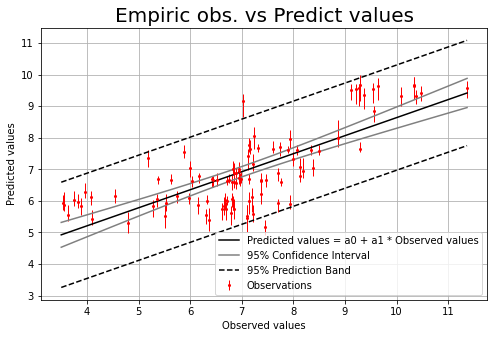

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 0.989, median - 0.993, CI - [0.912-1.063]



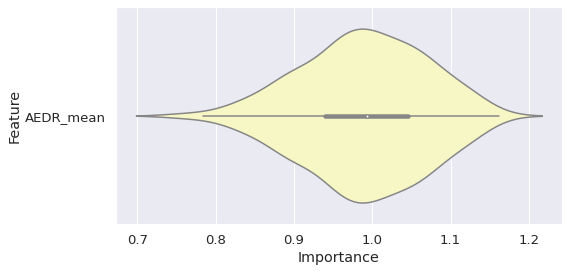

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 27.41, median: 25.5,
 pred. interval (P(0.025)-P(0.975)): 13.975-51.1, 
 conf. interval (p-value=0.95): 17.824-35.885 
***
Aggregate bias statistic: 
 mean: -0.101, median: -0.088,
 pred. interval (P(0.025)-P(0.975)): -0.506-0.279, 
 conf. interval (p-value=0.95): -0.3-0.072 
***
Aggregate RMSE statistic: 
 mean: 1.097, median: 1.106, pred. interval (P(0.025)-P(0.975)): 0.814-1.364, 
 conf. interval (p-value=0.95): 0.956-1.221 
***
Aggregate MSE statistic: 
 mean: 1.224, median: 1.223, pred. interval (P(0.025)-P(0.975)): 0.662-1.861, 
 conf. interval (p-value=0.95): 0.916-1.493 
***
Aggregate R^2 statistic: 
 mean: 0.49, median: 0.516, pred. interval (P(0.025)-P(0.975)): 0.011-0.737, 
 conf. interval (p-value=0.95): 0.362-0.642 
***
Aggregate bias(%) statistic: 
 mean: -1.378, median: -1.272, pred. interval (P(0.025)-P(0.975)): -6.699-3.972, 
 conf. interval (p-value=0.95): -4.146-1

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

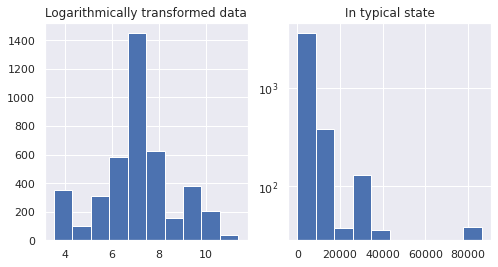

In [29]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [30]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [4, 5, 6, 7, 8, 9, 10, 11])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 500, 1000, 5000, 10000, 20000, 50000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

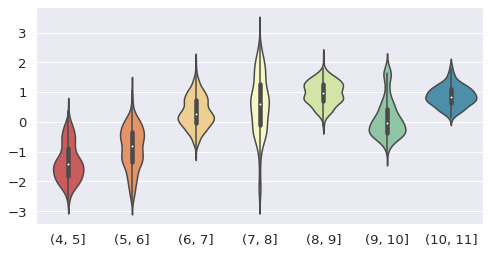

In [31]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

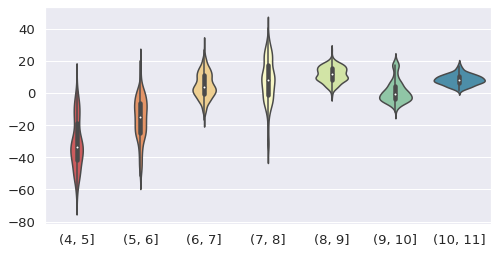

In [32]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

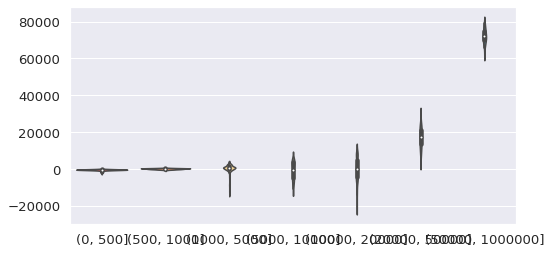

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

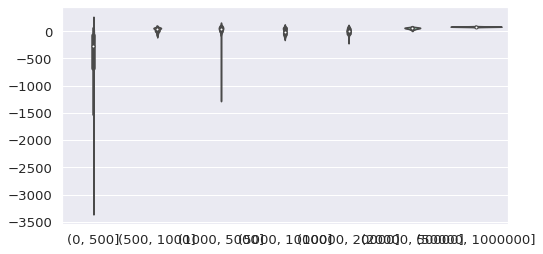

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [35]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [36]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [37]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.62706
[1]	validation_0-rmse:4.72649
[2]	validation_0-rmse:3.99229
[3]	validation_0-rmse:3.40450
[4]	validation_0-rmse:2.96612
[5]	validation_0-rmse:2.54332
[6]	validation_0-rmse:2.22887
[7]	validation_0-rmse:1.94629
[8]	validation_0-rmse:1.72264
[9]	validation_0-rmse:1.56132
[10]	validation_0-rmse:1.39236
[11]	validation_0-rmse:1.29239
[12]	validation_0-rmse:1.22420


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.17257
[14]	validation_0-rmse:1.12712
[15]	validation_0-rmse:1.10841
[16]	validation_0-rmse:1.06971
[17]	validation_0-rmse:1.04534
[18]	validation_0-rmse:1.01816
[19]	validation_0-rmse:1.00544
[20]	validation_0-rmse:1.00806
[21]	validation_0-rmse:0.98990
[22]	validation_0-rmse:0.98612
[23]	validation_0-rmse:0.97949
[24]	validation_0-rmse:0.98055
[25]	validation_0-rmse:0.97620
[26]	validation_0-rmse:0.97633
[27]	validation_0-rmse:0.96676
[28]	validation_0-rmse:0.95774
[29]	validation_0-rmse:0.95224
[30]	validation_0-rmse:0.94481
[31]	validation_0-rmse:0.94165
[32]	validation_0-rmse:0.93837
[33]	validation_0-rmse:0.93637
[34]	validation_0-rmse:0.93340
[35]	validation_0-rmse:0.92960
[36]	validation_0-rmse:0.93372
[37]	validation_0-rmse:0.93570
[38]	validation_0-rmse:0.93454
[39]	validation_0-rmse:0.93886
[40]	validation_0-rmse:0.93309
[41]	validation_0-rmse:0.92745
[42]	validation_0-rmse:0.92174
[43]	validation_0-rmse:0.91978
[44]	validation_0-rmse:0.91666
[45]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [38]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 52


In [39]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

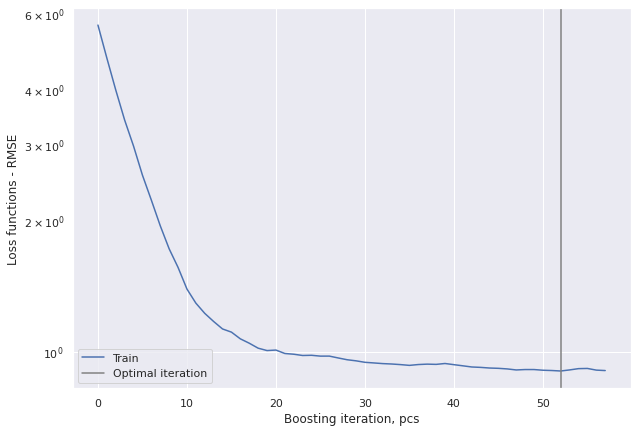

In [40]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [41]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.51
RMSE: 0.9
Relative RMSE(%):  12.800
MSE: 0.8
R square: 69.8%


In [42]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.701
Uncertainty
a0: 2.43+/-0.31
a1: 0.66+/-0.04


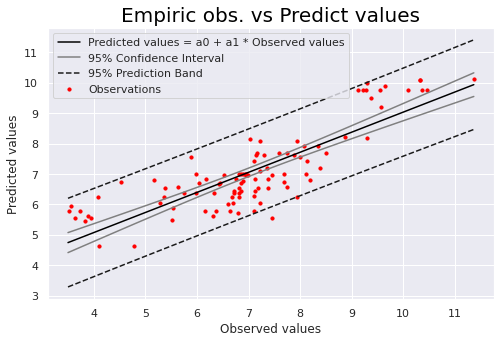

In [43]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(3.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

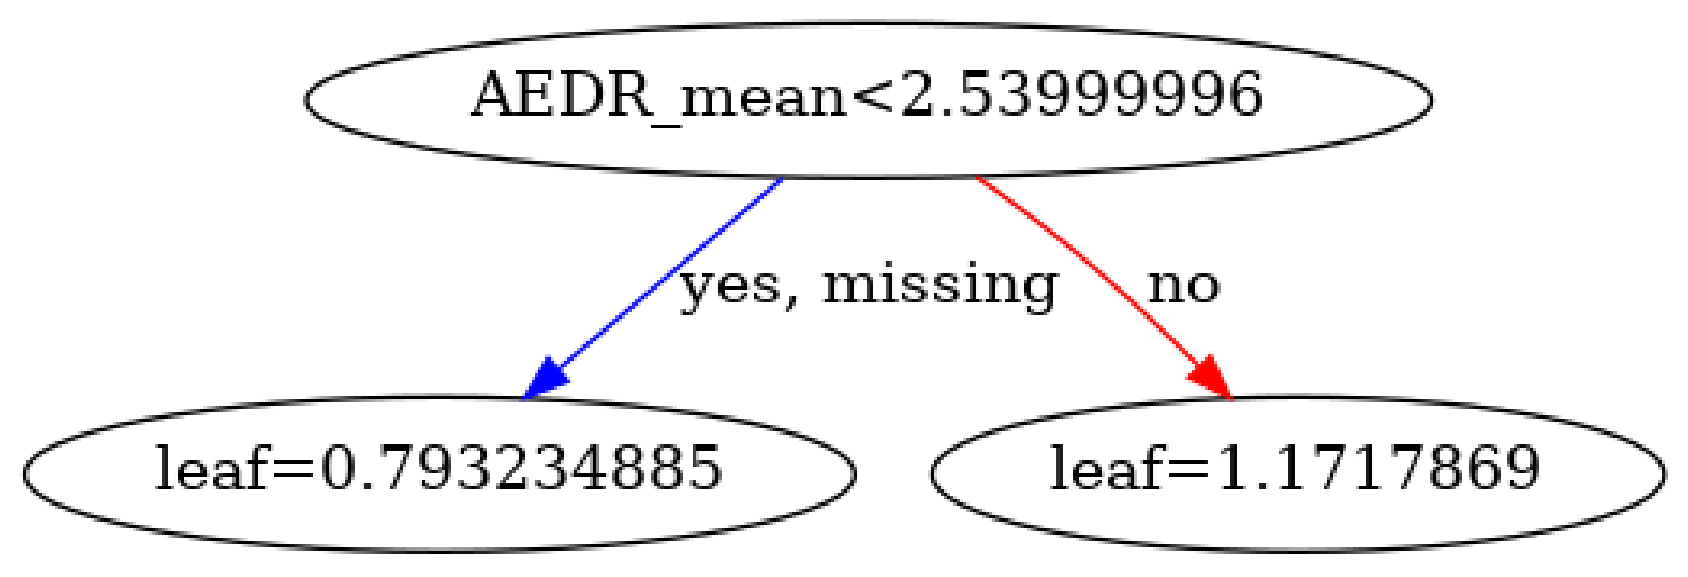

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

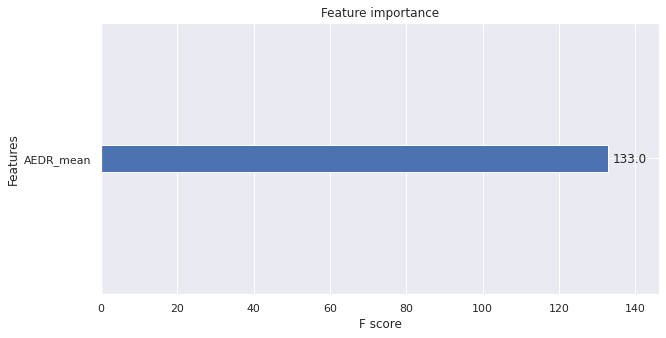

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

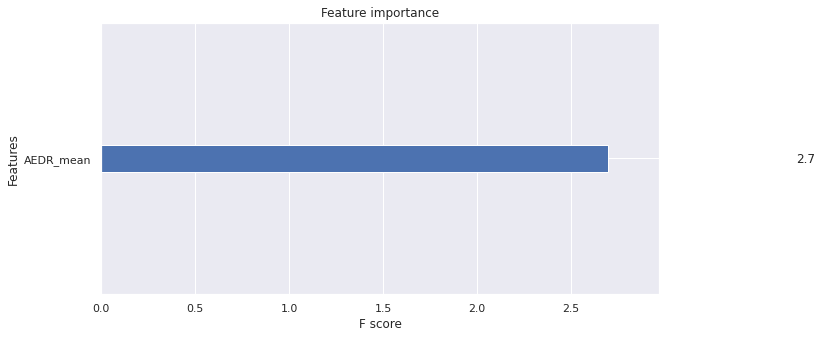

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

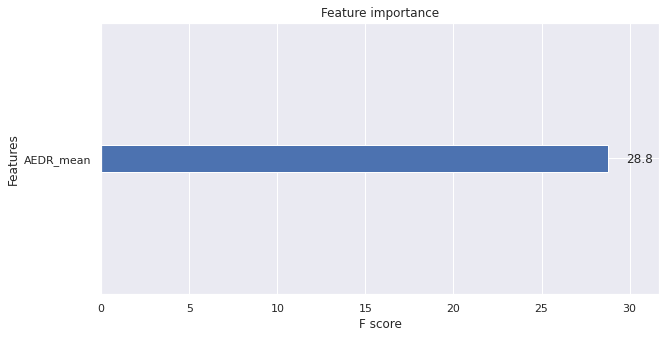

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


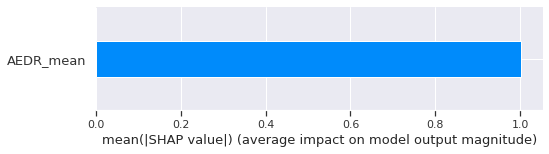

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

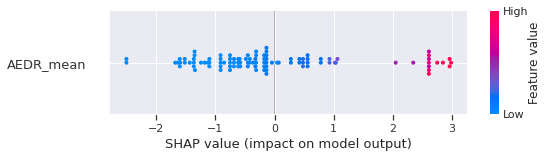

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

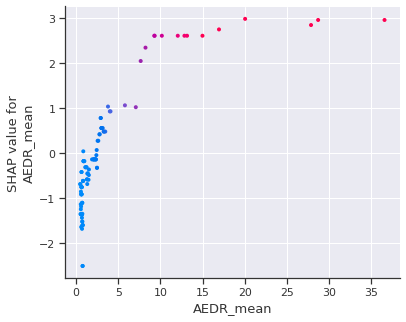

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_AEDR_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../03_output_data/XGBoost_models/07_LN_Cs_vs_AEDR_XGB_model.txt")